# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1</center>
## <center>Checkpoint 1</center>

# Análisis exploratorio de los datos

# Inicio

## Inicializacion de entorno

### Librerias y datasets

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import mode
import scipy.stats as st
from sklearn.ensemble import IsolationForest
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from google.colab import files

#Preprocesamiento
from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder,
    OneHotEncoder,
)

In [243]:
db_url = 'https://raw.githubusercontent.com/FranGuti/7506R-1C2023-GRUPO34/main/TP1/Datasets/hotels_train.csv'
df_train = pd.read_csv(db_url)
df_train_complete = df_train.copy()

In [244]:
db_test_url = 'https://raw.githubusercontent.com/FranGuti/7506R-1C2023-GRUPO34/main/TP1/Datasets/hotels_test.csv'
df_test = pd.read_csv(db_test_url)

### Operaciones

In [245]:
def obtener_frecuencia_relativa(series):
    frecuencia_absoluta = series.value_counts()
    frecuencia_relativa = frecuencia_absoluta / frecuencia_absoluta.sum()
    return frecuencia_relativa

def obtener_z_scores(data, columna):
  df_column = pd.DataFrame(data=data[columna])

  ''' Se calcula z-score '''
  df_column['z_score']=st.zscore(df_column[columna])

  ''' Se calcula z-score modificado '''
  mediana=np.median(df_column[columna])
  MAD=np.median(np.absolute(df_column[columna]-mediana))
  df_column['z_score_m']=(df_column[columna] - mediana)*0.6745/MAD
  
  return df_column;

def obtener_metricas_numericas(data, column):
  media = data[column].mean()
  mediana = data[column].median()
  moda = data[column].mode()
  print(f"La media de {column} es", media)
  print(f"La mediana de la {column} es", mediana)
  print(f"La moda de la {column} es", moda)
    

### Graficas

In [246]:
plt.style.use('ggplot')

In [247]:
def histograma_de_frecuencia(data, columna, magnitud):
    plt.title(f'Distribución de {columna}')
    plt.hist(data[columna], bins = 24 , alpha = 1, density=True)
    plt.xlabel(magnitud)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

In [248]:
def barplot(data, column):
    
    fig, ax = plt.subplots()
    data[column].value_counts().plot(ax=ax, kind='bar')
    plt.locator_params('x', nbins=2)

    plt.ylabel('Frecuencia')
    plt.xlabel(column)
    plt.title('Distribución de ' +  column)

    plt.show()

def barplot_againts_target(data, column, rotate=False):
  df_barplot = data.groupby(column)["is_canceled"].value_counts(normalize=True).unstack() 
  df_barplot.plot(kind='bar', stacked=False)
  plt.title('Barplot de '+ column +' en relación a is_canceled')
  plt.xticks(rotation=360)
  if(rotate):
    plt.xticks(rotation=90)
  plt.show()

In [249]:
def pairplot_againts_target(data, column, size):
  columns=[column, 'is_canceled']
  graf_pairplot=sns.pairplot(data=data[columns], hue="is_canceled")
  graf_pairplot.fig.suptitle(f"Relación de {column} con is_canceled", y=1.08)
  graf_pairplot.fig.set_size_inches(size[0],size[1])


In [250]:
def scatterplot_againts_target(x, y):
  sns.scatterplot(x=df_train[x],y=df_train[y], hue=df_train['is_canceled'])
  plt.title(f"Diagrama de Dispersión de {x} vs {y}")
  plt.show()

In [251]:
def boxplot(data, columna, ax=None):
      grafico = sns.boxplot(ax=ax, x=data[columna])
      grafico.set(xlabel=columna)
      grafico.set(title=f"Distribución boxplot de {columna}")

def boxplots_var_cuantitativas(dataset, columnas_cuantitativas):
  figs, axes = plt.subplots(nrows=8, ncols=2, figsize=(40, 30))
  figs.tight_layout(pad=5)
  axes = np.ndarray.flatten(axes)
  for (i, columna) in enumerate(columnas_cuantitativas):
      boxplot(dataset, columna, axes[i])

### Variables 

In [252]:
columnas_cualitativas = [
    "hotel",
    "meal",
    "country",
    "market_segment",
    "distribution_channel",
    "deposit_type",
    "customer_type",
]

variables_cualitativas = df_train[columnas_cualitativas]

columnas_cuantitativas_discretas = [
    "lead_time",
    "arrival_date_year",
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "children",
    "babies",
    "booking_changes",
    "days_in_waiting_list",
    "total_of_special_requests",
    "previous_cancellations",
    "previous_bookings_not_canceled",
    "required_car_parking_spaces"
]

variables_cuantitativas_discretas = df_train[columnas_cuantitativas_discretas]

columnas_cuantitativas_continuas = [
    "adr",
]

columnas_cuantitativas = columnas_cuantitativas_discretas+columnas_cuantitativas_continuas

variables_cuantitativas_continuas = df_train[columnas_cuantitativas_continuas]

columnas_cuantitativas = columnas_cuantitativas_discretas + columnas_cuantitativas_continuas

variables_cuantitativas = df_train[columnas_cuantitativas]

columnas_cuasicuantitativas = [
    "arrival_date_month",
    "is_repeated_guest",    
    "reserved_room_type",
    "assigned_room_type",
    "required_car_parking_spaces",
    "agent",
    "company",
     "id"
]

variables_cuasicuantitativas = df_train[columnas_cuasicuantitativas]

print(len(columnas_cualitativas + columnas_cuantitativas + columnas_cuasicuantitativas) == df_train.columns.size)

True


# Análisis inicial

Observamos la estructura general del dataset.

In [13]:
df_train.shape

(61913, 31)

In [14]:
df_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

In [15]:
df_train.head(5)

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   
2    City Hotel         25               2016            October   
3    City Hotel         26               2016           December   
4    City Hotel        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   
3                        2                     5       2       0.0  ...   
4                        2                     5       2       0.0  ...   

   deposit_type  agent company days_in_waiting_list    customer_type    adr  \
0    No Deposit    9.0     NaN                    0        Transient  115.5   
1    No Deposit    NaN     NaN                    0        Transient   42.0   
2    No Deposit    9.0     NaN                    0        Transient  229.0   
3    Non Refund  154.0     NaN                    0        Transient   75.0   
4    No Deposit   20.0     NaN                    0  Transient-Party   75.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          1   
1                            1                          0   
2                            0                          2   
3                            0                          0   
4                            0                          1   

                                     id is_canceled  
0  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689           1  
1  b1428f80-c56c-4ae4-91a9-6962edae08b1           0  
2  2226c018-ea20-4c4e-8f71-ea66aee70d7c           0  
3  314f56dc-2e4d-4298-9bdd-27bb008bffff           1  
4  28c75445-c603-413a-babf-ad377018b592           0  

[5 rows x 31 columns]

### Análisis inicial variables cuantitativas discretas




In [16]:
variables_cuantitativas_discretas.head()

lead_time  arrival_date_year  arrival_date_week_number  \
0         49               2016                        37   
1          4               2015                        44   
2         25               2016                        42   
3         26               2016                        51   
4        104               2017                        12   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          5                        1                     2   
1                         31                        0                     1   
2                         13                        0                     1   
3                         12                        2                     5   
4                         19                        2                     5   

   adults  children  babies  booking_changes  days_in_waiting_list  \
0       1       0.0       0                0                     0   
1       2       0.0       0                0                     0   
2       2       2.0       0                0                     0   
3       2       0.0       0                0                     0   
4       2       0.0       0                0                     0   

   total_of_special_requests  previous_cancellations  \
0                          1                       0   
1                          0                       0   
2                          2                       0   
3                          0                       0   
4                          1                       0   

   previous_bookings_not_canceled  required_car_parking_spaces  
0                               0                            0  
1                               0                            1  
2                               0                            0  
3                               0                            0  
4                               0                            0

#### Variable previous_bookings_not_canceled

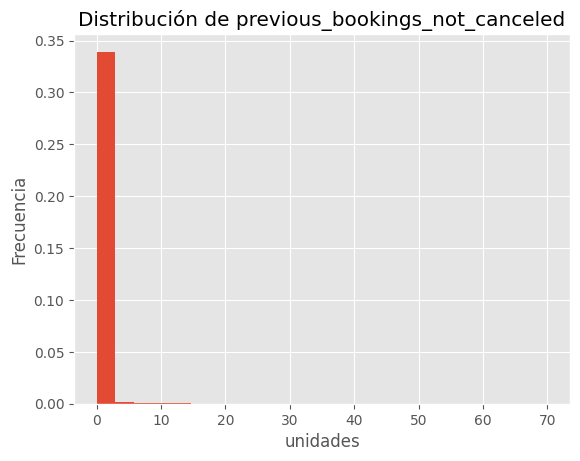

In [17]:
histograma_de_frecuencia(df_train, 'previous_bookings_not_canceled', 'unidades')

Casi todos huéspedes que hacen reservas no tuvieron reservas previas canceladas

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled


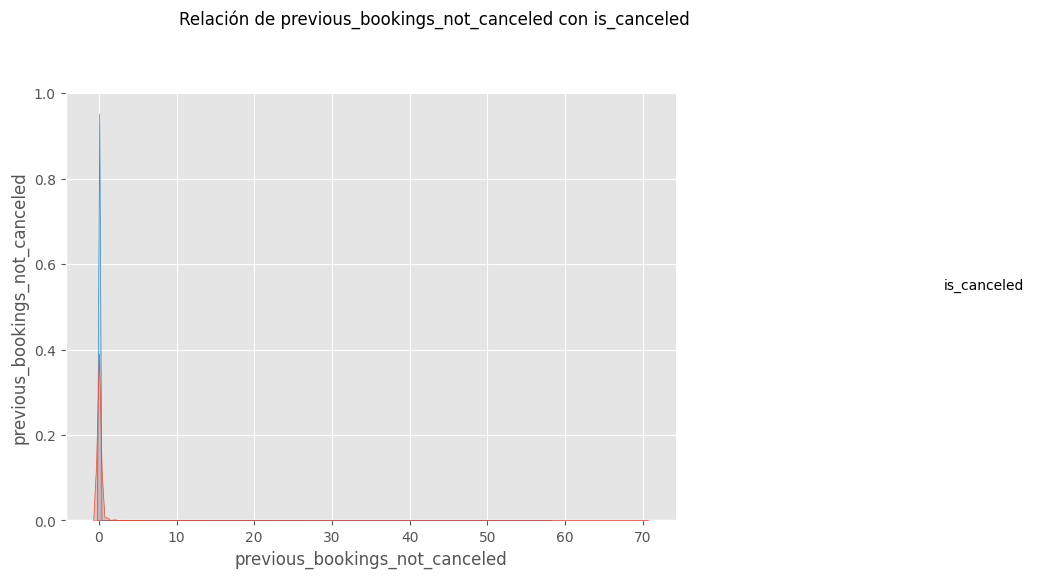

In [18]:
pairplot_againts_target(df_train, 'previous_bookings_not_canceled', (12,6))

La gran mayoría que no tenía reservas previas no canceladas han cancelado

#### Variable lead_time

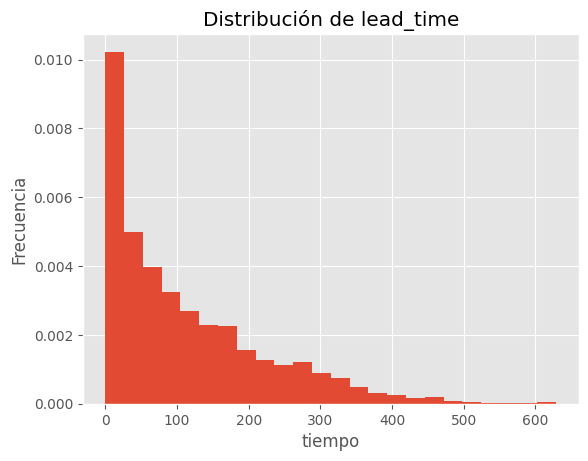

In [19]:
histograma_de_frecuencia(df_train, 'lead_time', 'tiempo')

La mayoría de los huespedes esperan poco, mientras la cantidad de tiempo aumenta, los huespedes esperando disminuyen aceleradamente de manera continua

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

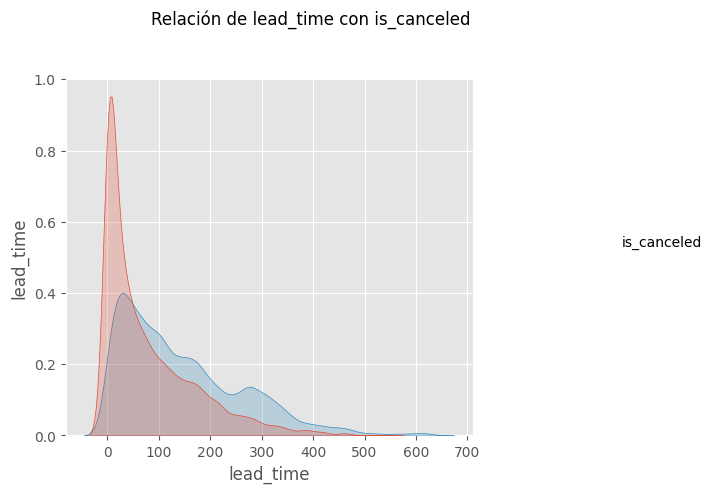

In [20]:
pairplot_againts_target(df_train, 'lead_time', (8,5))

Se puede apreciar que en el inicio, como es de esperar, al haber poca demora hay mas hospedados que cancelados, y a medida que aumenta el tiempo de espera la cantidad de cancelados supera a la de hospedados

#### Variable arrival_date_year

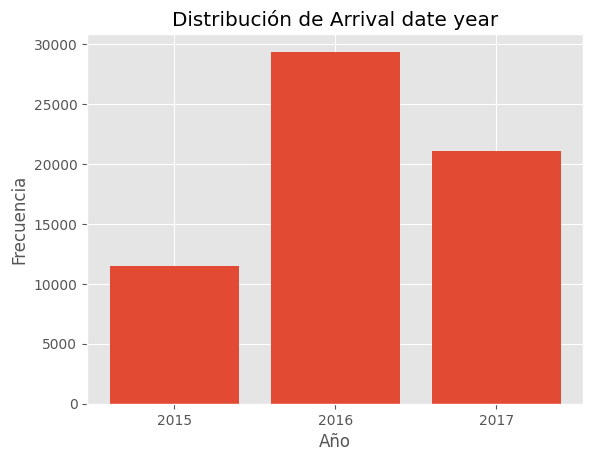

In [21]:
ds_agrupado_ady=df_train.groupby(['arrival_date_year']).count()

eje_x = [2015, 2016, 2017]
eje_y = ds_agrupado_ady['hotel'].tolist()

plt.locator_params('x', nbins=3)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('Año')
plt.title('Distribución de Arrival date year')
 
plt.show()

La mayor cantidad de reservas en nuestro dataset son en 2016, 2017 y 2015 respectivamente

Veo su relación con el target graficando su distribución con un 
gráfico de a pares contrastando con la variable is_canceled

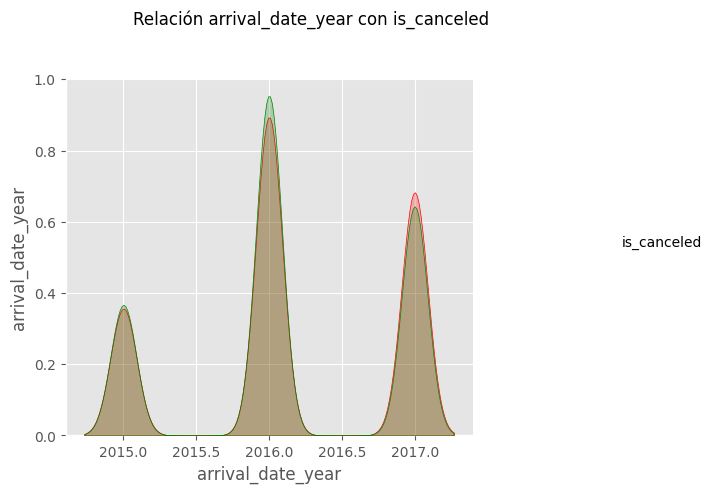

In [22]:
columns=['arrival_date_year', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación arrival_date_year con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(8,5)

Se puede apreciar que en el 2015 la proporcion cancelados-hospedados es bastante parjea, mientras que en el 2016 la de hospedados superó a la de cancelados, y en el 2017 sucedió todo lo contrario

#### Variable arrival_date_week_number

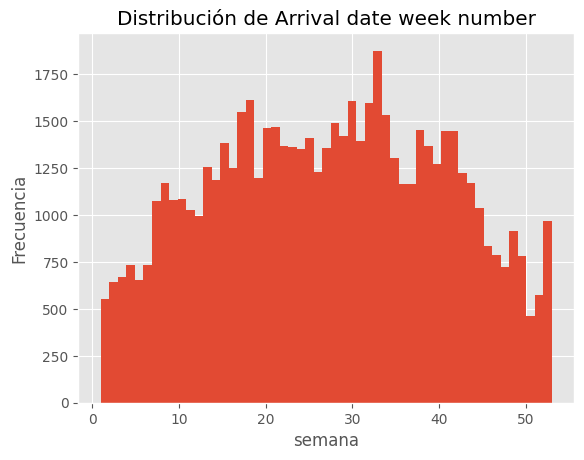

In [23]:
plt.title('Distribución de Arrival date week number')
plt.hist(df_train['arrival_date_week_number'], bins = 53 , alpha = 1)
plt.xlabel("semana")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

La mayor cantidad de arrivos ocurren entre las semanas 15 y 42

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

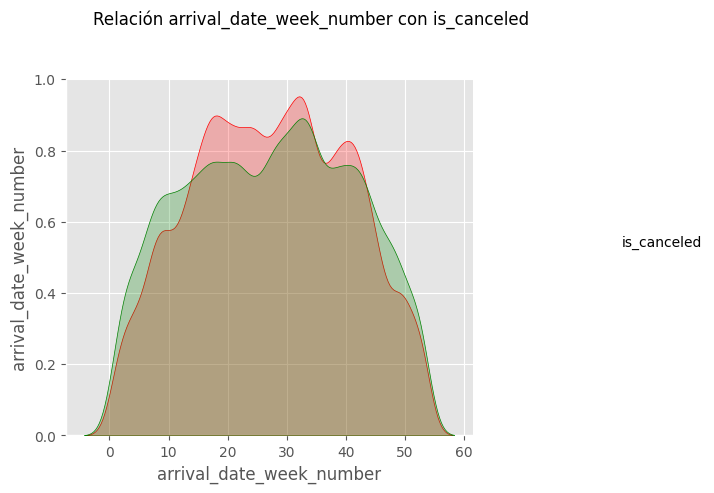

In [24]:

columns=['arrival_date_week_number', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación arrival_date_week_number con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(8,5)

Observo que entre la semana 0 y 15 aproximadamente la cantidad de hospedados supera a la de cancelados, tendencia que se revierte durante las semanas 15 a 45 aproximadamente, luego vuelve a como estaba antes de la semana 45 en adelante

#### Variable arrival_date_day_of_month

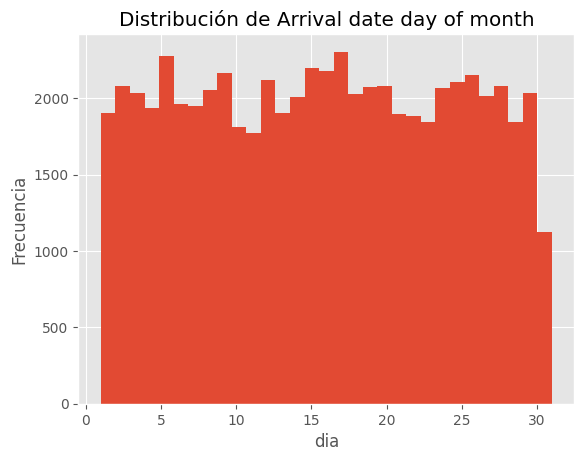

In [25]:
plt.title('Distribución de Arrival date day of month')
plt.hist(df_train['arrival_date_day_of_month'], bins = 31 , alpha = 1)
plt.xlabel("dia")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

El día 31 es cuando se registran menos arrivos(pocos meses tienen 31 dias)

Del 10 al 15 y del 20 al 25 también hay menos arribos

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

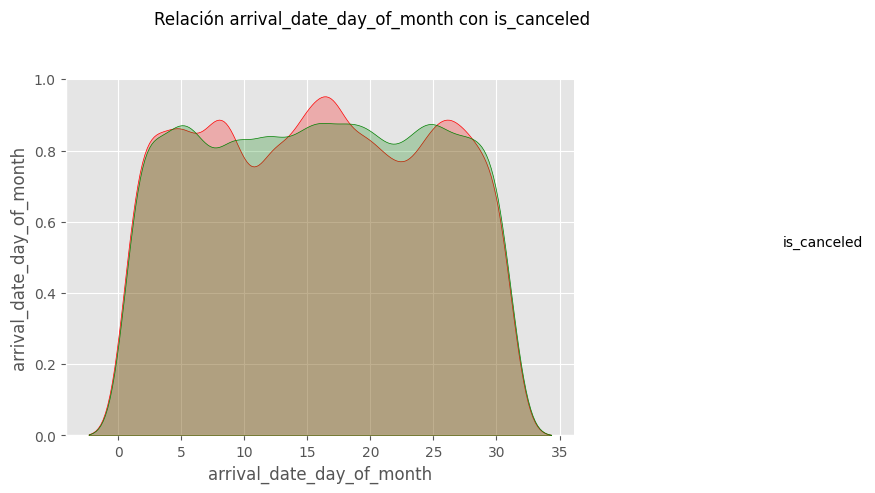

In [26]:
columns=['arrival_date_day_of_month', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación arrival_date_day_of_month con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,5)

Se puede apreciar que entre, aproximandamente, el dia 6 y dia 8 el numero de cancelados es superior al de no-cancelado al igual que pasa entre aproximadamente el dia 13 y 18, y 26 y 28. El resto de dias la paridad es casi del 1 a 1 excepto por los intervalos: dia 9-14 (aprox), dia 18-26(aprox) donde la cantidad de no-cancelados es notoriamente superior a la de cancelados

#### Variable stays_in_weekend_nights

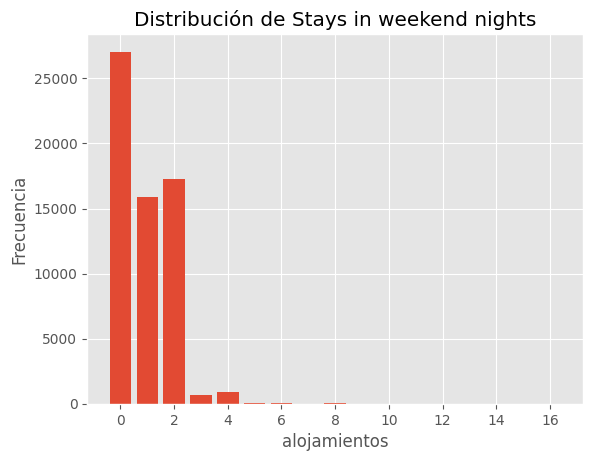

In [27]:
ds_agrupado_siwn=df_train.groupby(['stays_in_weekend_nights']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=16)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('alojamientos')
plt.title('Distribución de Stays in weekend nights')
 
plt.show()

No suelen quedarse las noches de fines de semana, a lo sumo una o dos noches




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

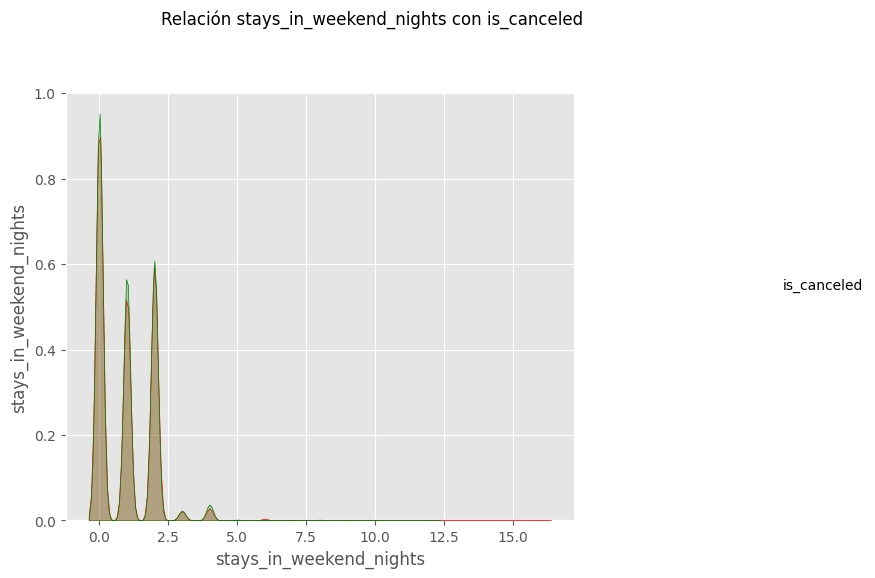

In [28]:
columns=['stays_in_weekend_nights', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación stays_in_weekend_nights con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

Si bien en los casos donde se quedaron almenos una noche de fin de semana pareciera que hay mas no-cancelados que cancelados, podemos observar que cuando esta variable es 0 también sucede lo mismo.

Además, cuando se llega a los numeros mas elevados de noches la tendencia cambia y pareciera haber mas cancelaciones. Dato que puede llegar a ser despreciable al tratarse de casos outliers


#### Variable stays_in_week_nights

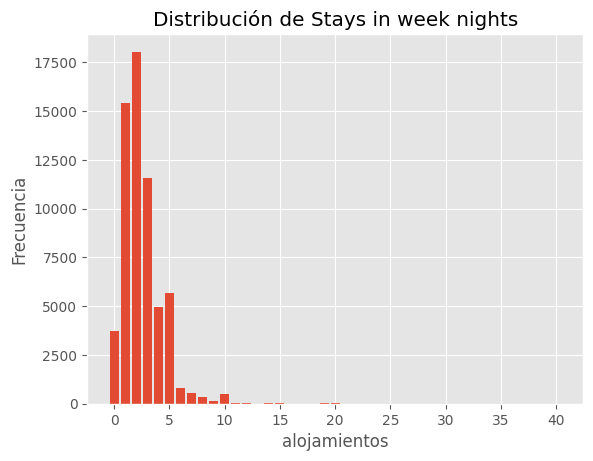

In [29]:
ds_agrupado_siwn=df_train.groupby(['stays_in_week_nights']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=16)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('alojamientos')
plt.title('Distribución de Stays in week nights')
 
plt.show()

A diferencia con las noches de fines de semana, si se quedan en la semana hasta 5 noches suele ser lo normal




Veo su relación con el target:

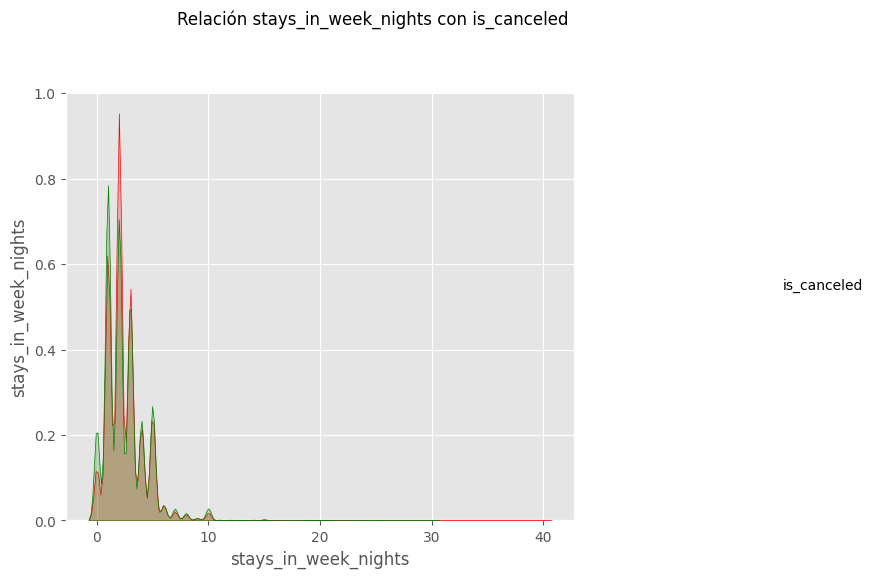

In [30]:
columns=['stays_in_week_nights', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación stays_in_week_nights con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

Cuando no se queda ninguna noche de semana es el momento en el que mejor ratio de no-cancelados/cancelados hay, el sigueinte es cuando se queda solo una noche, luego cuando son 2 o 3 noches suele haber mas cancelados que no-cancelados

#### Variable adults

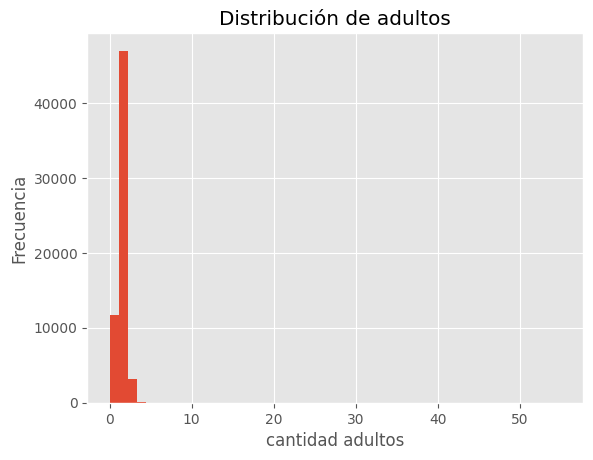

In [31]:
plt.title('Distribución de adultos')
plt.hist(df_train['adults'], bins = 50 , alpha = 1)
plt.xlabel("cantidad adultos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Suelen alojarse dos adultos




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

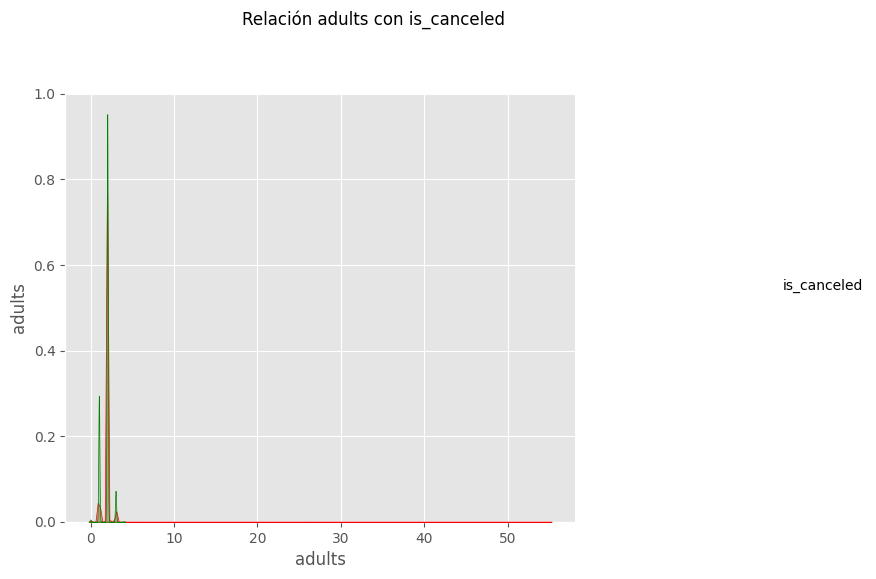

In [32]:
columns=['adults', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación adults con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

#### Variable children

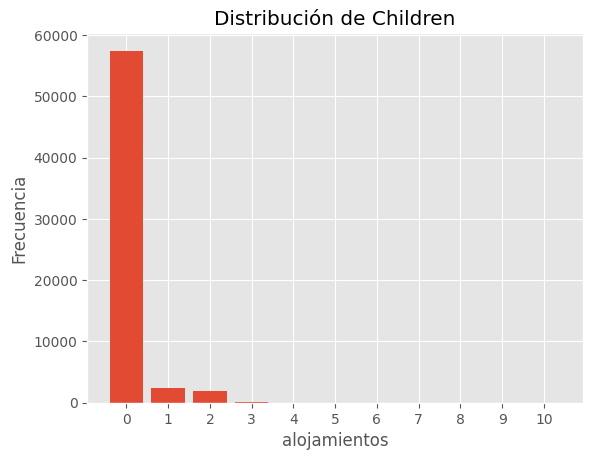

In [33]:
ds_agrupado_children=df_train.groupby(['children']).count()

eje_x = ds_agrupado_children.index.tolist()
eje_y = ds_agrupado_children['hotel'].tolist()

plt.locator_params('x', nbins=12)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('alojamientos')
plt.title('Distribución de Children')
 
plt.show()

No suelen alojarse con niños, y cuando lo hacen suele ser solo uno, dos, o en menor medida tres




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

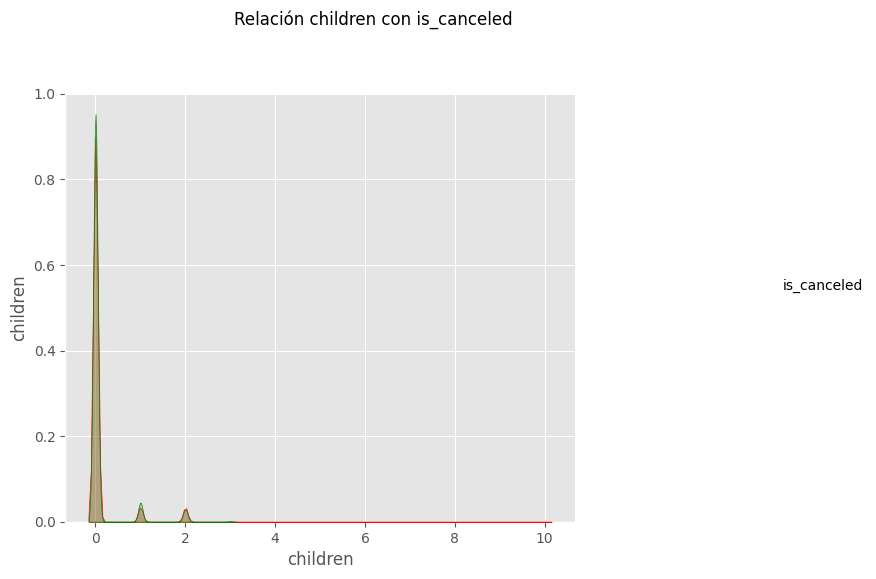

In [34]:
columns=['children', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación children con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

Pareciera haber una ligera diferencia entre la cantidad de no-cancelados y cancelados, pero no muy sustancial

#### Variable babies

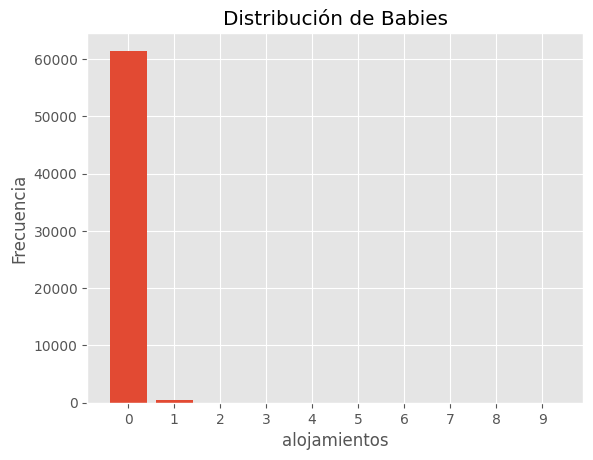

In [35]:
ds_agrupado_babies=df_train.groupby(['babies']).count()

eje_x = ds_agrupado_babies.index.tolist()
eje_y = ds_agrupado_babies['hotel'].tolist()

plt.locator_params('x', nbins=12)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('alojamientos')
plt.title('Distribución de Babies')
 
plt.show()

Rara vez se aloja un bebé



Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled


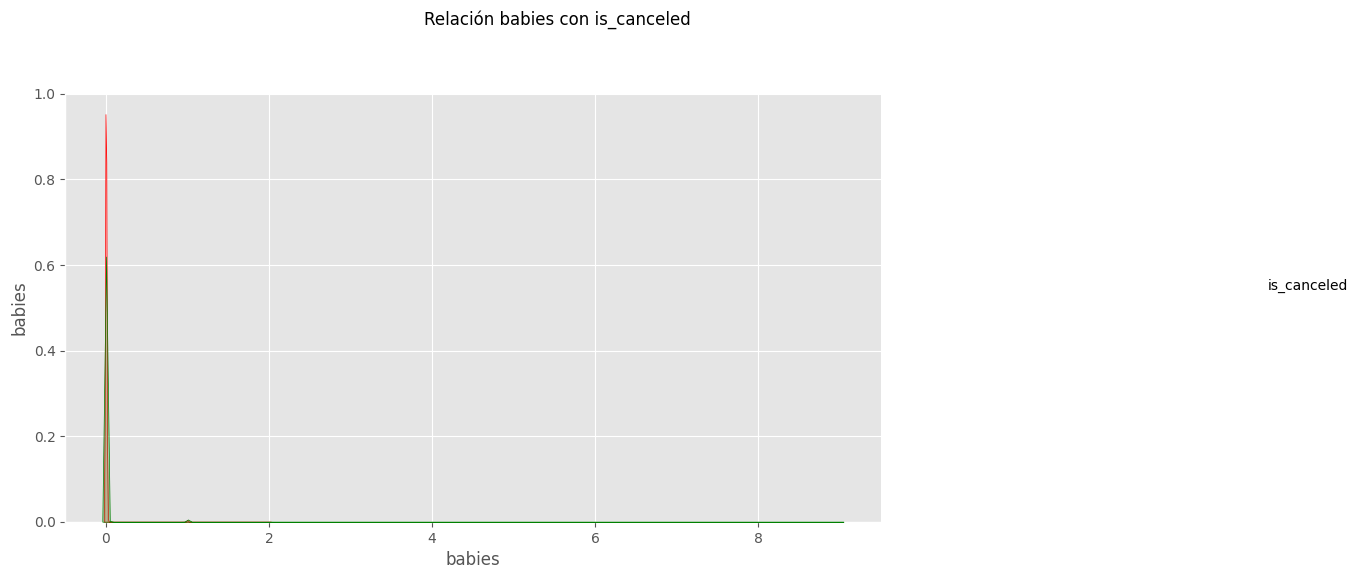

In [36]:
columns=['babies', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación babies con is_canceled", y=1.08)

graf_pairplot.fig.set_size_inches(16,6)

Se ve que hay más cancelados cuando no hay bebes que cuando hay

#### Variable booking_changes

Cuando no hay bebés hospedados suelen haber cancelado mucho mas

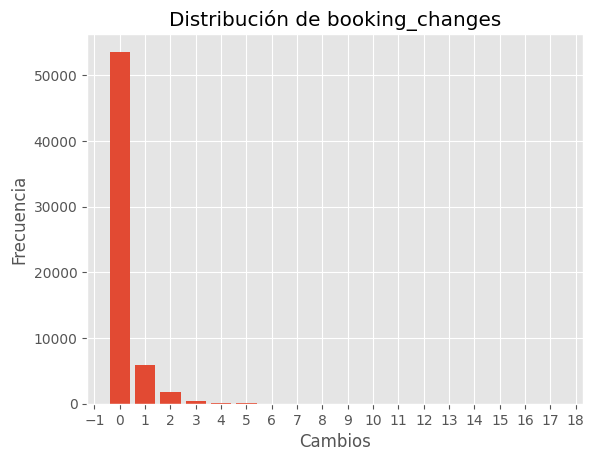

In [37]:
ds_agrupado_booking_changes=df_train.groupby(['booking_changes']).count()

eje_x = ds_agrupado_booking_changes.index.tolist()
eje_y = ds_agrupado_booking_changes['hotel'].tolist()

plt.locator_params('x', nbins=20)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('Cambios')
plt.title('Distribución de booking_changes')
 
plt.show()

Los usuarios normalmente nunca cancelaron una reserva previa, pero si lo hicieron generalmente fué solo una vez




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

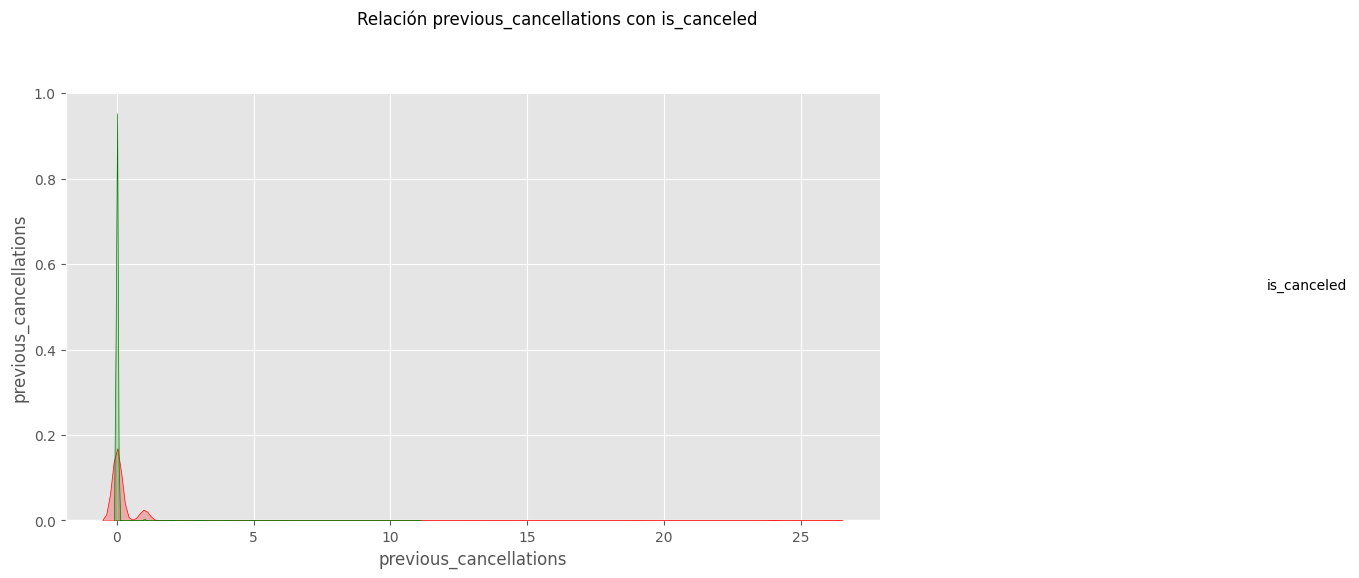

In [38]:
columns=['previous_cancellations', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación previous_cancellations con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(16,6)

Cuando no tienen cancelaciones previas la diferencia entre la cantidad de no cancelados y cancelados es muy grande a favor de no cancelado.

#### Variable days_in_waiting_list

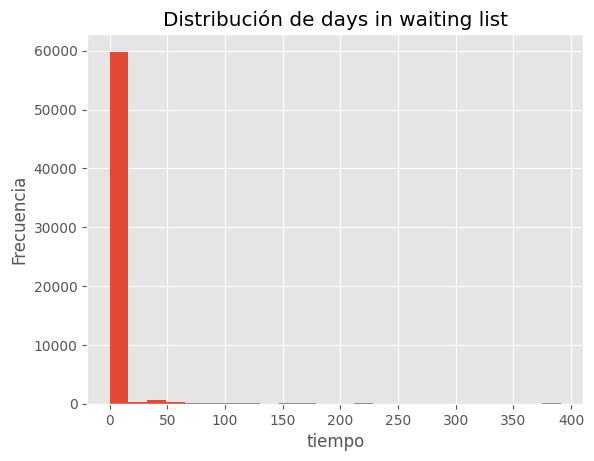

In [39]:
plt.title('Distribución de days in waiting list')
plt.hist(df_train['days_in_waiting_list'], bins = 24 , alpha = 1)
plt.xlabel("tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

La mayoría no suele esperar




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

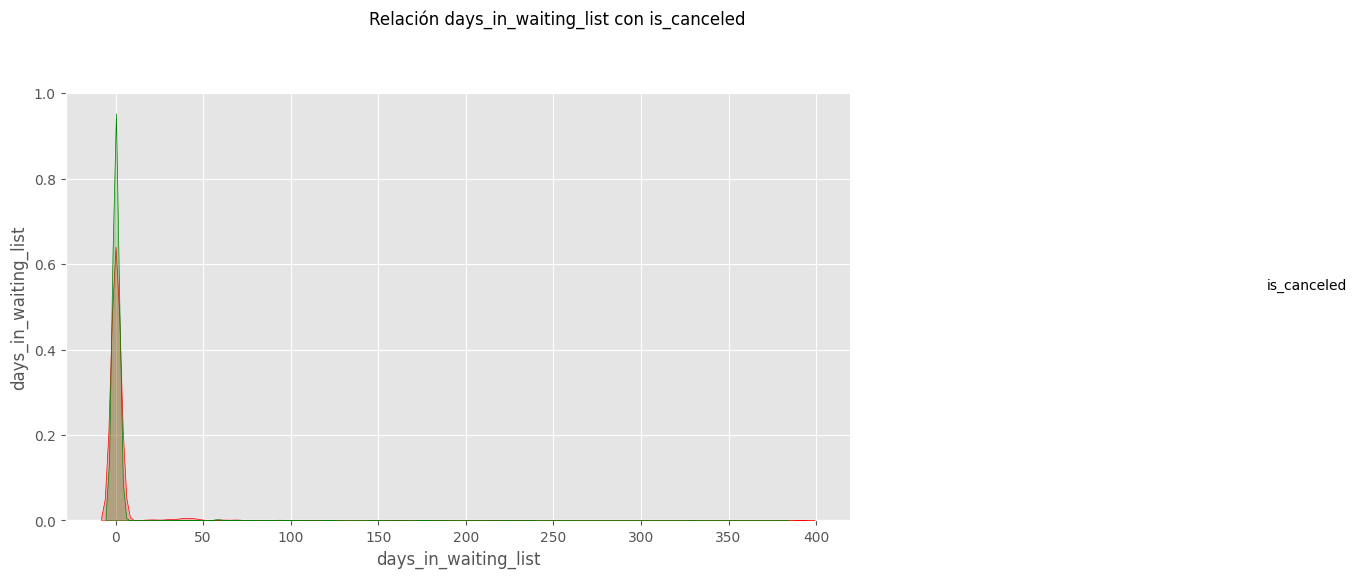

In [40]:
columns=['days_in_waiting_list', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación days_in_waiting_list con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(16,6)

Cuando no entraron en la lista de espera la gran mayoría no canceló

#### Variable required_car_parking_spaces

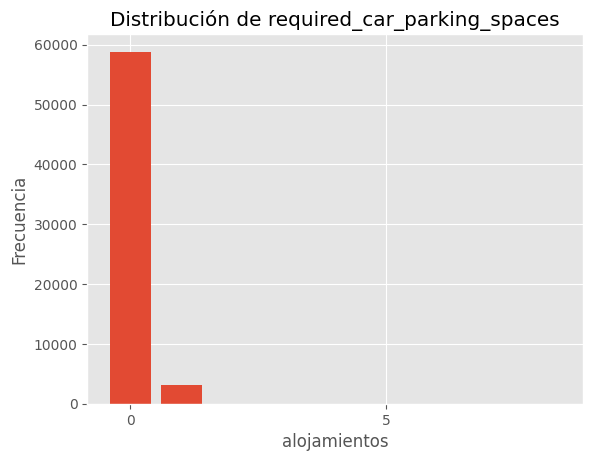

In [41]:
ds_agrupado_siwn=df_train.groupby(['required_car_parking_spaces']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('alojamientos')
plt.title('Distribución de required_car_parking_spaces')
 
plt.show()

No suelen ocupar estacionamiento y si lo hacen generalmente es solo un espacio



Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled


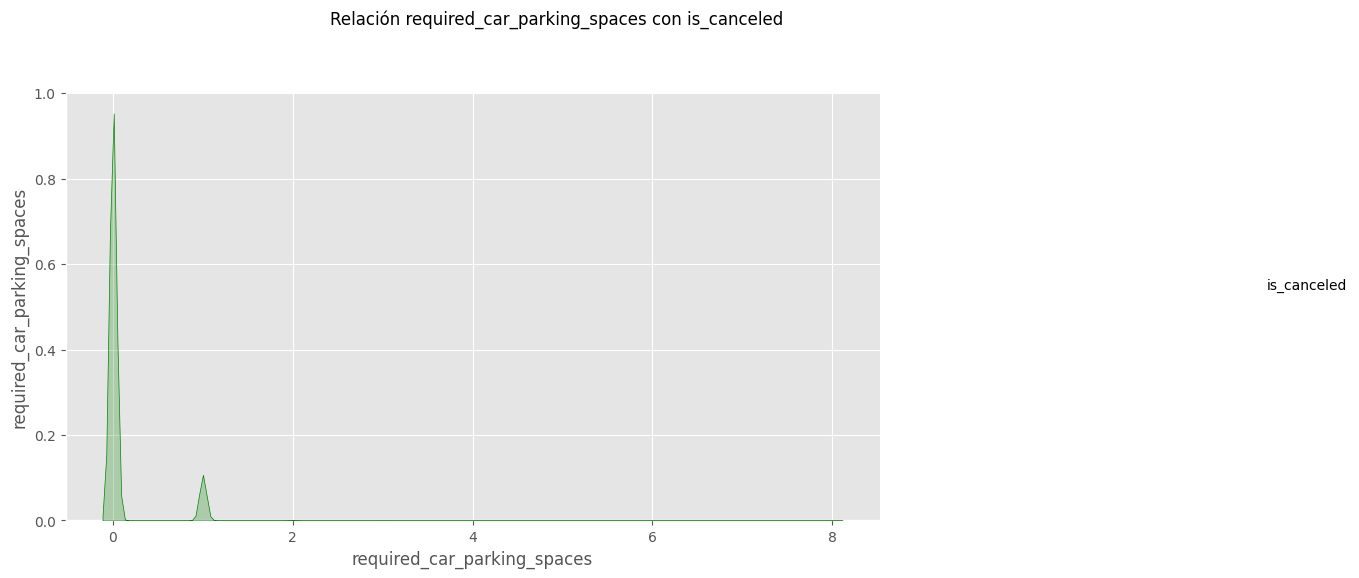

In [42]:
columns=['required_car_parking_spaces', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación required_car_parking_spaces con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(16,6)



Sale a la vista un posible error en los datos. Posiblemente cuando la variable required_car_parking_spaces se utiliza el campo is_canceled es ignorado


#### Variable total_of_special_requests

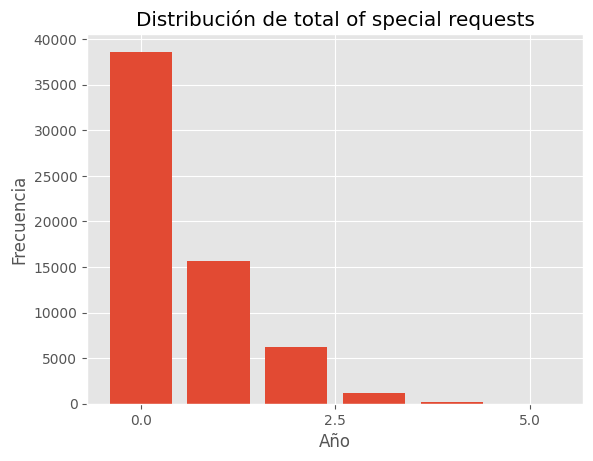

In [43]:
ds_agrupado_ady=df_train.groupby(['total_of_special_requests']).count()

eje_x = [0, 1, 2,3,4,5]
eje_y = ds_agrupado_ady['hotel'].tolist()

plt.locator_params('x', nbins=3)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('Año')
plt.title('Distribución de total of special requests')
 
plt.show()

La mayoría no tiene pedidos especiales, luego cae la frecuencia linealmente hasta un numero de 5 pedidos




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

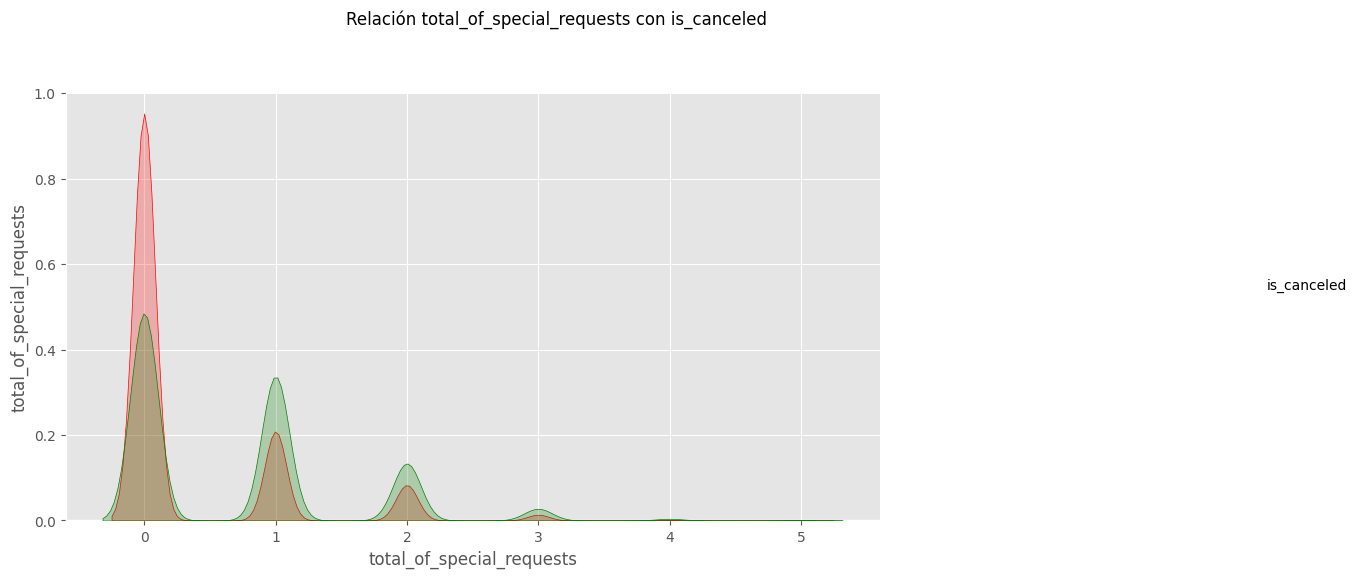

In [44]:
columns=['total_of_special_requests', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación total_of_special_requests con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(16,6)



Cuando no tuvieron ningún pedido especial la mayoría de los huespedes cancelaron (casi el doble)

Luego el ratio es positivo si hubieron pedidos especiales


#### Variable previous_cancellations

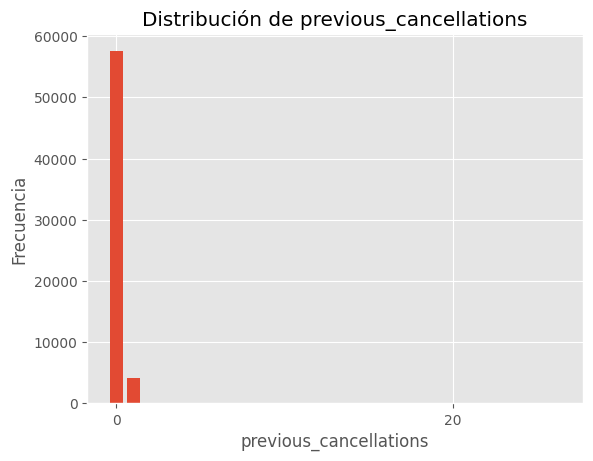

In [45]:
ds_agrupado_siwn=df_train.groupby(['previous_cancellations']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('previous_cancellations')
plt.title('Distribución de previous_cancellations')
 
plt.show()

Los usuarios normalmente nunca cancelaron una reserva previa, pero si lo hicieron generalmente fué solo una vez

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled


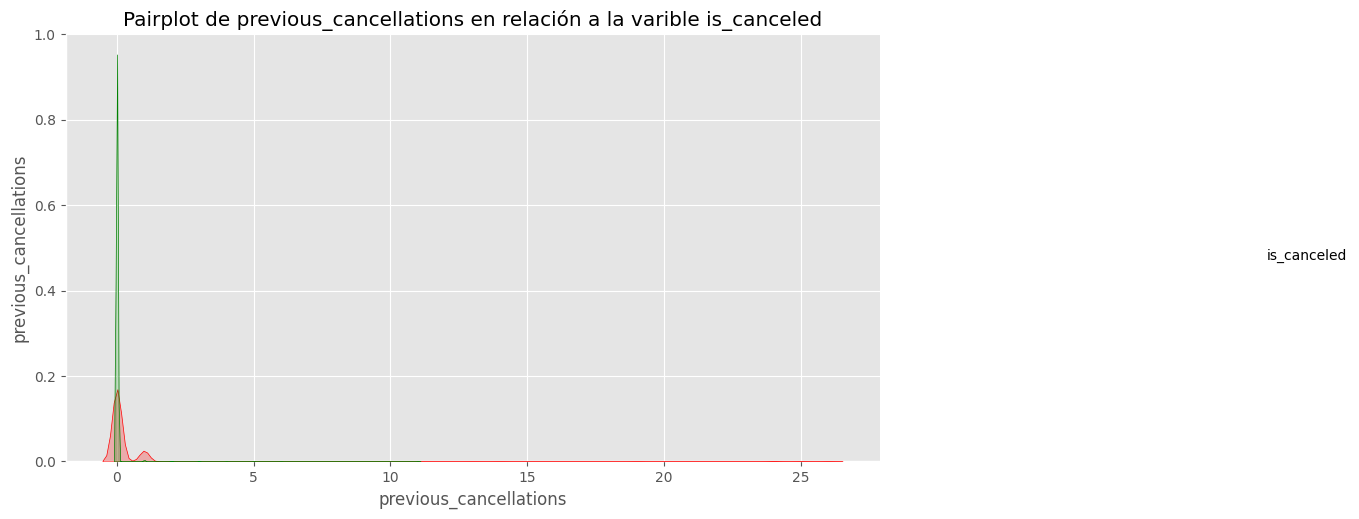

In [46]:
columns=['previous_cancellations', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"]).set(title="Pairplot de previous_cancellations en relación a la varible is_canceled")
graf_pairplot.fig.set_size_inches(16,6)

Cuando no tienen cancelaciones previas la diferencia entre la cantidad de no cancelados y cancelados es muy grande a favor de no cancelado.

### Análisis inicial variables cuantitativas continuas

#### Variable adr

In [47]:
variables_cuantitativas_continuas.head()

adr
0  115.5
1   42.0
2  229.0
3   75.0
4   75.0

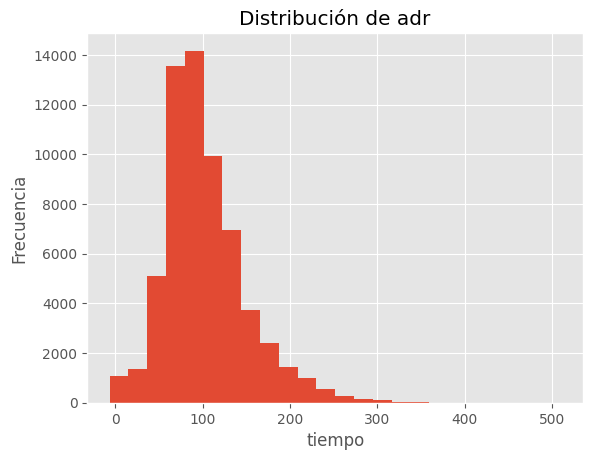

In [48]:
plt.title('Distribución de adr')
plt.hist(df_train['adr'], bins = 24 , alpha = 1)
plt.xlabel("tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

La mayoría de los huespedes pagan una tarifa diaria de entre 50-150




Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

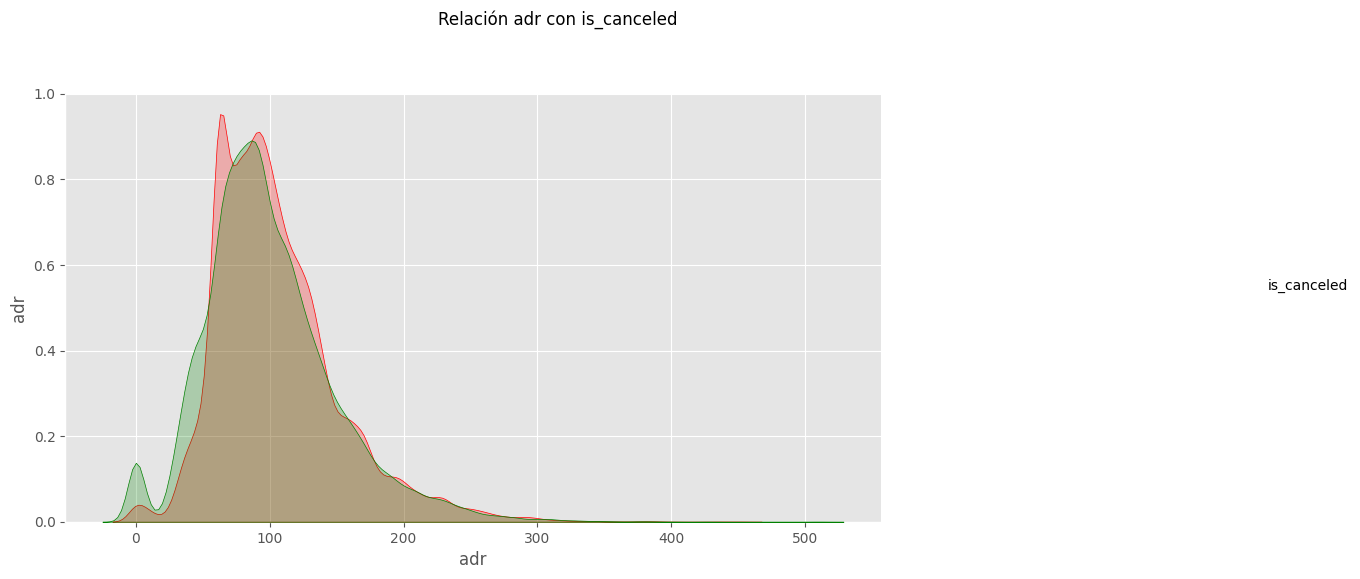

In [49]:
columns=['adr', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación adr con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(16,6)

En un primer intervalo puede apreciarse que los no-cancelados superan a los cancelados. Esto puede deberse a que como fué un buen precio hicieron un esfuerzo extra. Luego el ratio se empareja y es muy similar en ambos casos

### Análisis inicial variables cuasicuantitativas

In [50]:
variables_cuasicuantitativas.head()

arrival_date_month  is_repeated_guest reserved_room_type assigned_room_type  \
0          September                  0                  D                  D   
1            October                  0                  A                  A   
2            October                  0                  F                  F   
3           December                  0                  A                  A   
4              March                  0                  A                  A   

   required_car_parking_spaces  agent  company  \
0                            0    9.0      NaN   
1                            1    NaN      NaN   
2                            0    9.0      NaN   
3                            0  154.0      NaN   
4                            0   20.0      NaN   

                                     id  
0  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689  
1  b1428f80-c56c-4ae4-91a9-6962edae08b1  
2  2226c018-ea20-4c4e-8f71-ea66aee70d7c  
3  314f56dc-2e4d-4298-9bdd-27bb008bffff  
4  28c75445-c603-413a-babf-ad377018b592

#### Variable arrival_date_month

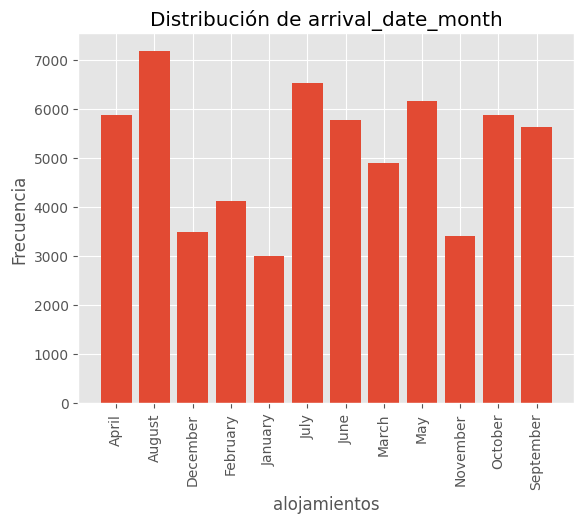

In [51]:
ds_agrupado_siwn=df_train.groupby(['arrival_date_month']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('alojamientos')
plt.title('Distribución de arrival_date_month')
plt.xticks(rotation=90)
plt.show()

Se ve que es bastante parejo la frecuencia de huéspedes por meses, se puede ver que en enero hay menos huéspedes y que en agosto es el máximo.

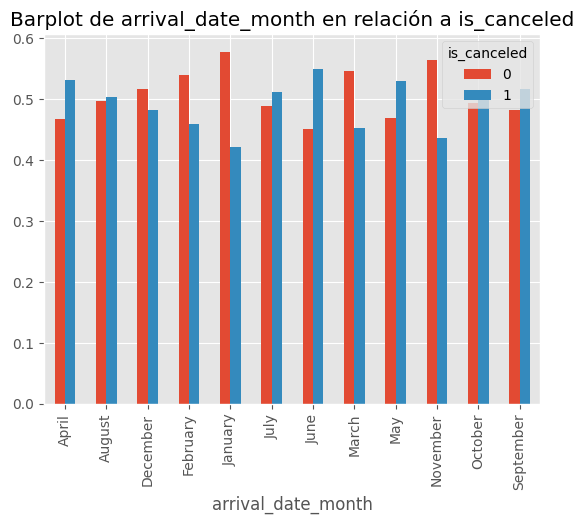

In [52]:
barplot_againts_target(df_train, 'arrival_date_month', True)

El mes donde mayor porcentaje de cancelados hay es Junio. Mientras los dos de menor porcentaje son Enero y Noviembre

#### Variable agent

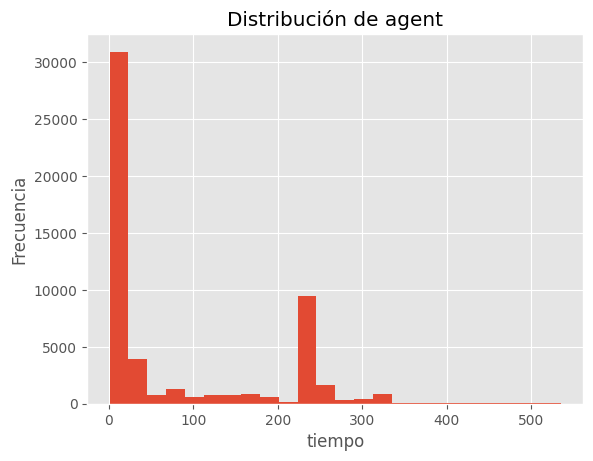

In [53]:
plt.title('Distribución de agent')
plt.hist(df_train['agent'], bins = 24 , alpha = 1)
plt.xlabel("tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

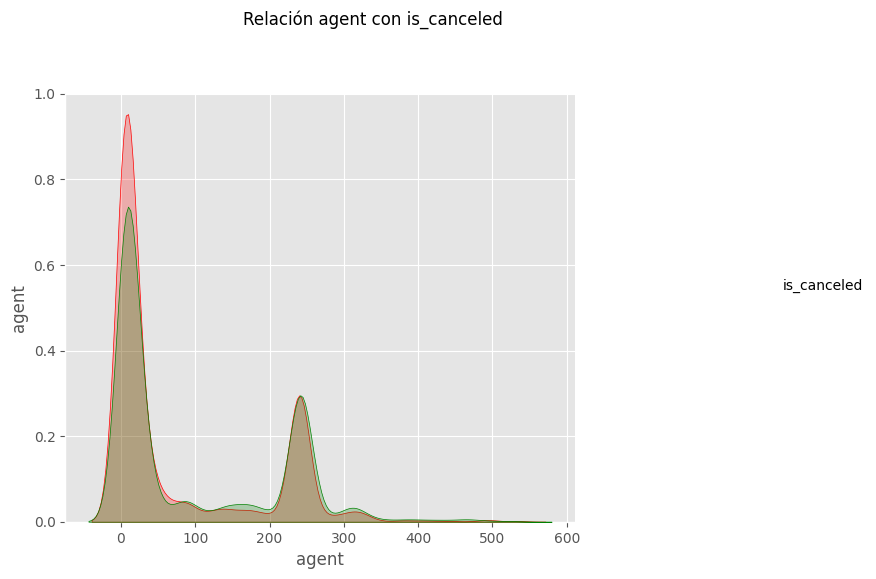

In [54]:
columns=['agent', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación agent con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

Es dificil sacar una conclusión a partir del gráfico ya que no es una variable cuantitativa. Pero se puede apreciar un acumulamiento a izquierda de casos de cancelación

#### Variable company

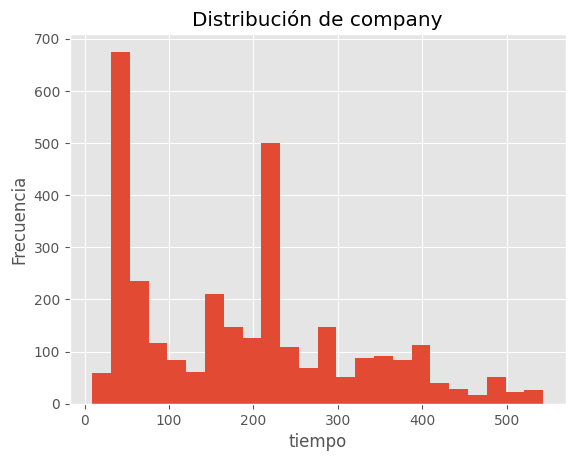

In [55]:
plt.title('Distribución de company')
plt.hist(df_train['company'], bins = 24 , alpha = 1)
plt.xlabel("tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

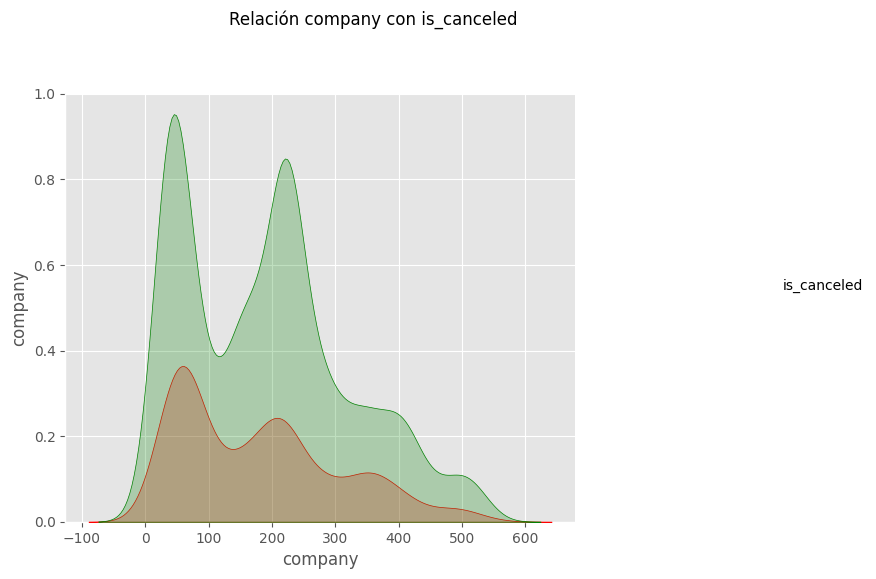

In [56]:
columns=['company', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación company con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

No se puede recolectar mucha información pero se logra apreciar que entre la id 0 y 100 se encuentra la mayoria de reservas. Y el mejor ratio de no-cancelados/cancelados se encuentra alrededor de la id 210

#### Variable is_repeated_guest

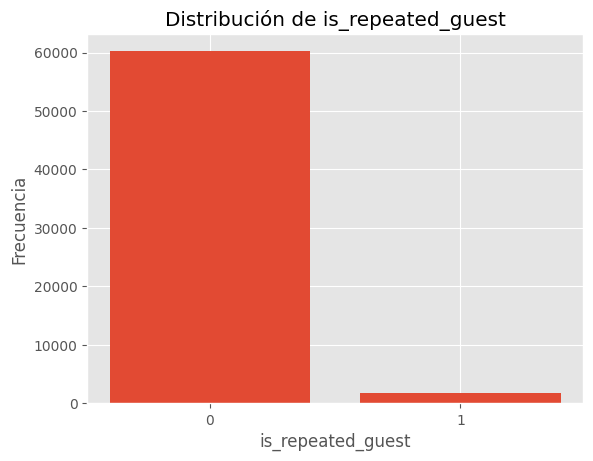

In [57]:
ds_agrupado_siwn=df_train.groupby(['is_repeated_guest']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('is_repeated_guest')
plt.title('Distribución de is_repeated_guest')
 
plt.show()

Se puede ver que la gran mayoría de huéspedes no son repetidos

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

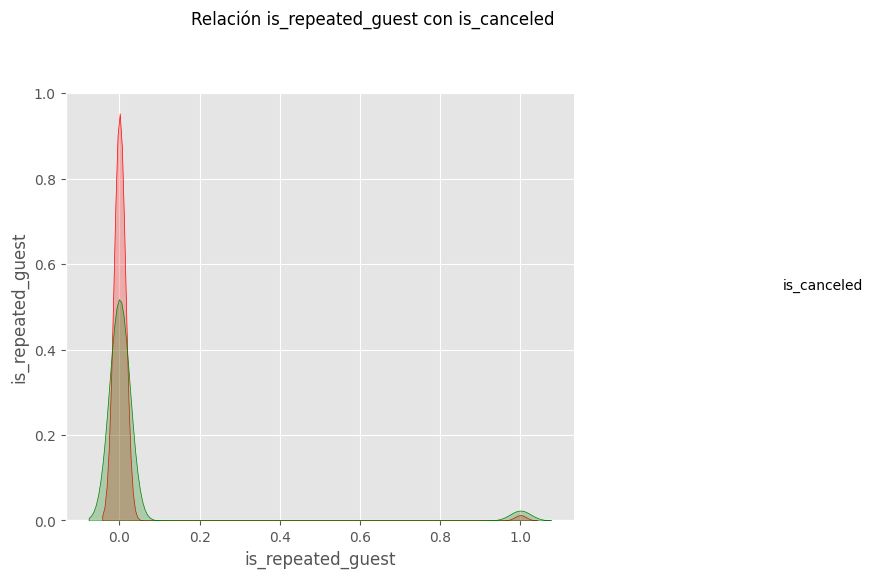

In [58]:
columns=['is_repeated_guest', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"])
graf_pairplot.fig.suptitle("Relación is_repeated_guest con is_canceled", y=1.08)
graf_pairplot.fig.set_size_inches(10,6)

Casi el doble de los huespedes nuevos cancelaron.

Por el contrario, los huespedes repetidos generalmente no cancelaron


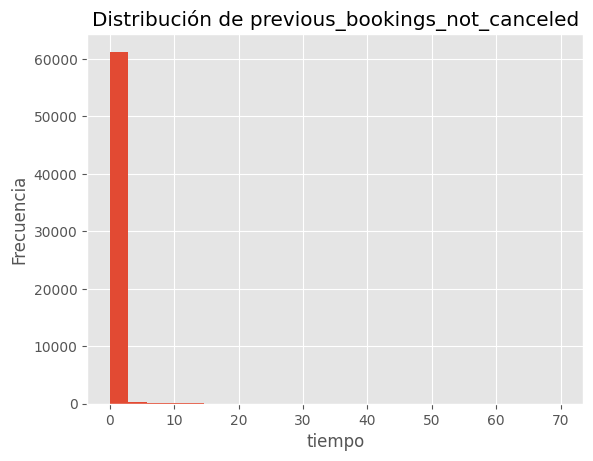

In [59]:

plt.title('Distribución de previous_bookings_not_canceled')
plt.hist(df_train['previous_bookings_not_canceled'], bins = 24 , alpha = 1)
plt.xlabel("tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Casi todos huéspedes que hacen reservas no tuvieron reservas previas canceladas

Veo su relación con el target graficando su distribución con un gráfico de a pares contrastando con la variable is_canceled

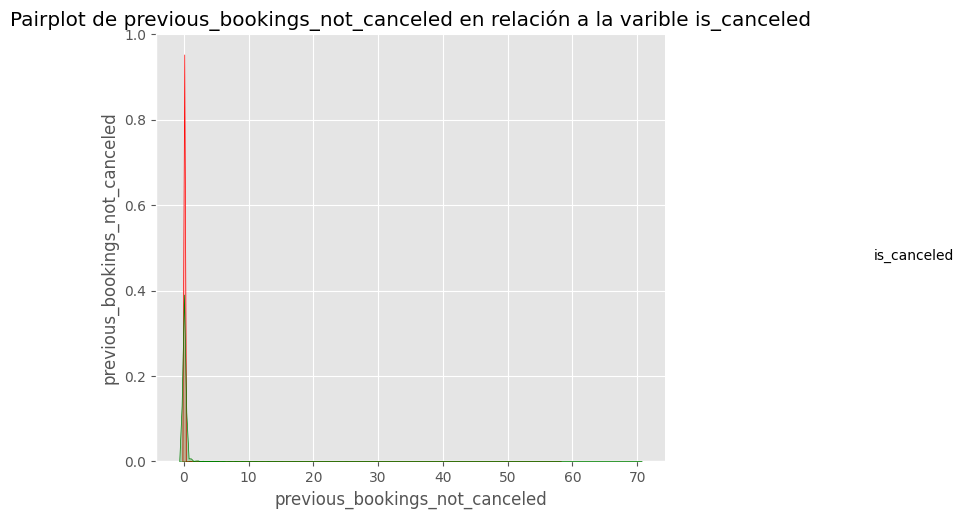

In [60]:
columns=['previous_bookings_not_canceled', 'is_canceled']
ds_pairplot=df_train[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"]).set(title="Pairplot de previous_bookings_not_canceled en relación a la varible is_canceled")
graf_pairplot.fig.set_size_inches(10,6)

La gran mayoría que no tenía reservas previas no canceladas han cancelado

#### Variable reserved_room_type

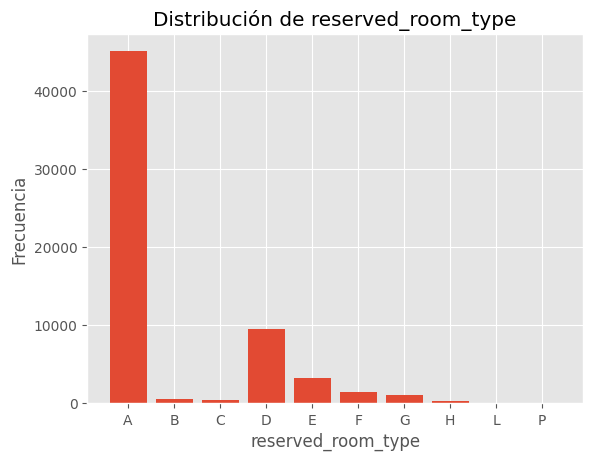

In [61]:
ds_agrupado_siwn=df_train.groupby(['reserved_room_type']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('reserved_room_type')
plt.title('Distribución de reserved_room_type')
 
plt.show()

La gran mayoría de los huéspedes reservan la habitación de tipo A.

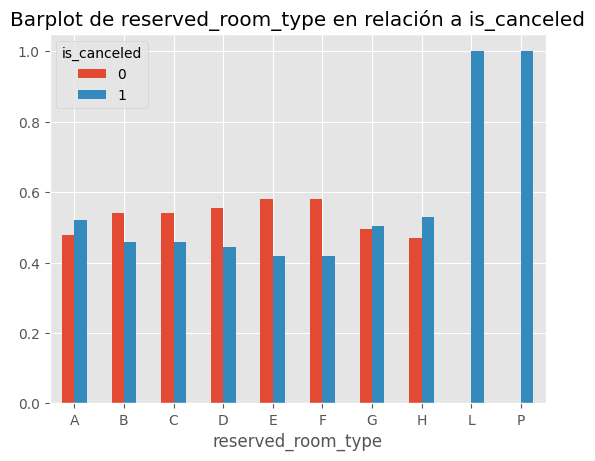

In [62]:
barplot_againts_target(df_train, 'reserved_room_type')

La paridad en cuanto a cancelados/no cancelados se mantiene de manera bastante uniforme excepto para los tipos de cuarto 'L' y 'P' donde son mayormente cancelados

#### Variable assigned_room_type

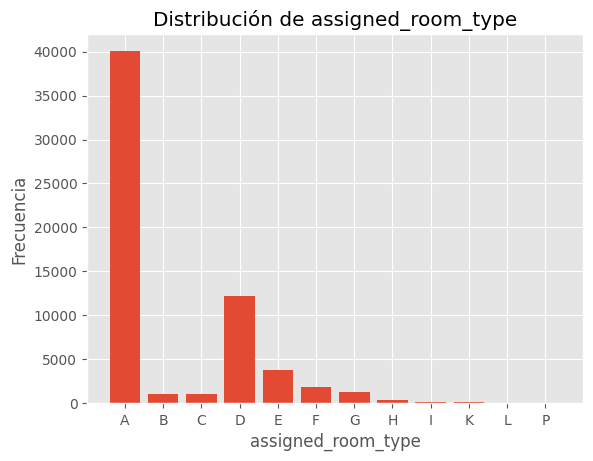

In [63]:
ds_agrupado_siwn=df_train.groupby(['assigned_room_type']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('assigned_room_type')
plt.title('Distribución de assigned_room_type')
 
plt.show()

La gran mayoría delas habitaciones que se asignan son de tipo A

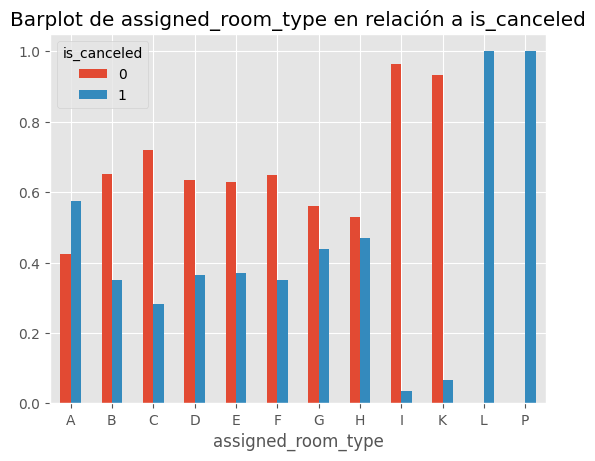

In [64]:
barplot_againts_target(df_train, 'assigned_room_type')

Los tipos de habitación 'I' y 'K' son los que mayormente no fueron cancelados mientras que los 'L' y 'P' casi siempre fueron cancelados

#### Variable required_car_parking_spaces

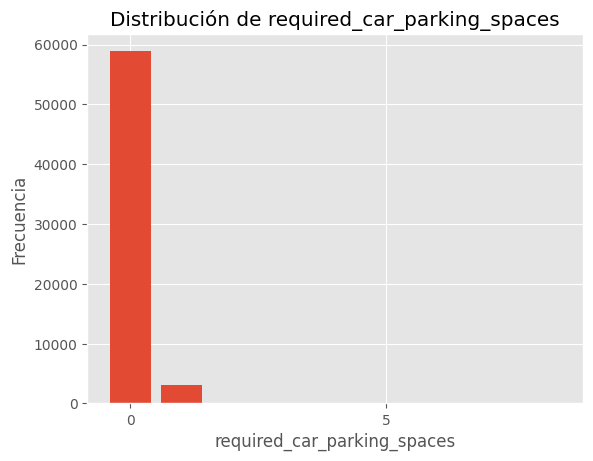

In [65]:
ds_agrupado_siwn=df_train.groupby(['required_car_parking_spaces']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('required_car_parking_spaces')
plt.title('Distribución de required_car_parking_spaces')
 
plt.show()

Casi todos los huéspedes no solicitan espacio para guardar su auto

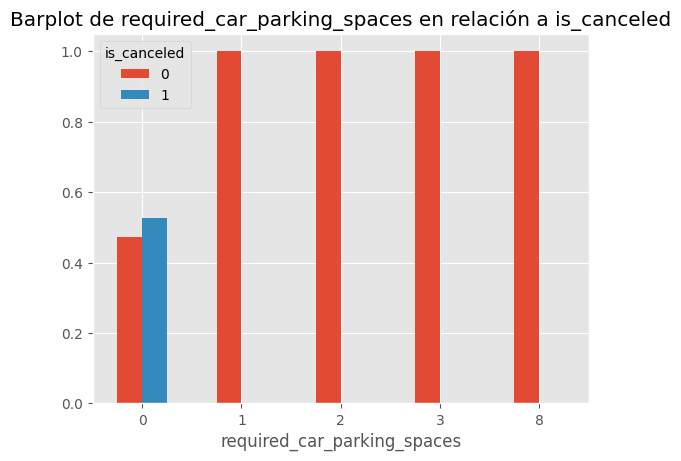

In [66]:
barplot_againts_target(df_train, 'required_car_parking_spaces')

Se puede observar como la gran mayoria que requirió al menos un espacio de estacionamiento no canceló la reserva


### Análisis inicial variables cualitativas

In [67]:
variables_cualitativas.head()

hotel meal country market_segment distribution_channel deposit_type  \
0    City Hotel   BB     USA      Online TA                TA/TO   No Deposit   
1  Resort Hotel   BB     PRT         Groups               Direct   No Deposit   
2    City Hotel   BB     CHE      Online TA                TA/TO   No Deposit   
3    City Hotel   BB     PRT         Groups                TA/TO   Non Refund   
4    City Hotel   BB     FRA  Offline TA/TO                TA/TO   No Deposit   

     customer_type  
0        Transient  
1        Transient  
2        Transient  
3        Transient  
4  Transient-Party

#### Variable hotel

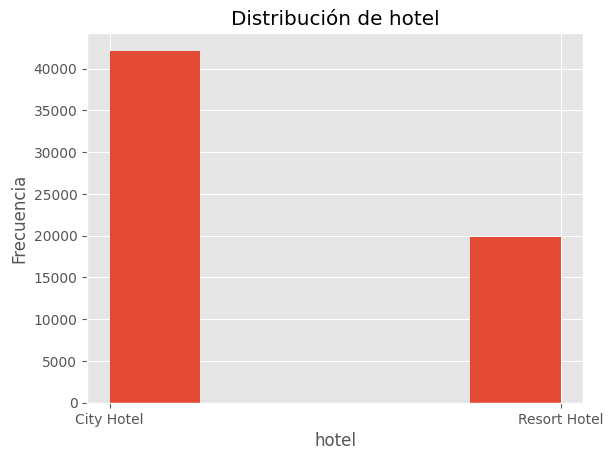

In [68]:
plt.title('Distribución de hotel')
plt.hist(df_train['hotel'], bins = 5 , alpha = 1)
plt.xlabel("hotel")
plt.ylabel("Frecuencia")
plt.show()

Los huespedes realizan más reservas al hotel City Hotel que al Resort Hotel

Se puede observar que hay más huespedes en el Resort Hotel que en el City Hotel

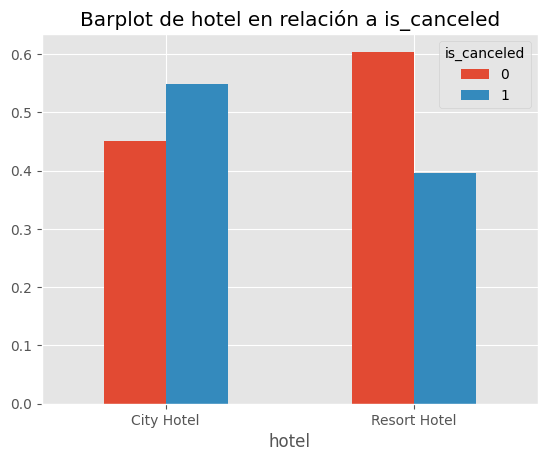

In [69]:
barplot_againts_target(df_train, 'hotel')

La mayoría de 'City Hotel' cancelaron mientras que la mayoría de 'Resort Hotel' no lo hicieron

#### Variable meal

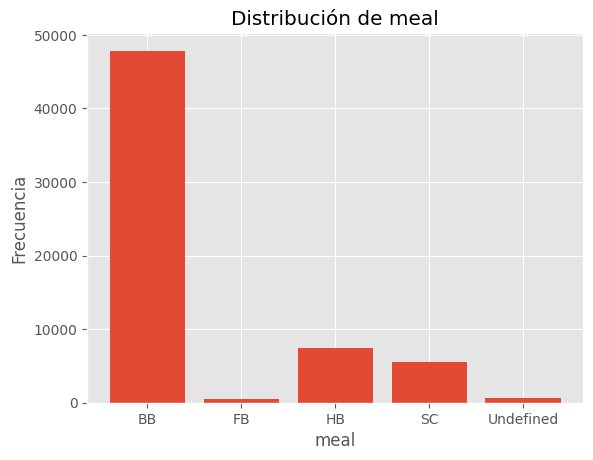

In [70]:
ds_agrupado_siwn=df_train.groupby(['meal']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('meal')
plt.title('Distribución de meal')
 
plt.show()

Casi todos los huéspedes solicitan la comida de tipo BB

Se puede observar que lo que más eligen los huéspedes es la opción de BB y la que menos se elige es la opción de FB

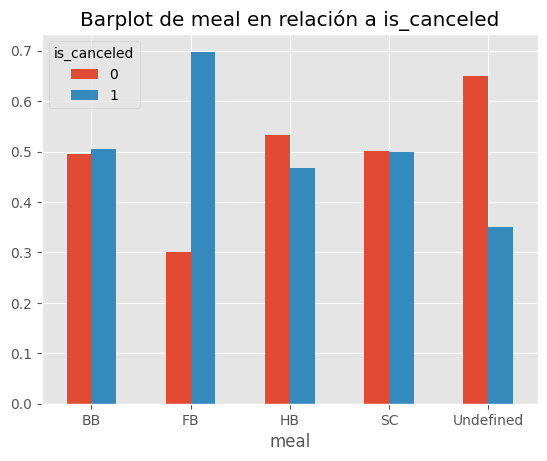

In [71]:
barplot_againts_target(df_train, 'meal')

El 70% de los que reservaron 'Full Board' cancelaron
y alrededor del 65% que reservaron sin paquete de comida no cancelaron

#### Variable market_segment

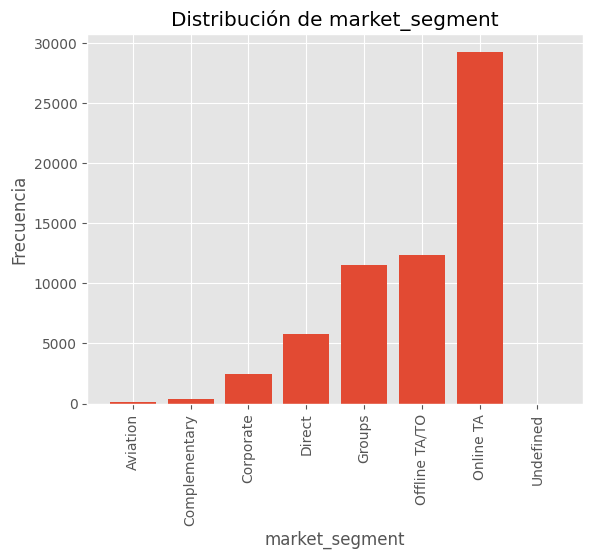

In [72]:
ds_agrupado_siwn=df_train.groupby(['market_segment']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('market_segment')
plt.title('Distribución de market_segment')
plt.xticks(rotation=90)
 
plt.show()

Lo que más se elige es la opción de Online TA,  luego la Offline TA y después Groups.

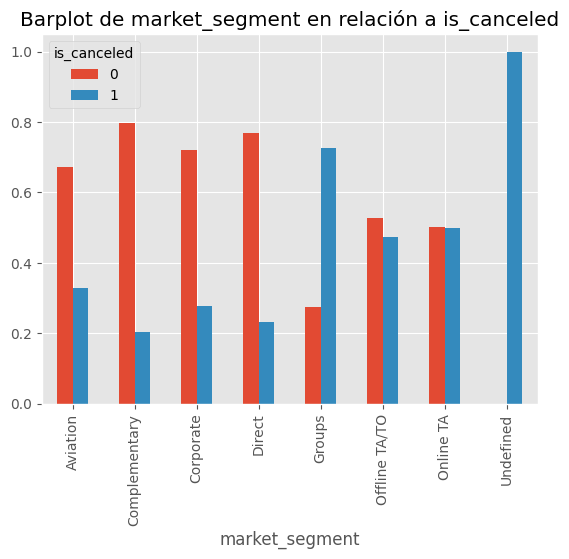

In [73]:
column='market_segment'
df_barplot = df_train.groupby(column)["is_canceled"].value_counts(normalize=True).unstack() 
df_barplot.plot(kind='bar', stacked=False)
plt.title('Barplot de '+ column +' en relación a is_canceled')
plt.show()


Los no definidos son cancelados, Groups es mayormente cancelado, mientras el resto es mayormente no cancelado

#### Variable distribution_channel

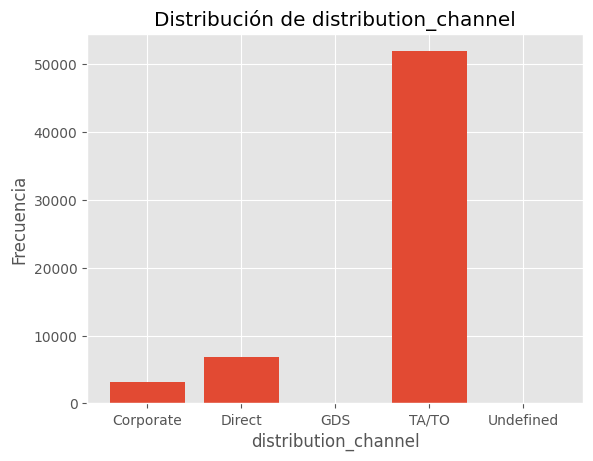

In [74]:
ds_agrupado_siwn=df_train.groupby(['distribution_channel']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('distribution_channel')
plt.title('Distribución de distribution_channel')
 
plt.show()

La gran mayoría son del tipo TA/TO

Aquí se puede ver que las reservas las hacen en su mayoría TA/TO

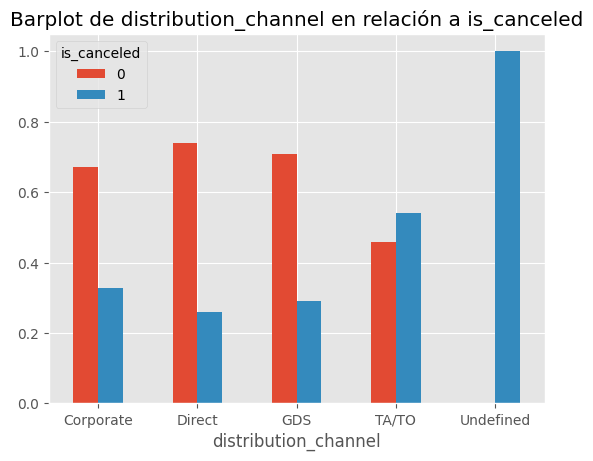

In [75]:
barplot_againts_target(df_train, 'distribution_channel')

Los no definidos son cancelados mientras el porcentaje del resto de casos es aproximadamanete del 60% no cancelados, excepto por TA/TO en el que es ligeramente mayor la cantidad de cancelados

#### Variable deposit_type

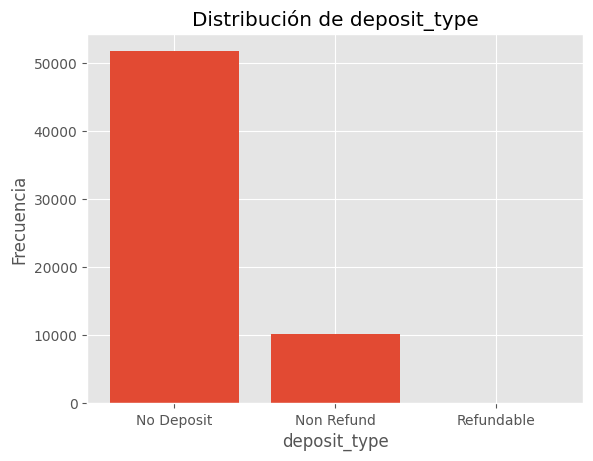

In [76]:
ds_agrupado_siwn=df_train.groupby(['deposit_type']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('deposit_type')
plt.title('Distribución de deposit_type')
 
plt.show()

La gran mayoría de los clientes no realizan depósitos

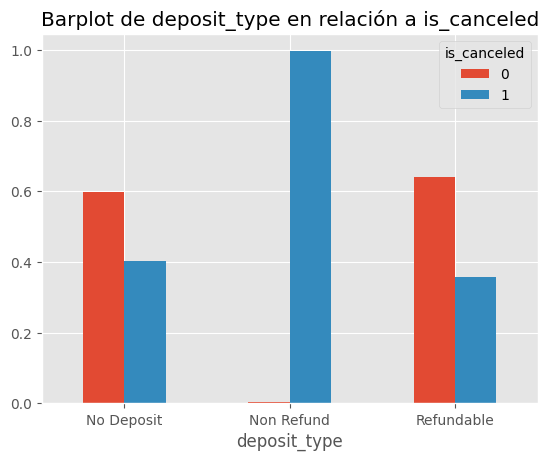

In [77]:
barplot_againts_target(df_train, 'deposit_type')

Cuando no se hizo un deposito o este era reintegrable la mayoria de las reservas no fueron canceladas. La mayoria de las veces que no se reintegró el dinero fué porque la reserva se canceló

#### Variable customer_type

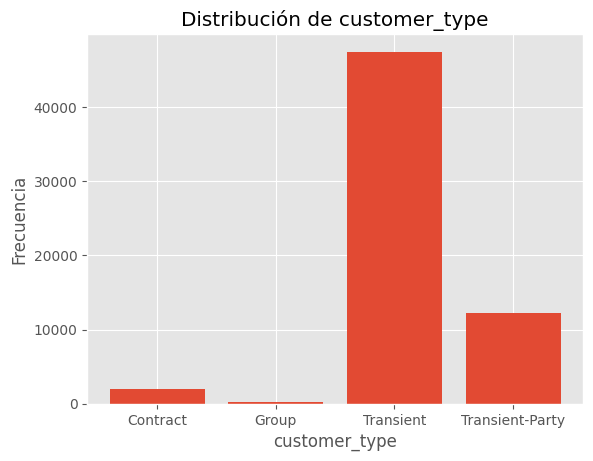

In [78]:
ds_agrupado_siwn=df_train.groupby(['customer_type']).count()

eje_x = ds_agrupado_siwn.index.tolist()
eje_y = ds_agrupado_siwn['hotel'].tolist()

plt.locator_params('x', nbins=2)
plt.bar(eje_x, eje_y)

plt.ylabel('Frecuencia')
plt.xlabel('customer_type')
plt.title('Distribución de customer_type')
 
plt.show()

La gran mayoría de las reservas están asociadas al tipo transient

Acá se puede ver que el tipo de reserva para Transient es el que se da con bastante mayor frecuencia.

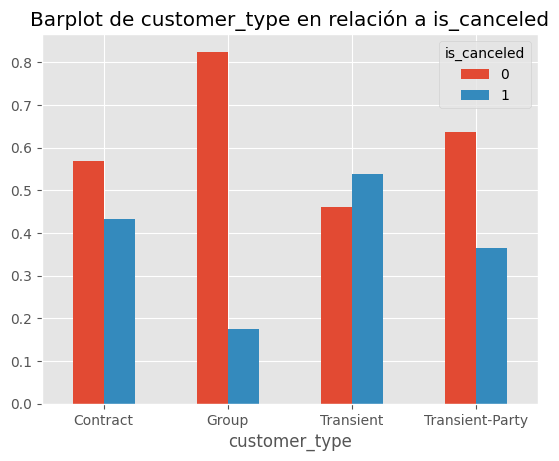

In [79]:
barplot_againts_target(df_train, 'customer_type')

Cuando la reserva es agendada por grupos hay notoriamente mayor cantidad de no cancelados

#### Variable country

La cantidad enorme de diferentes paises imposibilita el muestreo integral de los datos en una unica grafica. Por lo que vamos a estudiar los casos de mayor interes que son aquellos en los que mas frecuencia hay

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021
NLD      982
CHE      847
CN       597
AUT      581
CHN      545
Name: country, dtype: int64


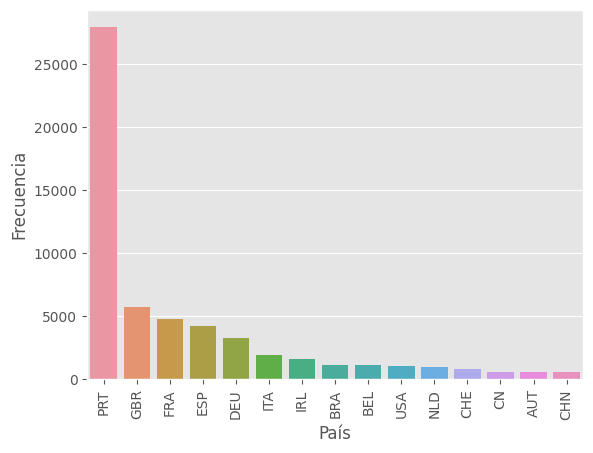

In [80]:
country = df_train['country'].value_counts().head(15)
sns.barplot(x=country.index, y=country.values).set(xlabel='País', ylabel='Frecuencia')
plt.xticks(rotation=90)
print(country)

Se puede observar como la gran mayoria de los huespedes son de "PRT" con 27950 casos. Y le sigue de lejos "GBR" con 5733

## Variables cuantitativas

En primer lugar, generamos estadísticas descriptivas para las columnas cuantitativas discretas(medidas de resumen).

In [81]:
variables_cuantitativas_discretas.describe()

lead_time  arrival_date_year  arrival_date_week_number  \
count  61913.000000       61913.000000               61913.00000   
mean     112.248187        2016.154749                  27.21808   
std      110.717953           0.708389                  13.52601   
min        0.000000        2015.000000                   1.00000   
25%       23.000000        2016.000000                  16.00000   
50%       78.000000        2016.000000                  28.00000   
75%      172.000000        2017.000000                  38.00000   
max      629.000000        2017.000000                  53.00000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count               61913.000000             61913.000000   
mean                   15.785812                 0.924135   
std                     8.795489                 0.993101   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                16.000000   

       stays_in_week_nights        adults      children        babies  \
count          61913.000000  61913.000000  61909.000000  61913.000000   
mean               2.510054      1.862791      0.104896      0.007155   
std                1.884926      0.589066      0.402847      0.092158   
min                0.000000      0.000000      0.000000      0.000000   
25%                1.000000      2.000000      0.000000      0.000000   
50%                2.000000      2.000000      0.000000      0.000000   
75%                3.000000      2.000000      0.000000      0.000000   
max               40.000000     55.000000     10.000000      9.000000   

       booking_changes  days_in_waiting_list  total_of_special_requests  \
count     61913.000000          61913.000000               61913.000000   
mean          0.195952              2.638977                   0.523703   
std           0.610519             18.619092                   0.775412   
min           0.000000              0.000000                   0.000000   
25%           0.000000              0.000000                   0.000000   
50%           0.000000              0.000000                   0.000000   
75%           0.000000              0.000000                   1.000000   
max          17.000000            391.000000                   5.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count            61913.000000                    61913.000000   
mean                 0.114790                        0.115420   
std                  0.993723                        1.396359   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       70.000000   

       required_car_parking_spaces  
count                 61913.000000  
mean                      0.049957  
std                       0.221023  
min                       0.000000  
25%                       0.000000  
50%                       0.000000  
75%                       0.000000  
max                       8.000000

Ahora mostraremos la media, mediana y moda de cada columna

In [82]:
for indice in columnas_cuantitativas_discretas:
  lead_time_media = df_train[indice].mean()
  lead_time_mediana = df_train[indice].median()
  lead_time_moda = df_train[indice].mode()
  print("La media de la variable {0} es {1} ".format(indice,lead_time_media))
  print("La mediana de la variable {0} es {1}".format(indice,lead_time_mediana))
  print("La moda de la variable {0} es {1}\n".format(indice,lead_time_moda))

La media de la variable lead_time es 112.24818697204141 
La mediana de la variable lead_time es 78.0
La moda de la variable lead_time es 0    0
Name: lead_time, dtype: int64

La media de la variable arrival_date_year es 2016.1547494064253 
La mediana de la variable arrival_date_year es 2016.0
La moda de la variable arrival_date_year es 0    2016
Name: arrival_date_year, dtype: int64

La media de la variable arrival_date_week_number es 27.21808020932599 
La mediana de la variable arrival_date_week_number es 28.0
La moda de la variable arrival_date_week_number es 0    33
Name: arrival_date_week_number, dtype: int64

La media de la variable arrival_date_day_of_month es 15.785812349587324 
La mediana de la variable arrival_date_day_of_month es 16.0
La moda de la variable arrival_date_day_of_month es 0    17
Name: arrival_date_day_of_month, dtype: int64

La media de la variable stays_in_weekend_nights es 0.9241354804322194 
La mediana de la variable stays_in_weekend_nights es 1.0
La moda de

Ahora mostraremos la media, la mediana y la moda de la variable cuantitativa continua

In [83]:
for indice in columnas_cuantitativas_continuas:
  lead_time_media = df_train[indice].mean()
  lead_time_mediana = df_train[indice].median()
  lead_time_moda = df_train[indice].mode()
  print("La media de la variable {0} es {1} ".format(indice,lead_time_media))
  print("La mediana de la variable {0} es {1}".format(indice,lead_time_mediana))
  print("La moda de la variable {0} es {1}\n".format(indice,lead_time_moda))

La media de la variable adr es 102.38377303635745 
La mediana de la variable adr es 95.0
La moda de la variable adr es 0    62.0
Name: adr, dtype: float64



## Variables cualitativas

Analizamos la cantidad de valores posibles de cada columna

In [84]:
variables_cualitativas.nunique()

hotel                     2
meal                      5
country                 149
market_segment            8
distribution_channel      5
deposit_type              3
customer_type             4
dtype: int64

Ahora indicaremos cuantas veces aparece cada posible caso de cada columna

In [85]:
for indice in columnas_cualitativas:
  hotel_valores = df_train[indice].value_counts()
  print("\nDel tipo: ",indice)
  print("Aparecen: \n",hotel_valores)


Del tipo:  hotel
Aparecen: 
 City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

Del tipo:  meal
Aparecen: 
 BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

Del tipo:  country
Aparecen: 
 PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

Del tipo:  market_segment
Aparecen: 
 Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64

Del tipo:  distribution_channel
Aparecen: 
 TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

Del tipo:  deposit_type
Aparecen: 
 No Deposit    51685
Non Refund    10150
Refundable       78

## Variables cuasicuantitativas

Ahora mostraremos la cantidad de valores posibles hay para cada columna de las variables cuasicuantitativas

In [86]:
variables_cuasicuantitativas.nunique()

arrival_date_month                12
is_repeated_guest                  2
reserved_room_type                10
assigned_room_type                12
required_car_parking_spaces        5
agent                            296
company                          276
id                             61913
dtype: int64

Ahora indicaremos cuantas veces aparece cada posible caso de cada columna

In [87]:
for indice in columnas_cuasicuantitativas:
  hotel_valores = df_train[indice].value_counts()
  print("\nDel tipo: ",indice)
  print("Aparecen: \n",hotel_valores)


Del tipo:  arrival_date_month
Aparecen: 
 August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

Del tipo:  is_repeated_guest
Aparecen: 
 0    60180
1     1733
Name: is_repeated_guest, dtype: int64

Del tipo:  reserved_room_type
Aparecen: 
 A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64

Del tipo:  assigned_room_type
Aparecen: 
 A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64

Del tipo:  required_car_parking_spaces
Aparecen: 
 0    58841
1     3058
2       12
8        1
3        1
Name: required_car_parking_spaces, dtype: int64

Del tipo:  agent
Aparecen: 
 9.0      

## Variables irrelevantes

In [88]:
id_valores = df_train["id"].value_counts()
print("Los posibles valores y la frecuencia con la que aparecen son \n",id_valores)

Los posibles valores y la frecuencia con la que aparecen son 
 7aa4cc6b-b92c-4061-b21d-4f9e0cac4689    1
4782fe38-2edf-48df-8a73-ff1df6150941    1
63068df5-6476-4d01-aa22-940eda3382eb    1
b442e553-c108-440f-8bf4-3a79d45e716c    1
c8e19318-10f5-4f61-a637-99ee6ae623c3    1
                                       ..
136f0dc4-424c-446d-9cf7-229ce4efbf0b    1
4dda8d58-4dbb-4bcf-9805-089a77c67553    1
2874695d-1cd4-4087-97e5-f235366fa774    1
2647c330-f992-4367-a655-670c8af94c65    1
7137e599-4442-41fb-b147-4aba9f344e38    1
Name: id, Length: 61913, dtype: int64


La variable ID es la que aporta un token único identificador para cada entrada por lo tanto esta si está fuera del scope de la investigación

Al entender el significado y naturaleza de cada variable observada se llega a la conclusión de que, a priori, resulta imposible afirmar que alguna de ellas sea irrelevante para el análisis. Ya que todas brindan información estrictamente ligada al problema y aparentan tener alguna relación con el target.


## Correlación entre variables

Para medir el nivel de correlación entre las variables utilizo el Coeficiente de Correlación de Pearson y lo muestro a través de un heatmap

<Axes: >

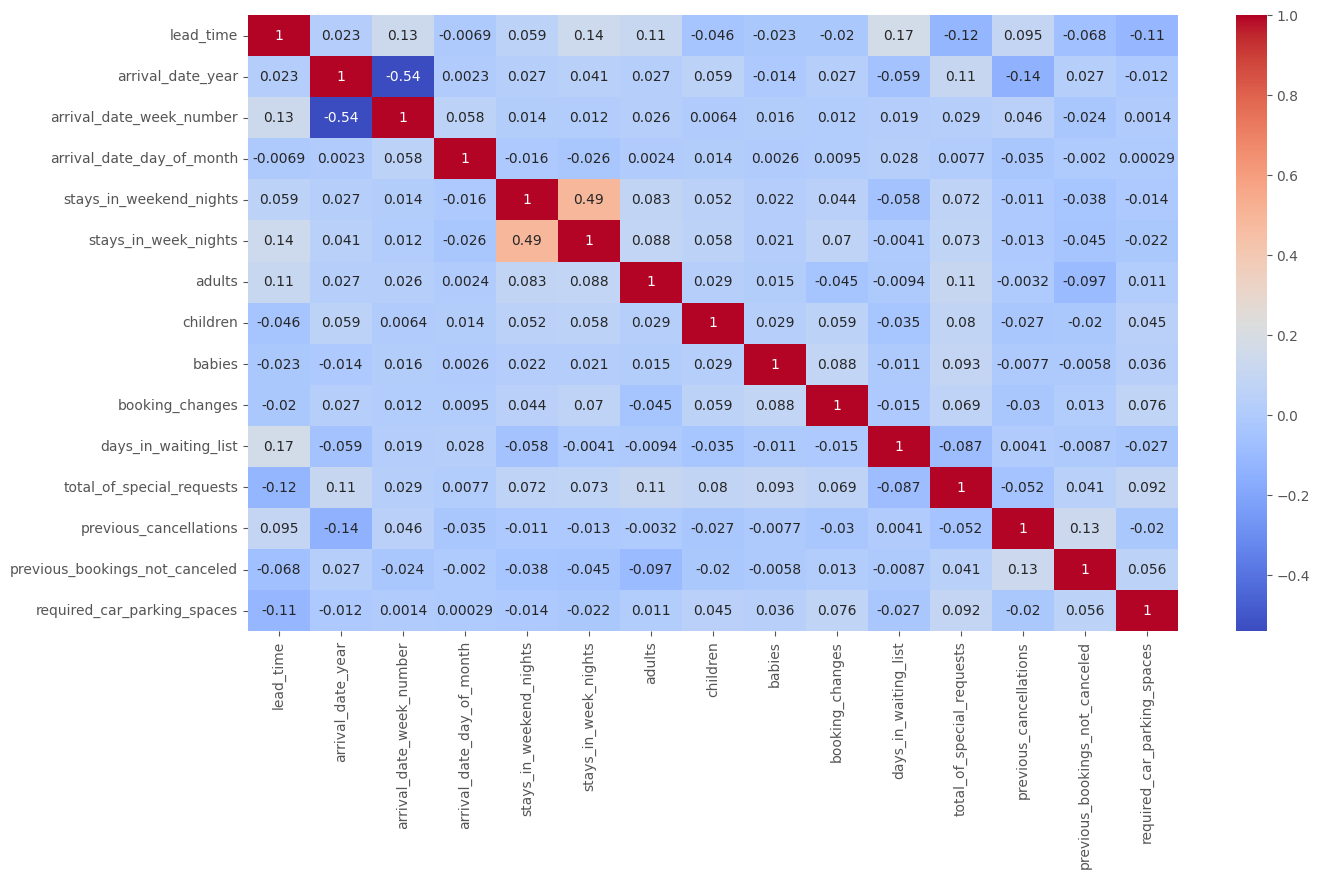

In [89]:
matriz_correlaciones_discretas = variables_cuantitativas_discretas.corr()
plt.figure(figsize = (15,8))
sns.heatmap(matriz_correlaciones_discretas, annot = True, cmap='coolwarm')


Al observar el heatmap se puede ver que no existen muchas correlaciones fuertes entre variables. Las mas destacadas son:

 Arrival_date_year guarda una correlación negativa con Arrival_date_week_number
*   Stays_in_weekend_nights correlación positiva con Stays_in_week_nights
*   Children correlacion positiva con adr
*   Is_repeated_guest correlación positiva con Previous_bookings_not_canceled


Muchas de las correlaciones pueden verse afectadas por los datos faltantes o valores atípicos, pero como primera exploración resulta útil. Como por ejemplo en la columna de la variable company hay demasiadas columnas con valores nulos, es por eso que esa relación está muy afectada, y no es un relación real


En cuanto al análisis de **variables redundantes** se pueden destacar arrival_date_year,arrival_date_week_number, arrival_date_day_of_month, arrival_date_month, las cuales nos brindan inform

## Relación con el target

Además del análisis gráfico en donde estudiamos la relación de las distribuciones de cada variable con el target. Incluimos un listado de las variables y por qué creemos que se da esa relación: 

*   **Variables cuantitativas discretas**:

    *   **Lead_time**: Si un cliente espera excesivo tiempo seguramente se harte y cancele la reserva
    *   **Arrival_date_week_number**: Vemos que hay intervalos dónde hay diferentes tendencias con el target pero a simple vista no pareciera establecerse una cuasalidad. 
    *   **adults | babies**: Ambos gráficos en relación con el target parecen indicar algunas tendencias, sin embargo la presencia de outliners no permiten apreciarlos con claridad.
    *   **booking_changes**: Aquellos que no realizaron cambios pareciera que tienden a no cancelar su reserva, sin embargo nuevamente hay problemas de escala debido a los outliners.
    *   **days_in_waiting_list**: es esperable que si esté mucho tiempo en lista de espera decida decantarse por otra opción. Se visualiza una tendencia de conservar la reserva si no tiene días en la lista de espera.
    *   **required_car_parking_spaces**: Se presume un incorrecta carga de datos ya que no se registran cancelaciones cuando se registra los espacios de estacinamiento.
    *   **total_of_special_requests**: Se puede ver una relación con mantener la reserva una vez se hace algún pedido especial.
    *   **previous_bookings_not_canceled**: Parecería haber una tendecia a cancelar para aquellos que nunca cancelaron una reserva pero la cantidad de outliners dificulta la interpretación.
    *   **previous_cancellations**: Aquellos que no tiene cancelaciones previas.
  
*   **Variables cuantitativas continuas**:
    *   **adr**: Pareciera haber una tendencia a no cancelar cuando la tarifa es 0, sin embargo ese valor presenta una posible inconguencia (ya que no tiene sentido que no haya tarifa, más bien parece un error de carga o una forma de marcar que no se tiene información al respecto)
  
*   **Variables cuasicuantitativas u ordinales**:
    *   **agent**: La mayoría de las reservas se realizan con el agente 9 el cual tiene un pequeño porcentaje de mayor cancelaciones.
    *   **company**: Podría llegar a haber una relación pero al ser un atributo que en su mayoria no tiene valor se debería despreciar.
    *   **is_repeated_guest**: Aquellos que nunca hicieron una reserva tiene una tendencia marcada a cancelar reservas en relación a quienes ya hicieron alguna.
    *   **reserved_room_type** variable estrechamente relacionada con el target, sobre todo al estudiarla en conjunto con assigned_room_type
    *   **assigned_room_type** como detallamos en la variable anterior ambas dos son de interés ya que se puede deducir cuantos clientes cancelaron luego de que su cuarto haya sido cambiado o no
    *   **required_car_parking_spaces** Puede resultar que a un huesped que viaja con vehiculo le resulte mas dificl conseguir un hotel y por ende sea mas propenso a conservar su reserva

*   **Variables cualitativas** 
    * **hotel**: El alojamiento en un resort es una experiencia en si misma mas allá del lugar que se está visitando, esto puede ser la razón por la que los huespedes los visitan a diferencia de un simple hotel que puede ser facilmente reemplazable por otro
    *   **meal**: Una reserva con todas las comidas puede resultar en ser mas caro
    *   **market_segment**: Podría ser mas dificil que se cancele un viaje en grupo que uno individual, y a su vez uno corporativo al estar organizado por una compañía es sostenido por una infraestructura mas seria
    *   **distribution_channel**: Podría suceder que las agencias de viaje tengan convenios con distintos hoteles por lo que resulte mas facil cambiar o cancelar una reserva através de este canal
    *   **deposit_type**: Uno puede deducir que cuando se hace un deposito grande y este se puede recuperar asistiendo a la reserva las probabilidades de cancelarla son mas bajas
    *   **customer_type**: Resulta interesante analisar si existe efectivamente alguna tendencia en cuanto a si las reservas en grupo son menormente canceladas
    *   **reservation_status**: Guarda una estrecha relación con el target ya que indica el estado de la reserva y puede ser muy util relacionarla con otras variables para estudiar los casos en que no se cancela pero tampoco asisten a la reserva
    *   **country**: Podría ser que por cuestiones económicas, politicas o diplomaticas un país decida poner travas a la entrada del país destino o salida del país origen

# Relación entre los datos

Con este gráfico se puede ver la relación entre la variable "previous_bookings_not_canceled" y "is_repeated_guest"

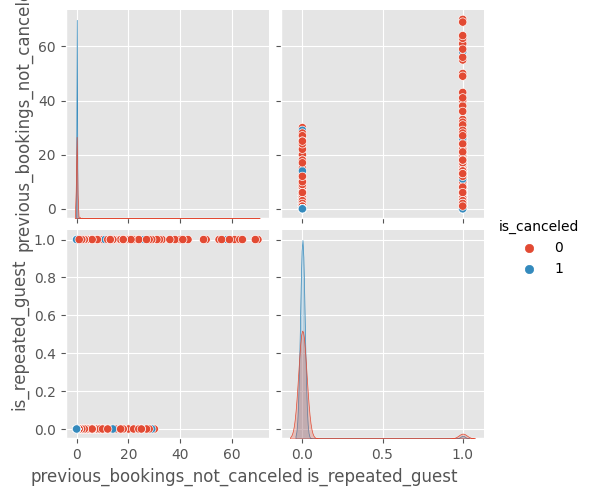

In [171]:
sns.pairplot(df_train, vars = ["previous_bookings_not_canceled", "is_repeated_guest"],hue = "is_canceled")


Se puede ver que cuando se trata de un huesped repetido, ese huesped tiene un mayor número de reservas no canceladas. También se puede ver que cuando el huesped ya tiene una cantidad de reservas viejas no canceladas es más probable que no cancele la reserva actual

Gracias a este gráfico se puede ver la relación entre la variable "adr" y "children"

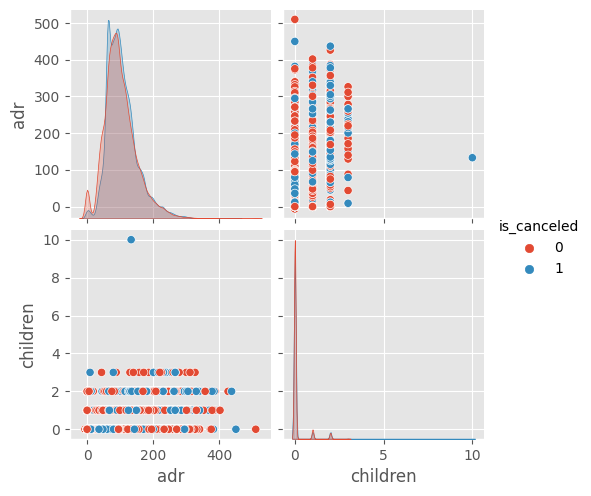

In [172]:
sns.pairplot(df_train, vars = ["adr", "children"],hue = "is_canceled")

Aquí se puede ver que casi todos llevan hasta 3 niños y el precio promedio no varía, manteniendose bastante similar llevando distintas cantidades de niños. La mayoría de los huéspedes que llevan niños tienen más probabilidad de que no cancelen la reserva.  

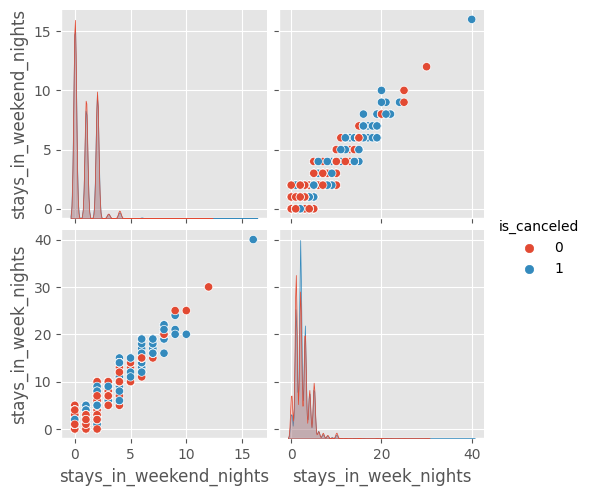

In [173]:
sns.pairplot(df_train, vars = ["stays_in_weekend_nights", "stays_in_week_nights"],hue = "is_canceled")


Acá se puede ver una relación bastante lineal, esto se puede deber a que la mayoría de los huespedes se quedaron una cantidad de noches similares de fin de semana y entre semana, en proporción a la cantidad de noches que hay en un fin de semana y en una semana.

Este gráfico permite ver la correlación de las variables arrival_date_year y arrival_date_week_number

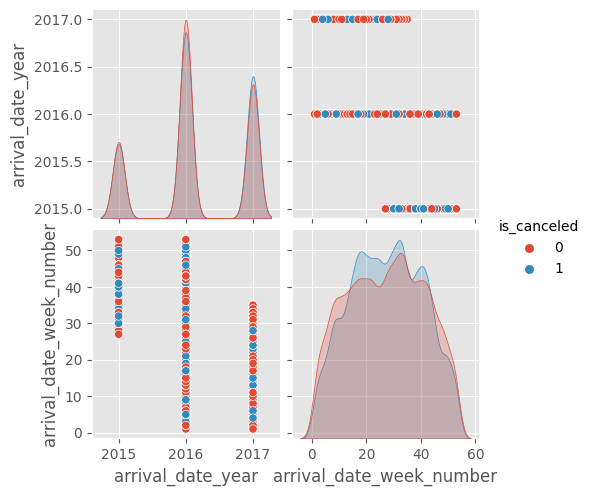

In [174]:
sns.pairplot(df_train, vars = ["arrival_date_year", "arrival_date_week_number"],hue = "is_canceled")


Aquí se puede ver que en el año 2015, se recibieron más huespedes en la segunda mitad del año. En el año 2016, se recibieron huespedes durante todo el año y en el año 2017 se recibieron huespedes en las primeras tres cuartas partes del año

# Análisis de datos faltantes


## Análisis

Hacemos un preanálisis de en dónde se encuentran los nulos y en qué porcentaje

In [253]:
def datos_undefined(data):
  print("Datos que contienen Undefined")
  print('____________________________')
  tienen_undefined = data.astype('str').eq('Undefined').any(0)
  print(tienen_undefined.loc[lambda x : x == True])

def datos_nulos(data):
  print("Datos que contienen null")
  print('____________________________')

  df_nulos = pd.DataFrame(data=data.columns[data.isnull().any()].tolist(), columns=['column'])
  df_nulos['quantity'] = data.isnull().sum().loc[lambda x : x != 0].tolist()
  df_nulos['percent'] = (data.isnull().sum().loc[lambda x : x != 0] *100 / len(data.index)).tolist()

  print(df_nulos.to_string(index=False))


def analisis_datos_faltantes(data):
  print('____________________________')
  datos_undefined(data)
  print('____________________________')
  datos_nulos(data)
  

In [254]:
analisis_datos_faltantes(df_train)

____________________________
Datos que contienen Undefined
____________________________


<ipython-input-253-a704b6e48618>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tienen_undefined = data.astype('str').eq('Undefined').any(0)


meal                    True
market_segment          True
distribution_channel    True
dtype: bool
____________________________
Datos que contienen null
____________________________
  column  quantity   percent
children         4  0.006461
 country       221  0.356952
   agent      7890 12.743689
 company     58761 94.908985


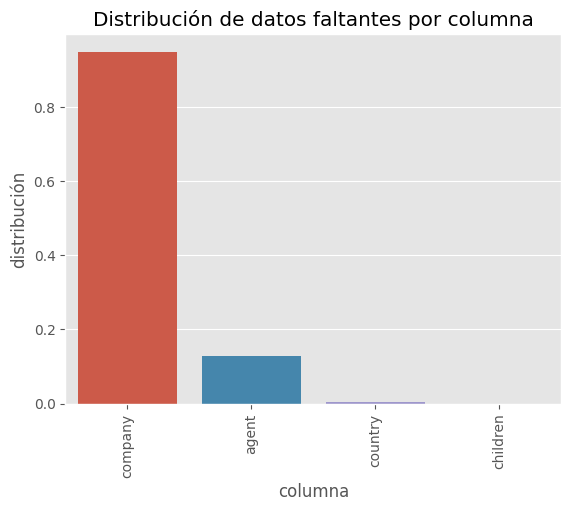

In [255]:
cantidad_de_datos_nulos_por_columna = df_train.isna().sum()
frecuencia_relativa = cantidad_de_datos_nulos_por_columna / df_train.shape[0]
frecuencia_relativa = frecuencia_relativa[frecuencia_relativa.values != 0]
frecuencia_relativa = frecuencia_relativa.sort_values(ascending=False)

ax = sns.barplot(x=frecuencia_relativa.index, y=frecuencia_relativa.values)
ax.set(
    title="Distribución de datos faltantes por columna",
    xlabel="columna",
    ylabel="distribución",
)
ax.tick_params("x", labelrotation=90)

Ahora para el caso de variables cualitativas `meal`, `market_segment` y `distribution_channel` analizaremos su distribución.

In [256]:
def frecuencia_de_undefined(data, columna):
  tot = len(data[columna].index)
  undefineds = len(data[data[columna] == 'Undefined'].index)
  perc =  (undefineds / tot)*100
  print(f"Porcentaje de Undefined en {columna} : ", round(perc, 3))
  return data[data[columna] == 'Undefined'].index.tolist();

print('Dataset Train')
print('__________________')
index_meal = frecuencia_de_undefined(df_train, 'meal')
index_ms = frecuencia_de_undefined(df_train, 'market_segment')
index_dc = frecuencia_de_undefined(df_train, 'distribution_channel')

print('Dataset Test')
print('__________________')
index_meal = frecuencia_de_undefined(df_test, 'meal')
index_ms = frecuencia_de_undefined(df_test, 'market_segment')
index_dc = frecuencia_de_undefined(df_test, 'distribution_channel')

Dataset Train
__________________
Porcentaje de Undefined en meal :  0.955
Porcentaje de Undefined en market_segment :  0.003
Porcentaje de Undefined en distribution_channel :  0.006
Dataset Test
__________________
Porcentaje de Undefined en meal :  0.897
Porcentaje de Undefined en market_segment :  0.0
Porcentaje de Undefined en distribution_channel :  0.0


## Eliminación

### company

Vemos que el casi el 95% de la columna `company` está faltante, entonces podríamos eliminarla 

In [257]:
df_train_complete.drop("company", axis=1, inplace=True)

In [258]:
df_test.drop("company", axis=1, inplace=True)

### market_segment / distribution_channel

Al ser poca cantidad de datos, para `market_segment` y `distribution_channel` se eliminarán. Y para `meal` la consideraremos un nueva categoria (ya que tambien se encuentra en el dataset de test).

In [259]:
index_ms = frecuencia_de_undefined(df_train_complete, 'market_segment')
df_train_complete.drop(index=index_ms, axis=1, inplace=True)

Porcentaje de Undefined en market_segment :  0.003


In [260]:
index_dc = frecuencia_de_undefined(df_train_complete, 'distribution_channel')
df_train_complete.drop(index=index_dc, axis=1, inplace=True)

Porcentaje de Undefined en distribution_channel :  0.003


In [261]:
print('Dataset Train Complete')
print('__________________')
index_ms = frecuencia_de_undefined(df_train_complete, 'market_segment')
index_dc = frecuencia_de_undefined(df_train_complete, 'distribution_channel')

Dataset Train Complete
__________________
Porcentaje de Undefined en market_segment :  0.0
Porcentaje de Undefined en distribution_channel :  0.0


## Imputaciones

Para las variables `agent` y `children` se podría reemplazar los valores nulos por su media, ya que es muy chico el porcentaje de valores nulos.


Algunas estrategias para imputar los datos faltantes son:

- Sustitución de Casos: Se reemplaza con valores no observados. Hay que consultar con un experto.
- Sustitución por Media: Se reemplaza utilizando la medida calculada de los valores presentes. Sin embargo, esto trae consecuencias
    - La varianza estimada por la nueva variable no es válida ya que es atenuada por los valores repetidos
    - Se distorsiona la distribución
    - Las correlaciones que se observen estarán deprimidas debido a la repetición de un solo valor constante.
- Imputación Cold Deck: Se pueden obtener los datos faltantes a partir de otras variables del dataset.
- Imputacion Hot Deck: Se reemplazan los datos faltante con los valores que resultan más “similares”. Tenemos que definir qué es “similar”, para ello se puede usar la técnica: K vecinos más cercanos.
- Imputación por Regresión: El dato faltante se reemplaza con el valor predicho por un modelo de regresión.
- MICE (multivariate imputation by chained equations): Trabaja bajo el supuesto de que el origen de los datos es MAR (missing at random). Es un proceso de imputación iterativo, donde en cada iteración los valores faltantes se predicen en función de las variables restantes. El proceso se repite hasta que se encuentre consistencia en los datos (usualmente 10 iteraciones es suficiente). La primera iteración se realiza por uno de los métodos vistos anteriormente para rellenar los datos faltantes.



### agent

Gráfico de densidad previo a las imputaciones

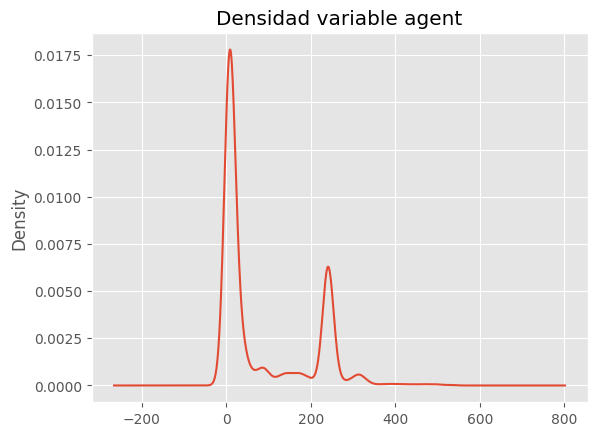

In [262]:
grf=df_train['agent'].plot.kde(title="Densidad variable agent",xlabel="Agent",ylabel="Densidad")

Se imputan los nuevos valores

In [263]:
df_train_complete.fillna({"agent": -1}, inplace=True)
df_train_complete.replace({-1:df_train["agent"].median()})
datos_nulos(df_train_complete)

Datos que contienen null
____________________________
 column  quantity  percent
country       221 0.356976


Aquí se puede ver que en la columna `agent` ya no hay espacios nulos.

<Axes: title={'center': 'Densidad variable agent'}, ylabel='Density'>

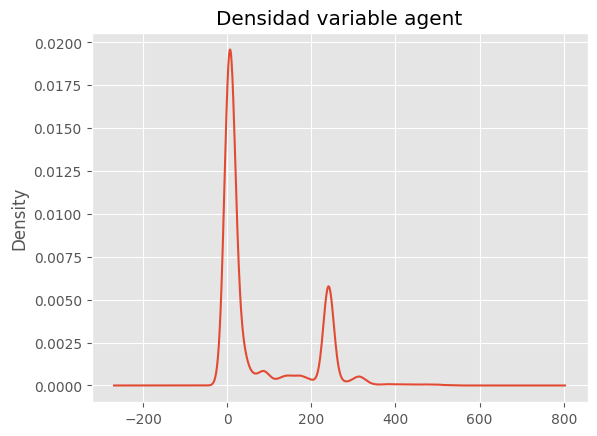

In [264]:
df_train_complete['agent'].plot.kde(title="Densidad variable agent",xlabel="Age",ylabel="Densidad")

Se reemplaza la media a los nulls de `agent`

In [265]:
df_test.fillna({"agent": -1}, inplace=True)
df_test.replace({-1:df_train["agent"].median()})
datos_nulos(df_test)

Datos que contienen null
____________________________
 column  quantity  percent
country        95 0.358018


### children

Gráfico de densidad previo a las imputaciones

<Axes: title={'center': 'Densidad variable children'}, ylabel='Density'>

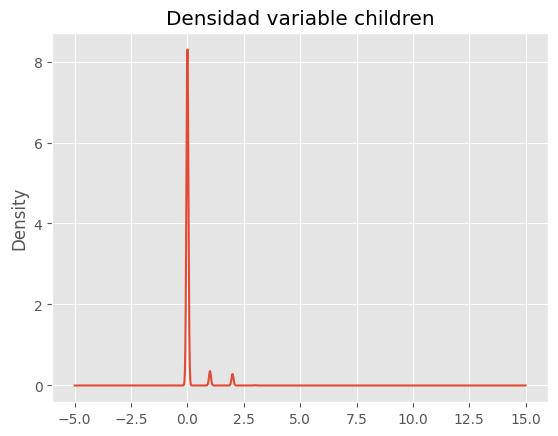

In [266]:
df_train['children'].plot.kde(title="Densidad variable children",xlabel="Children",ylabel="Densidad")

Se imputan los nuevos valores

In [267]:
df_train_complete.fillna({"children": -1}, inplace=True)
df_train_complete.replace({-1:df_train["children"].median()})
datos_nulos(df_train_complete)

Datos que contienen null
____________________________
 column  quantity  percent
country       221 0.356976


Aquí se puede ver que en la columna `children` ya no hay espacios nulos.

<Axes: title={'center': 'Densidad variable children'}, ylabel='Density'>

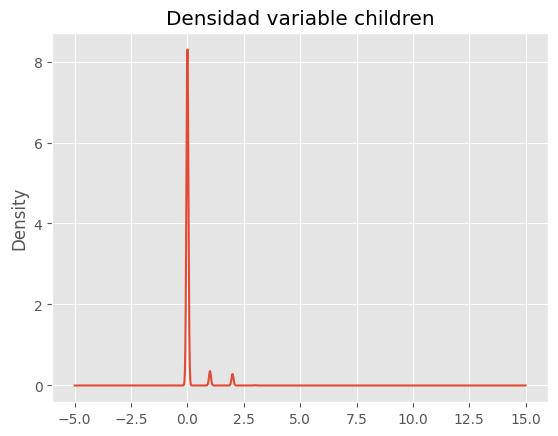

In [268]:
df_train_complete['children'].plot.kde(title="Densidad variable children",xlabel="Children",ylabel="Densidad")

Podemos ver que las distribuciones después de las imputaciones son bastante similares, esto se debe a que el porcentaje de valores nulos era bastante pequeño y que se hayan llenado esos valores con la media no marca ninguna diferencia

### country

En el caso de `country`, son pocos casos y al ser una variable cualitativa, consideraremos estos datos como un nuevo valor 'No-Data'

In [269]:
df_train_complete.fillna({"country": -1}, inplace=True)
df_train_complete.replace({-1:"No-data"})

datos_nulos(df_train_complete)

Datos que contienen null
____________________________
Empty DataFrame
Columns: [column, quantity, percent]
Index: []


Se reemplaza como una nueva categoria a los nulls de `country`

In [270]:
df_test.fillna({"country": -1}, inplace=True)
df_test.replace({-1:"No-data"})
datos_nulos(df_test)

Datos que contienen null
____________________________
Empty DataFrame
Columns: [column, quantity, percent]
Index: []


## Posibles incongruencias

#### arrival_date_week_number / arrival_date_day_of_month

En este caso no se presentan valores atípicos visibles en el boxplot, sin embargo cualquier valor por encima de 53 sería incongruente dado que no pueden haber más de 53 semanas en un año.

In [271]:
df_train_complete[df_train_complete['arrival_date_week_number']>53]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, id, is_canceled]
Index: []

[0 rows x 30 columns]

Nuevamente, al igual que arrival_date_week_number hay que corroborar que no haya ningún valor por encima de 31 ya que sería un error de carga.

In [272]:
df_train_complete[df_train_complete['arrival_date_day_of_month']>31]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, id, is_canceled]
Index: []

[0 rows x 30 columns]

#### adults/children

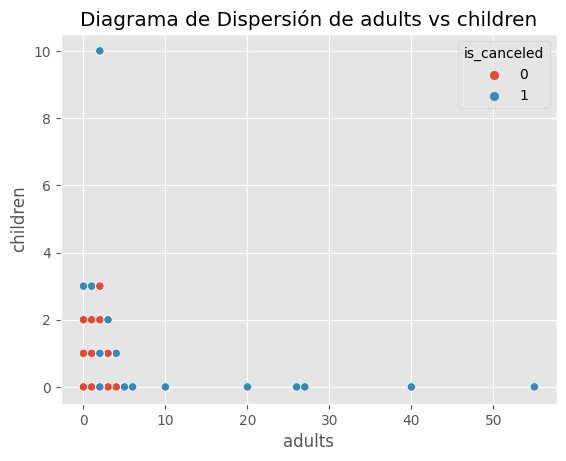

In [273]:
scatterplot_againts_target('adults', 'children')

In [274]:
ds_sin_adultos = df_train_complete[(df_train_complete['adults'] == 0)]
ds_sin_hospedados = ds_sin_adultos[ds_sin_adultos['children'] == 0]

ds_sin_hospedados

hotel  lead_time  arrival_date_year arrival_date_month  \
270    City Hotel          4               2017           February   
464    City Hotel         64               2015            October   
2249   City Hotel         26               2017               June   
2408   City Hotel          0               2017              March   
2474   City Hotel        244               2016               July   
...           ...        ...                ...                ...   
57225  City Hotel        244               2016               July   
57772  City Hotel          0               2016               July   
59389  City Hotel          0               2015             August   
60837  City Hotel         33               2017                May   
61003  City Hotel         57               2016           November   

       arrival_date_week_number  arrival_date_day_of_month  \
270                           8                         21   
464                          42                         16   
2249                         25                         19   
2408                         11                         17   
2474                         28                          6   
...                         ...                        ...   
57225                        28                          6   
57772                        30                         19   
59389                        33                         11   
60837                        19                          9   
61003                        46                          9   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
270                          0                     3       0       0.0  ...   
464                          2                     3       0       0.0  ...   
2249                         1                     4       0       0.0  ...   
2408                         0                     0       0       0.0  ...   
2474                         2                     4       0       0.0  ...   
...                        ...                   ...     ...       ...  ...   
57225                        2                     4       0       0.0  ...   
57772                        0                     1       0       0.0  ...   
59389                        2                    10       0       0.0  ...   
60837                        0                     1       0       0.0  ...   
61003                        0                     2       0       0.0  ...   

       booking_changes deposit_type agent days_in_waiting_list  \
270                  0   No Deposit  -1.0                    0   
464                  2   No Deposit  50.0                    0   
2249                 2   No Deposit   9.0                    0   
2408                 0   No Deposit   9.0                    0   
2474                 0   No Deposit  19.0                    0   
...                ...          ...   ...                  ...   
57225                0   No Deposit  19.0                    0   
57772                2   No Deposit  14.0                    0   
59389               11   No Deposit  -1.0                    0   
60837                3   No Deposit  87.0                    0   
61003                0   No Deposit  14.0                    0   

         customer_type     adr  required_car_parking_spaces  \
270    Transient-Party    0.00                            0   
464    Transient-Party    0.00                            0   
2249         Transient   90.00                            0   
2408         Transient    0.00                            0   
2474         Transient    0.00                            0   
...                ...     ...                          ...   
57225        Transient    0.00                            0   
57772        Transient    0.00                            0   
59389            Group    0.00                            0   
60837        Transient  200.00                        

Debido a que no deberían haber reservas sin húespedes, procedemos a eliminarlas de dataframe completo

In [275]:
cant_before_delete = len(df_train_complete.index)
df_train_complete.drop(index=ds_sin_hospedados.index, inplace=True)
cant_after_delete = len(df_train_complete.index)
print(f'Se eliminaron {cant_before_delete - cant_after_delete} datos')

Se eliminaron 76 datos


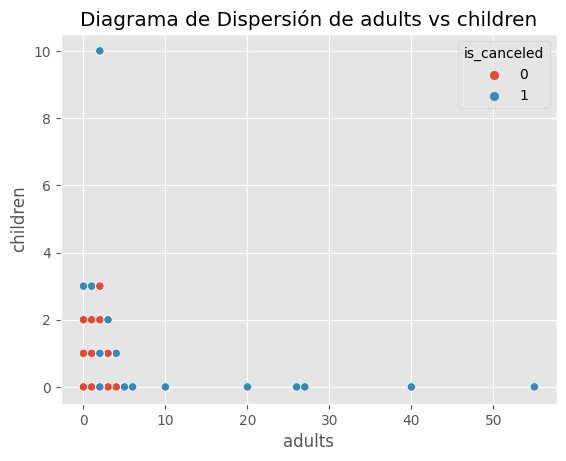

In [276]:
scatterplot_againts_target('adults', 'children')

# Análisis de valores atípicos

## Análisis Univariado

In [277]:
df_train_clean_uni = df_train_complete.copy()

### Analisis por IQR

Mediante los gráficos de Box-Plot vamos a intentar identificar outliers univariados.

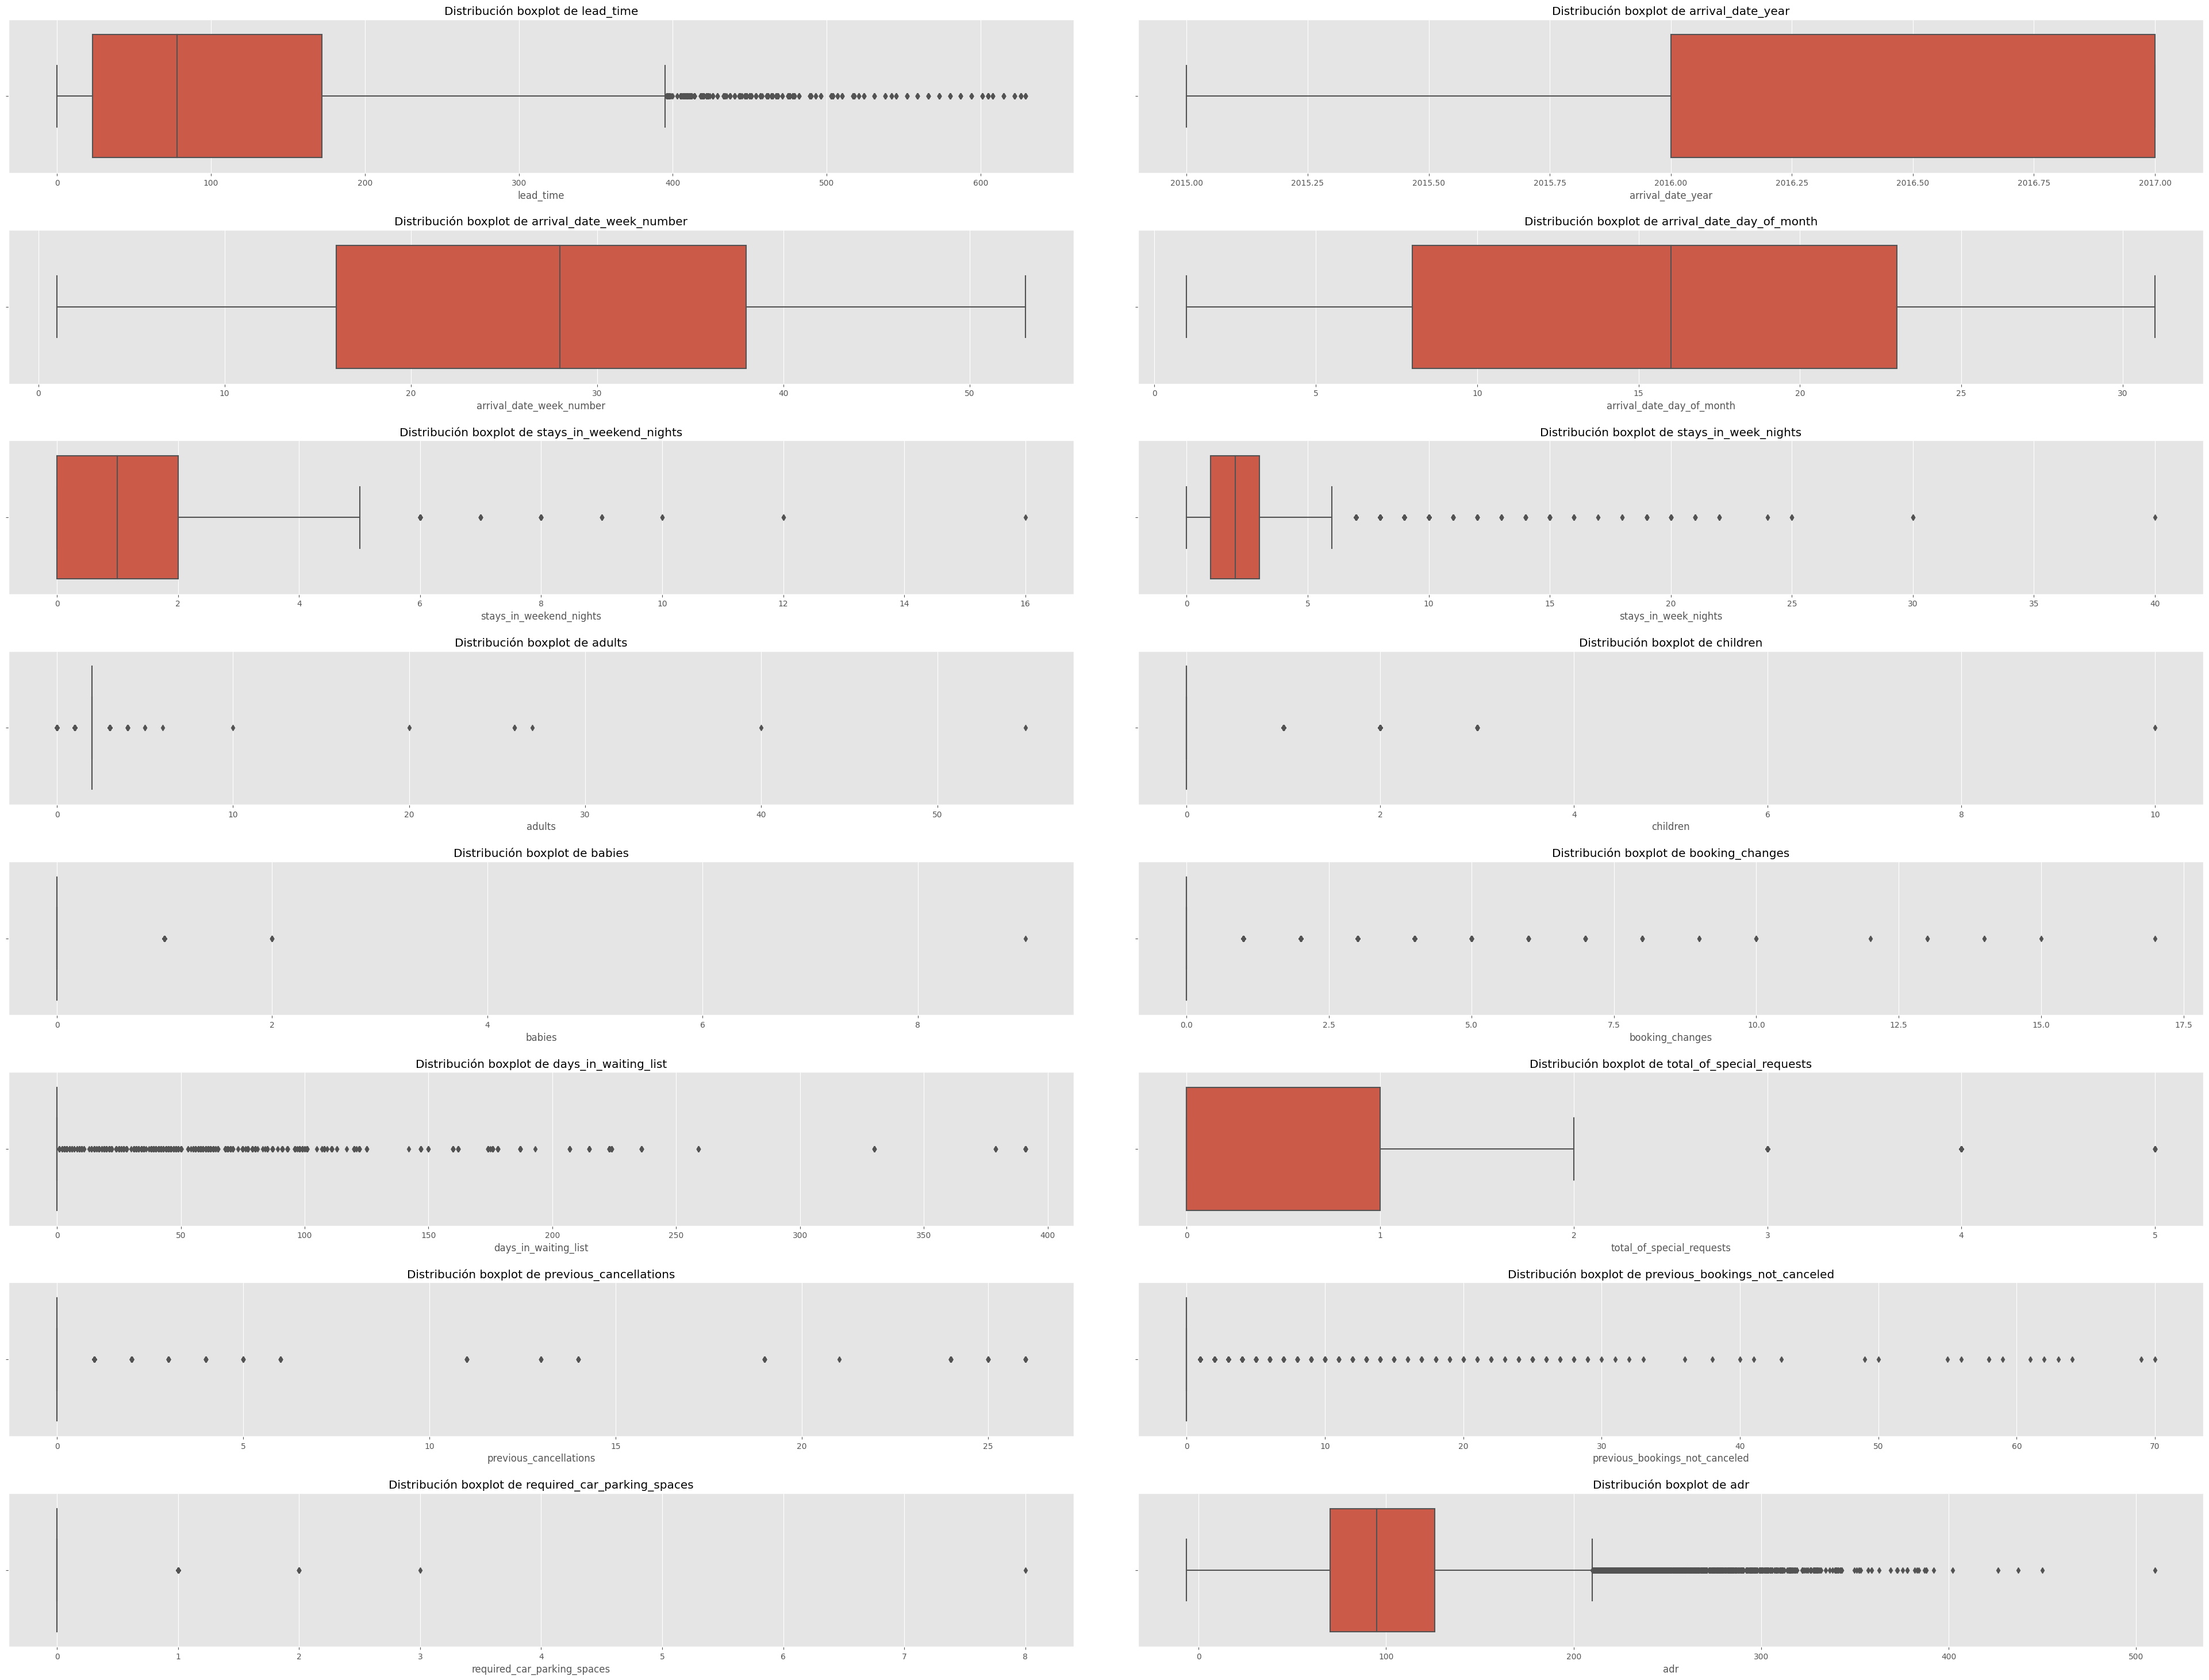

In [278]:
boxplots_var_cuantitativas(df_train_complete, columnas_cuantitativas)

Dado que en varios casos hay outliers severos viendo los gráficos de boxplot vamos a intenficar la proporcion de outliers para cada variable dada una toleracia de 3 iqr.

In [279]:
PORCENTAJE_MINIMO = 1

In [280]:
def calcular_datos_para_limpiar(dataset, columna):
  columna_q1 = df_train_complete[columna].quantile(0.25)
  columna_q3 = df_train_complete[columna].quantile(0.75)
  iqr = columna_q3 - columna_q1

  lim_superior = columna_q3 + 3*iqr
  lim_inferior = columna_q1 - 3*iqr

  filtro_columna = (dataset[columna] > lim_superior) | (dataset[columna] < lim_inferior)

  cant = dataset[filtro_columna].index.size
  perc =(cant / df_train_complete.index.size)*100 

  return cant, perc, filtro_columna;

def limpiar_de_outliers_severos(dataset, columna):
    cant, perc, filter = calcular_datos_para_limpiar(dataset, columna);
    print(f"Outliers de {columna}")
    print("-------------------------")
    print(f"Filas comprometidas: {cant}")
    dataset.drop(index=dataset[filter].index, inplace=True)
    print('ELIMINADOS')
    print("________________________")

def analisis_de_outliers_severos(dataset, columna):
      
      cant, perc, filter = calcular_datos_para_limpiar(dataset, columna);

      if(cant == 0 or perc < PORCENTAJE_MINIMO):
        return;

      print(f"Outliers de {columna}")
      print("-------------------------")
      print(f"Filas comprometidas: {cant}")
      print(f"Proporción respecto del total: {round(perc, 3)} %")
      print("________________________")

for columna in columnas_cuantitativas:
  analisis_de_outliers_severos(df_train, columna)

Outliers de stays_in_week_nights
-------------------------
Filas comprometidas: 728
Proporción respecto del total: 1.177 %
________________________
Outliers de adults
-------------------------
Filas comprometidas: 14951
Proporción respecto del total: 24.18 %
________________________
Outliers de children
-------------------------
Filas comprometidas: 4452
Proporción respecto del total: 7.2 %
________________________
Outliers de booking_changes
-------------------------
Filas comprometidas: 8317
Proporción respecto del total: 13.451 %
________________________
Outliers de days_in_waiting_list
-------------------------
Filas comprometidas: 2235
Proporción respecto del total: 3.615 %
________________________
Outliers de previous_cancellations
-------------------------
Filas comprometidas: 4394
Proporción respecto del total: 7.106 %
________________________
Outliers de previous_bookings_not_canceled
-------------------------
Filas comprometidas: 1538
Proporción respecto del total: 2.487 %
__

Para aquellos valores que contienen una cantidad de valores atipicos severos mayor al 1% los trataremos aparte debido a que su inmediata eliminacion podria modificar el data set.


Aquellos que presentan mayores alteraciones en sus outliers y vemos necesaria su eliminacion son `days_in_waiting_list` y `previous_bookings_not_canceled`. Ya que ambos pueden presentar modificaciones por su cantidad de datos outliers pero a la vez la eliminación de estos datos severos no alteran significativamente el data set.

In [281]:
limpiar_de_outliers_severos(df_train_clean_uni, 'days_in_waiting_list')
limpiar_de_outliers_severos(df_train_clean_uni, 'previous_bookings_not_canceled')

datos_totales_eliminados = len(df_train_complete.index) - len(df_train_clean_uni.index)
datos_totales_eliminados

Outliers de days_in_waiting_list
-------------------------
Filas comprometidas: 2232
ELIMINADOS
________________________
Outliers de previous_bookings_not_canceled
-------------------------
Filas comprometidas: 1512
ELIMINADOS
________________________


3744

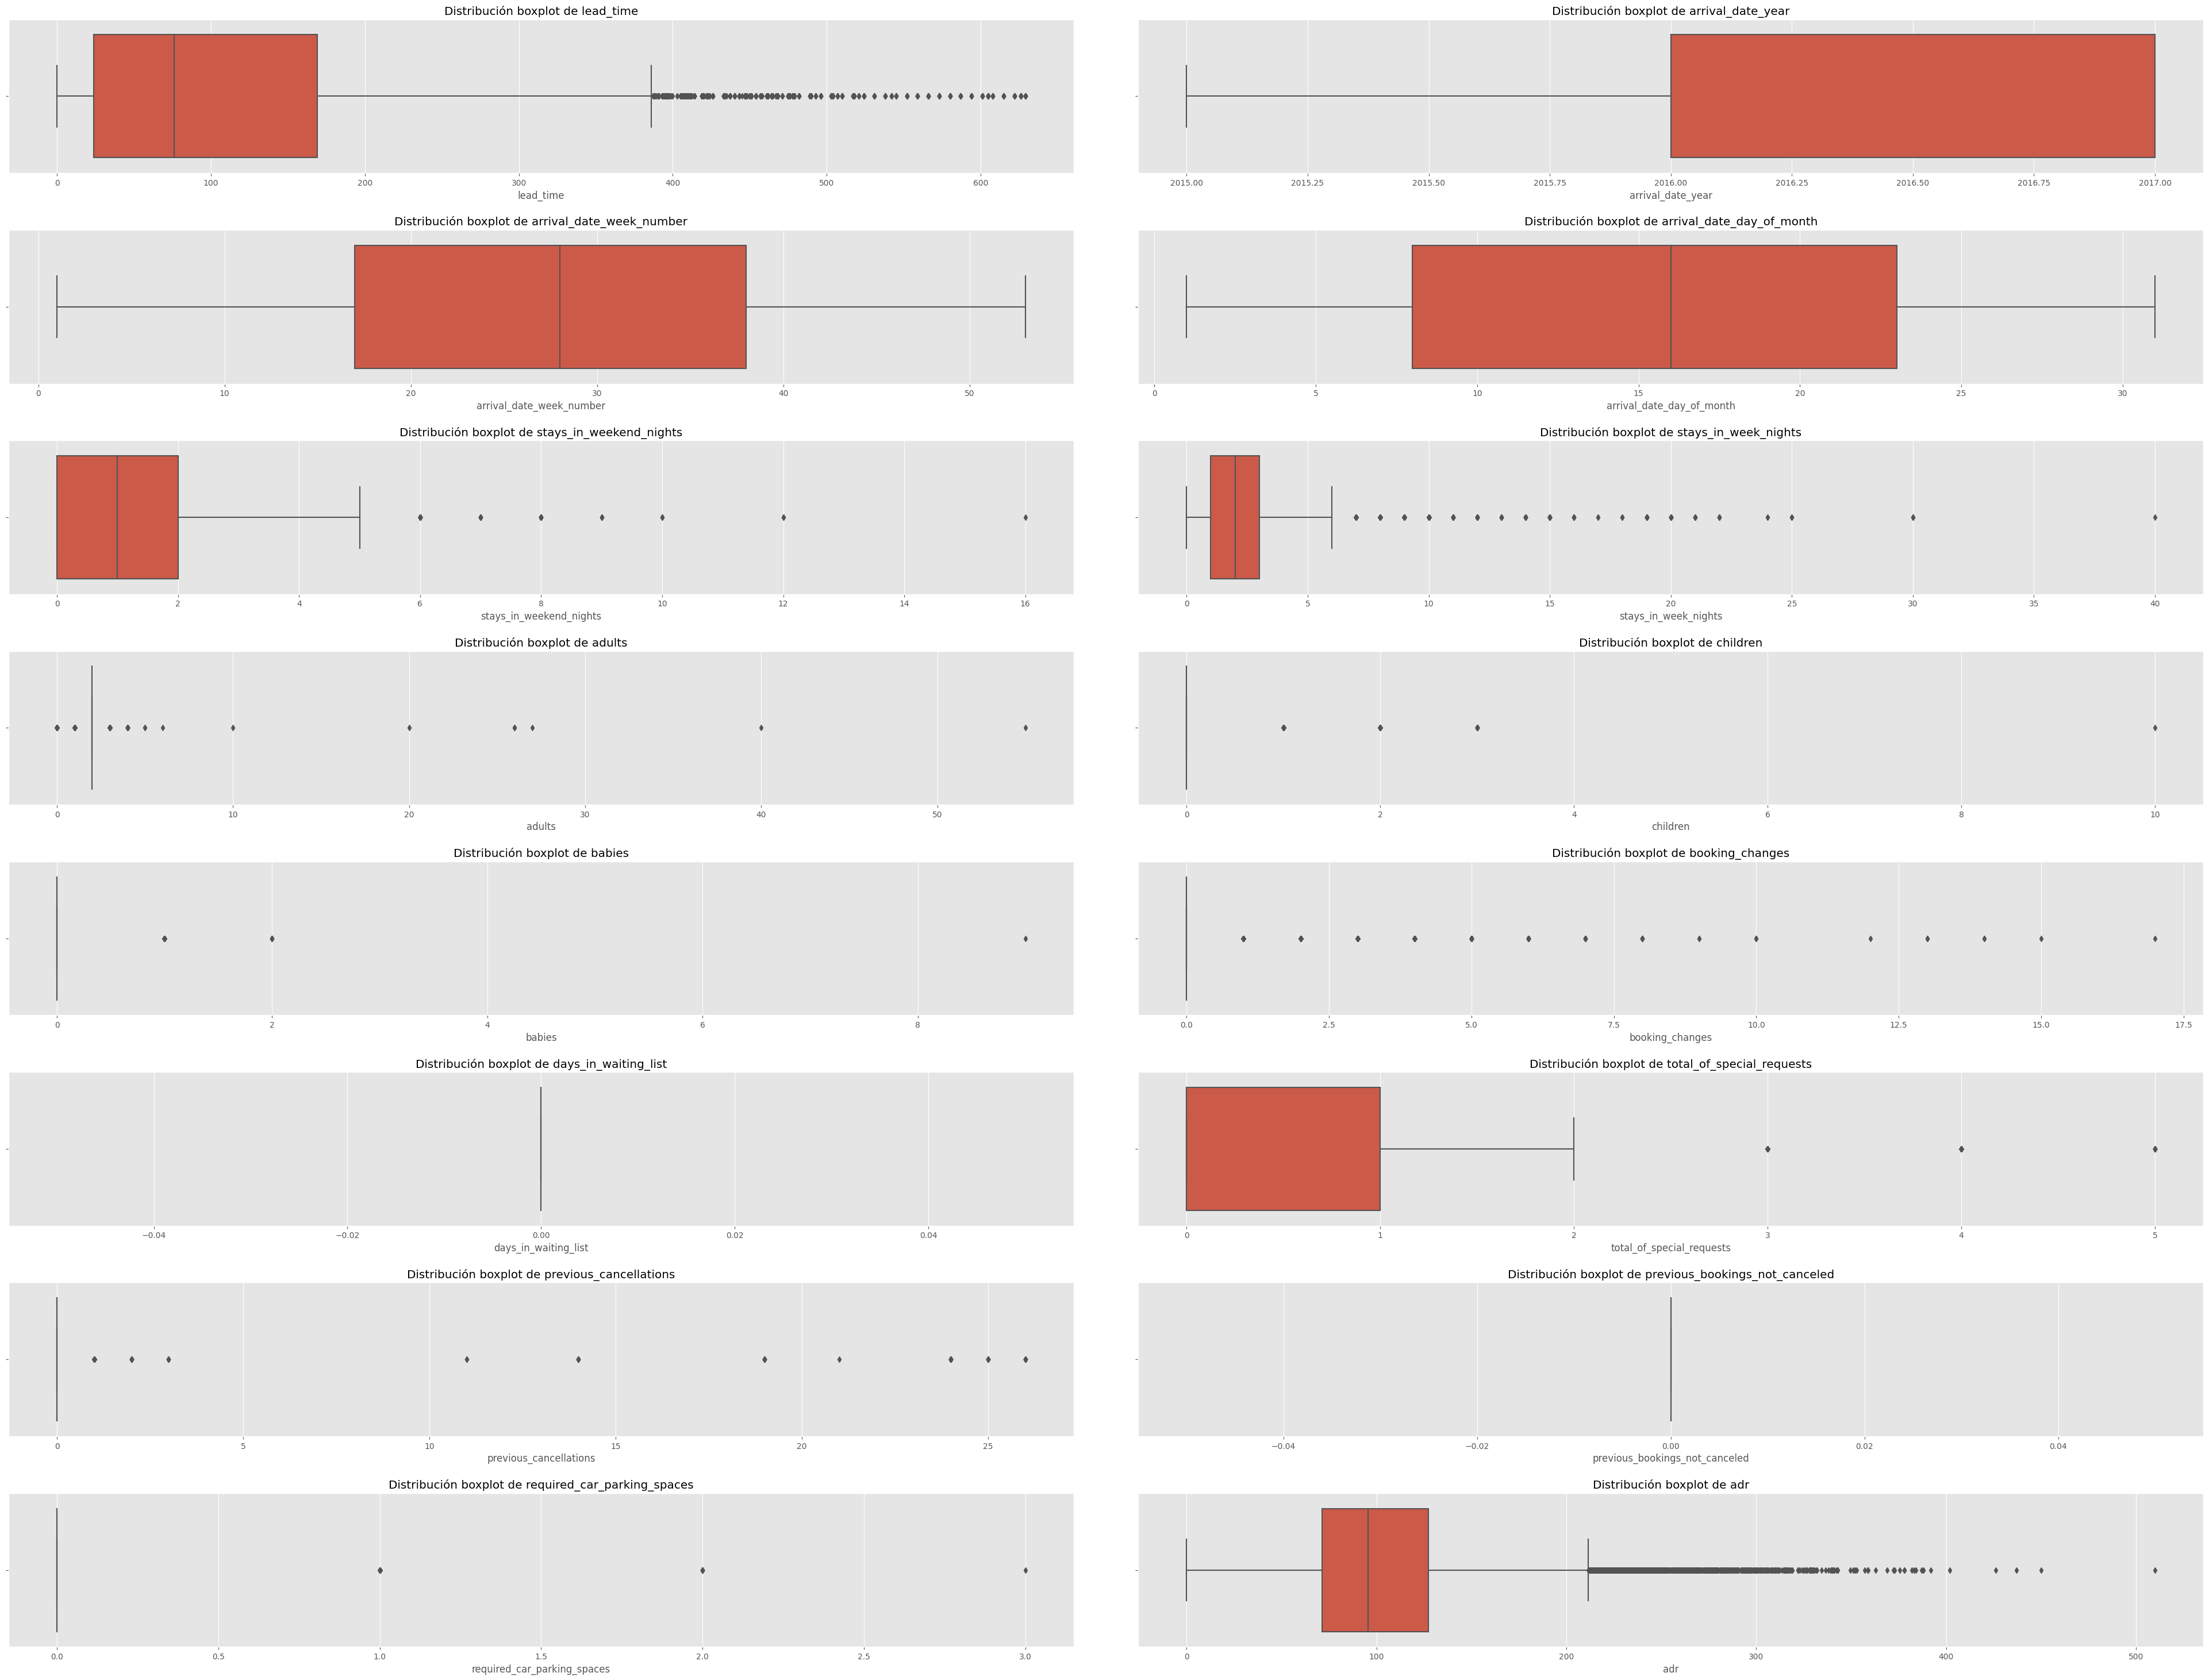

In [282]:
boxplots_var_cuantitativas(df_train_clean_uni, columnas_cuantitativas)

El resto de datos que vemos con alta cantidad de outliers los analizaremos por z-score.


### Analisis por Z-Scores

Para aquellos valores que aun quedaron con valores valores por fuera del 3er intercuartil y/o excedieron los límites puestos para la eliminación, procedemos a analizarlos por el metodo de Z-Score

In [283]:
def z_score_plot(ax, data, column, mod):
  ax.set(title=f"Scatterplot de los zcores-mod if mod else zcores de {column}")
  ax.scatter(x=data.z_score, y=data.z_score_m)
  ax.set(xlabel="z_score")
  ax.set(ylabel="z_score-mod")
  if(mod):
    ax.axhline(y=3.5, color='c')   
  else:
    ax.axvline(x=3, color='c')

def limpieza_z_score(data, column, mod=False, delete=False, plots=True):

  df_z = obtener_z_scores(data, column)

  if(plots):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6)) 
    z_score_plot(ax1, df_z, column, mod)

  outliers = df_z[df_z['z_score_m']>3.5 if mod else df_z['z_score']>3]
  outliers_percent = (outliers.size / df_z.size)*100
  print('__________________________________________')
  print(column)
  print('__________________________________________')
  print('Cantidad de outliers:', outliers.size)
  print('Proporcion de outliers respecto del total:', round(outliers_percent, 2))
  print('__________________________________________')

  if(outliers.size == 0):
    return

  #se eliminan los utiliers
  if(delete):
    data.drop(index=outliers.index, inplace=True)
    df_z_limpio = obtener_z_scores(data, column)
    print(f"Eliminados por {'z-score-modificado' if mod else 'z-score'}")
    print('__________________________________________')
  else:
    copy = data.copy()
    copy.drop(index=outliers.index, inplace=True)
    df_z_limpio = obtener_z_scores(copy, column)

  if(plots): 
    z_score_plot(ax2, df_z_limpio, column, mod)

  new_outliers = df_z_limpio[df_z_limpio['z_score_m']>3.5 if mod else df_z_limpio['z_score']>3]
  new_outliers_percent = (new_outliers.size / df_z_limpio.size)*100
  print('Cantidad de outliers:', new_outliers.size)
  print('Proporcion de outliers respecto del total:', round(new_outliers_percent, 2))


#### adr

__________________________________________
adr
__________________________________________
Cantidad de outliers: 2823
Proporcion de outliers respecto del total: 1.62
__________________________________________
Eliminados por z-score-modificado
__________________________________________
Cantidad de outliers: 204
Proporcion de outliers respecto del total: 0.12


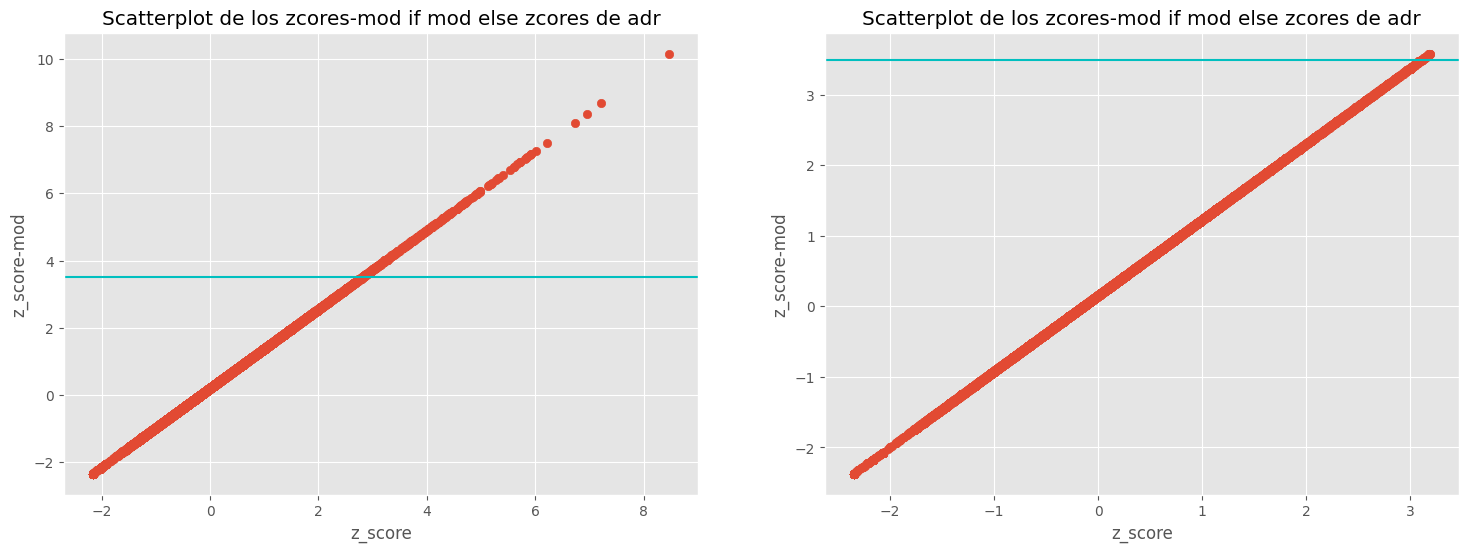

In [284]:
limpieza_z_score(df_train_clean_uni, 'adr', delete=True, mod=True)

En este caso los eliminaremos, no por ser una proporción significativa sino por su alto valor en z-score modificado

#### lead_time

__________________________________________
lead_time
__________________________________________
Cantidad de outliers: 3540
Proporcion de outliers respecto del total: 2.06
__________________________________________
Eliminados por z-score-modificado
__________________________________________
Cantidad de outliers: 660
Proporcion de outliers respecto del total: 0.39


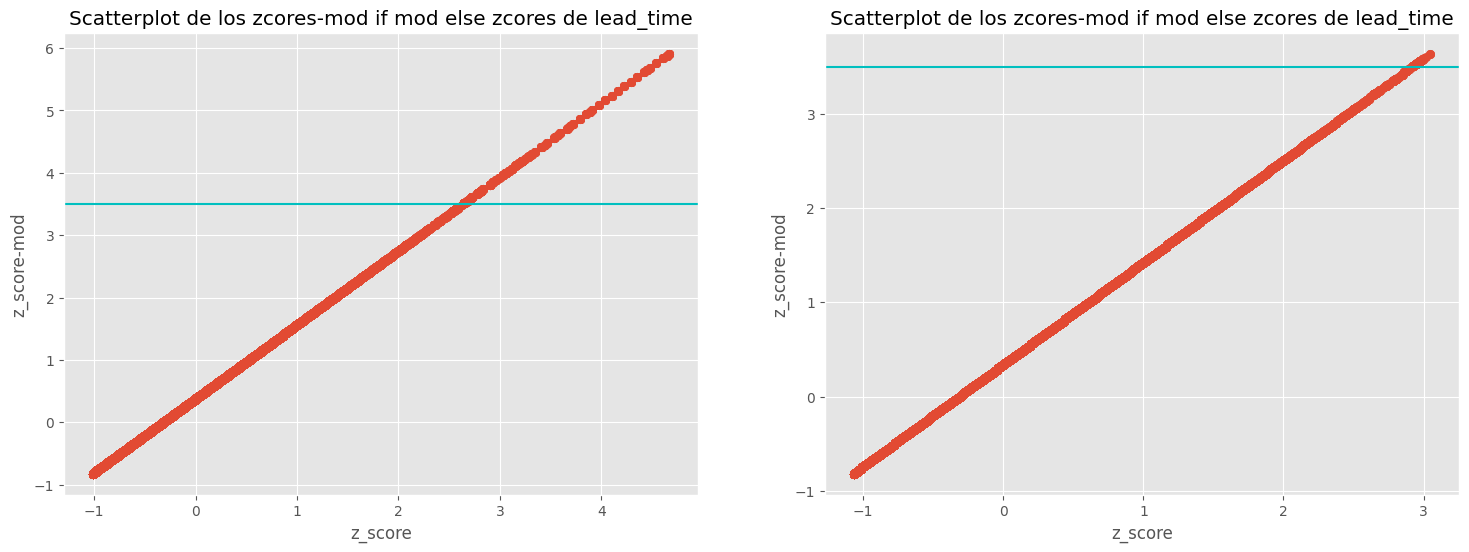

In [285]:
limpieza_z_score(df_train_clean_uni, 'lead_time', delete=True, mod=True)

Se puede apreciar claramente como la proporcion disminuyo considerablemente

#### stays_in_week_nights 

__________________________________________
stays_in_week_nights
__________________________________________
Cantidad de outliers: 3390
Proporcion de outliers respecto del total: 2.02
__________________________________________
Cantidad de outliers: 0
Proporcion de outliers respecto del total: 0.0


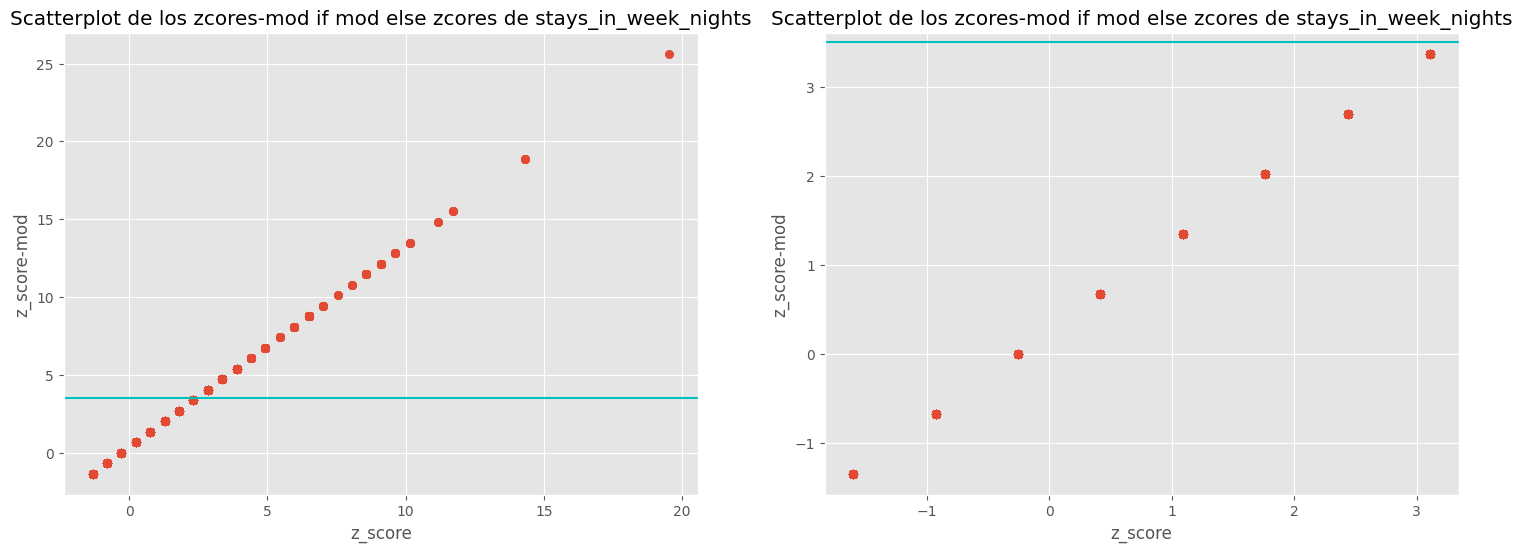

In [286]:
limpieza_z_score(df_train_clean_uni, 'stays_in_week_nights', delete=False, mod=True)

En un bajo porcentaje que no modifica en los valores de la media ya que tampoco tienen un z-score muy alto.

#### adults

In [287]:
df_z_adults = obtener_z_scores(df_train_clean_uni, 'adults')

print("Mediana de adults:", np.mean(df_train_clean_uni.adults))
print('____________________')
print()

df_z_adults.drop('z_score_m', inplace=True, axis=1)

print(df_z_adults)

Mediana de adults: 1.8787164093767867
____________________

       adults   z_score
0           1 -1.490258
1           2  0.205691
2           2  0.205691
3           2  0.205691
4           2  0.205691
...       ...       ...
61908       2  0.205691
61909       1 -1.490258
61910       1 -1.490258
61911       2  0.205691
61912       2  0.205691

[55968 rows x 2 columns]


En este caso podemos ver que la mediana no es 0 pero sí el MAD, por lo que no se puede calcular el valor de z-score modificado.

In [288]:
adults_z_outliers = df_z_adults[df_z_adults['z_score']>3]
adults_ouliers_percent = (adults_z_outliers.size / df_z_adults.size)*100
print(f'Proporcion de outliers respecto del total: {round(adults_ouliers_percent, 2)}%')

Proporcion de outliers respecto del total: 0.05%


Dado de que no representa un porcetaje que incida en las métricas, decidimos no eliminarlos.

#### booking_changes

Se repite el proceso anterior llevado a cabo con lead_time

In [289]:
df_z_booking_changes = obtener_z_scores(df_train_clean_uni, 'booking_changes')

print("Mediana de booking_changes:", np.median(df_train_clean_uni.booking_changes))
print('____________________')
print()
if(np.median(df_train_clean_uni.booking_changes) == 0):
  df_z_booking_changes.drop('z_score_m', inplace=True, axis=1)

print(df_z_booking_changes)


Mediana de booking_changes: 0.0
____________________

       booking_changes   z_score
0                    0 -0.319337
1                    0 -0.319337
2                    0 -0.319337
3                    0 -0.319337
4                    0 -0.319337
...                ...       ...
61908                0 -0.319337
61909                0 -0.319337
61910                0 -0.319337
61911                0 -0.319337
61912                1  1.323067

[55968 rows x 2 columns]


En este caso como la mediana es 0, no se puede hacer el calculo de z-score modificado y por lo tanto se procedera solamente con el z-score convencional.

In [290]:
booking_changes_z_outliers = df_z_booking_changes[df_z_booking_changes['z_score']>3]
booking_changes_ouliers_percent = (booking_changes_z_outliers.size / df_z_booking_changes.size)*100
print(f'Proporcion de outliers respecto del total: {round(booking_changes_ouliers_percent, 2)}%')

Proporcion de outliers respecto del total: 1.11%


Al ser mayor a 1, los eliminamos del dataset.

In [291]:
df_train_clean_uni.drop(index=booking_changes_z_outliers.index, inplace=True)

#### previous_cancelation

In [292]:
df_z_previous_cancellations = obtener_z_scores(df_train_clean_uni, 'previous_cancellations')

print("Mediana de previous_cancellations:", np.median(df_train_clean_uni.previous_cancellations))
print('____________________')
print()
if(np.median(df_train_clean_uni.previous_cancellations) == 0):
  df_z_previous_cancellations.drop('z_score_m', inplace=True, axis=1)

print(df_z_previous_cancellations)



Mediana de previous_cancellations: 0.0
____________________

       previous_cancellations   z_score
0                           0 -0.103764
1                           0 -0.103764
2                           0 -0.103764
3                           0 -0.103764
4                           0 -0.103764
...                       ...       ...
61908                       0 -0.103764
61909                       0 -0.103764
61910                       0 -0.103764
61911                       0 -0.103764
61912                       0 -0.103764

[55345 rows x 2 columns]


En este caso, como la mediana es 0, no se puede hacer el cálculo de z-score modificado

In [293]:
previous_cancellations_z_outliers = df_z_previous_cancellations[df_z_previous_cancellations['z_score'] > 3]
previous_cancellations_ouliers_percent = (previous_cancellations_z_outliers.size / df_z_previous_cancellations.size)*100
print(f'Proporcion de outliers respecto del total: {round(previous_cancellations_ouliers_percent, 2)}%')

Proporcion de outliers respecto del total: 0.19%


### Conclusiones del método

In [294]:
datos_totales_eliminados = len(df_train_complete.index) - len(df_train_clean_uni.index)
print(f'Cantidad de datos eliminados: {datos_totales_eliminados}')
print(f'Cantidad de datos restantes: {len(df_train_clean_uni.index)}')
print(f'Porcentaje de datos eliminados {round(((datos_totales_eliminados / len(df_train_complete.index))*100), 2)} %')

Cantidad de datos eliminados: 6488
Cantidad de datos restantes: 55345
Porcentaje de datos eliminados 10.49 %


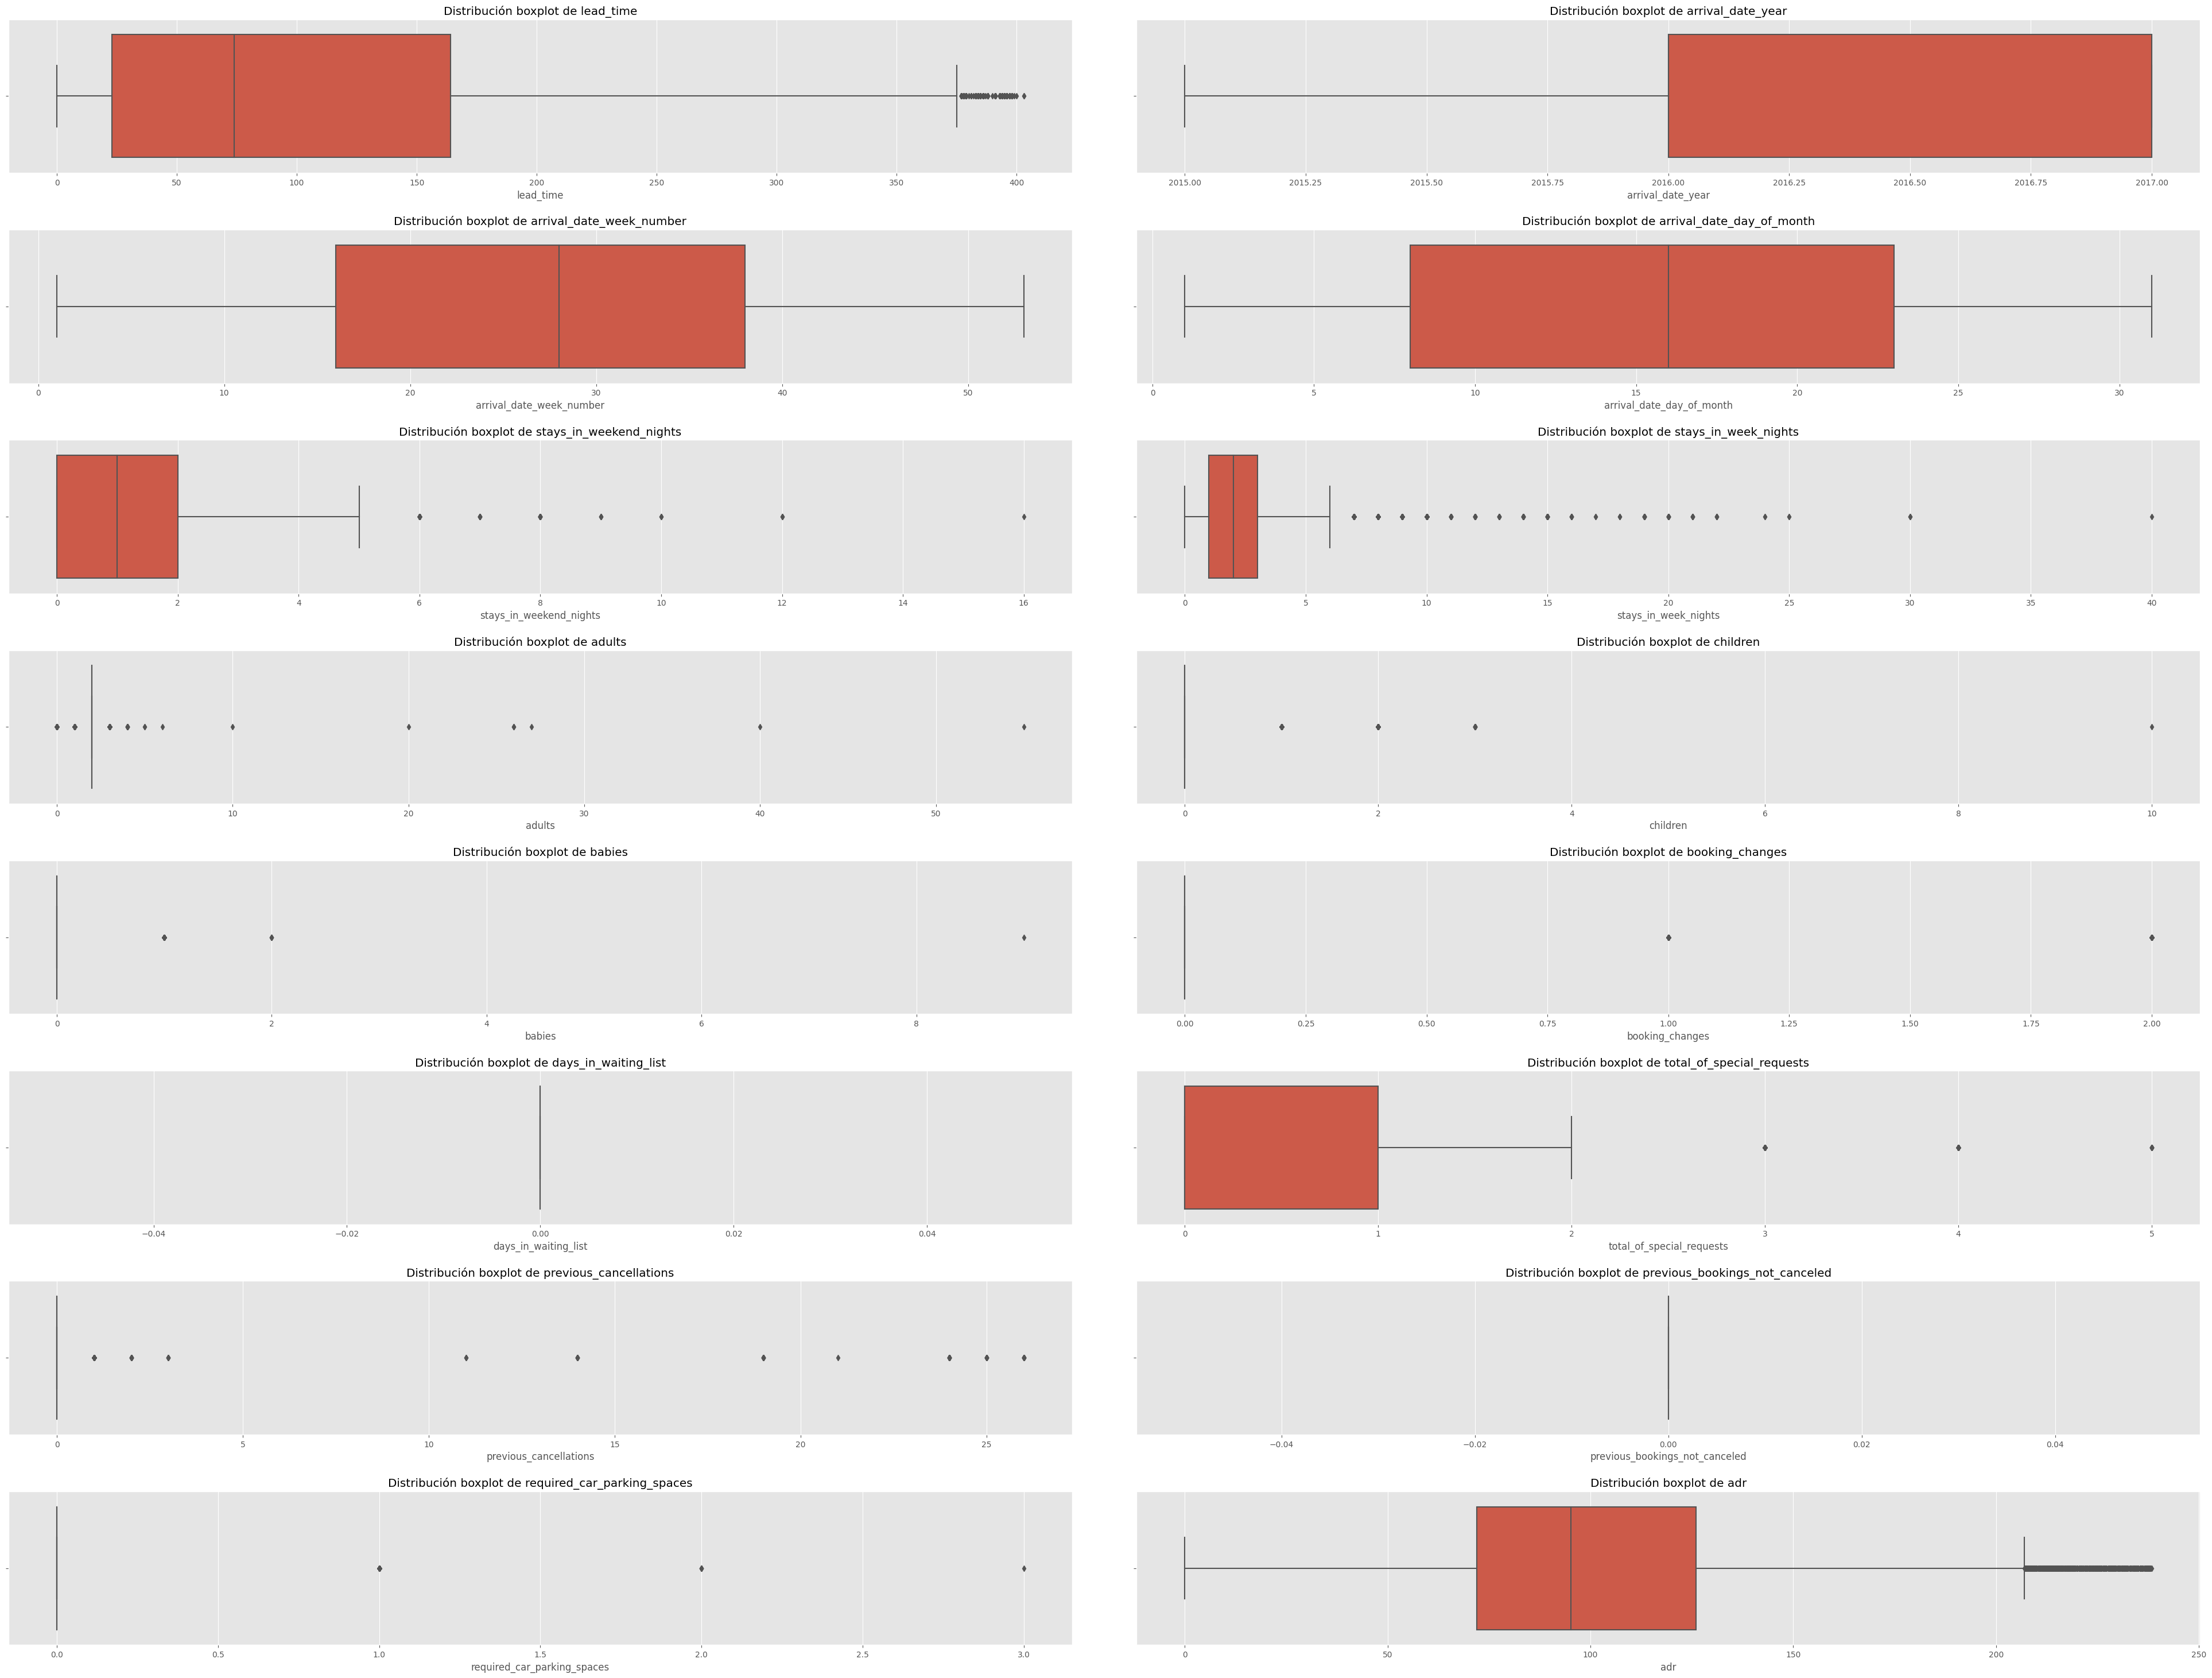

In [295]:
boxplots_var_cuantitativas(df_train_clean_uni, columnas_cuantitativas)

Vemos que varias variables siguen conteniendo outliers pero son propios de la distribución y no representan una gran modificación a las medianas ya que no se encuentran tan alejados.

## Análisis Multivariado

In [296]:
df_train_clean_multi = df_train_complete.copy()

### Isolation Forest General

Para analizar los valores atípicos multivariados, vamos a utilizar el algoritmo `IsolationForest` con todas las variables numéricas.

In [297]:
dataset_isolation_forest = df_train_complete[columnas_cuantitativas].copy()

iforest = IsolationForest(
    n_estimators=100,
    max_features=len(columnas_cuantitativas),
    bootstrap=True,
    random_state=2,
)

dataset_isolation_forest["outlier"] = iforest.fit_predict(dataset_isolation_forest)
dataset_isolation_forest["outlier"] = dataset_isolation_forest["outlier"].replace(
    to_replace=[-1, 1], value=[True, False]
)

print("Cantidad de observaciones anómalas:")
print(dataset_isolation_forest["outlier"].value_counts())


Cantidad de observaciones anómalas:
False    56061
True      5772
Name: outlier, dtype: int64


In [298]:
estimator = iforest.estimators_[len(columnas_cuantitativas)]

export_graphviz(
    estimator,
    out_file="tree.dot",
    feature_names=columnas_cuantitativas,
    special_characters=True,
    rounded=True,
    precision=2,
)
call(["dot", "-Tpng", "tree.dot", "-o", "tree.png", "-Gdpi=600"])
Image(filename="tree.png")

Output hidden; open in https://colab.research.google.com to view.

Se realiza limpieza de outliers:

In [299]:
i = dataset_isolation_forest.index[dataset_isolation_forest['outlier'] == True].tolist()
df_train_clean_multi.drop(index=i, inplace=True)

### Conclusiones del método

In [300]:
print(f'Cantidad de valores eliminados: {len(i)}')
print(f'Cantidad de valores restantes: {len(df_train_clean_multi.index)}')
print(f'Porcentaje de valores eliminados: {round(len(i)*100/len(df_train_complete),2)} %')

Cantidad de valores eliminados: 5772
Cantidad de valores restantes: 56061
Porcentaje de valores eliminados: 9.33 %


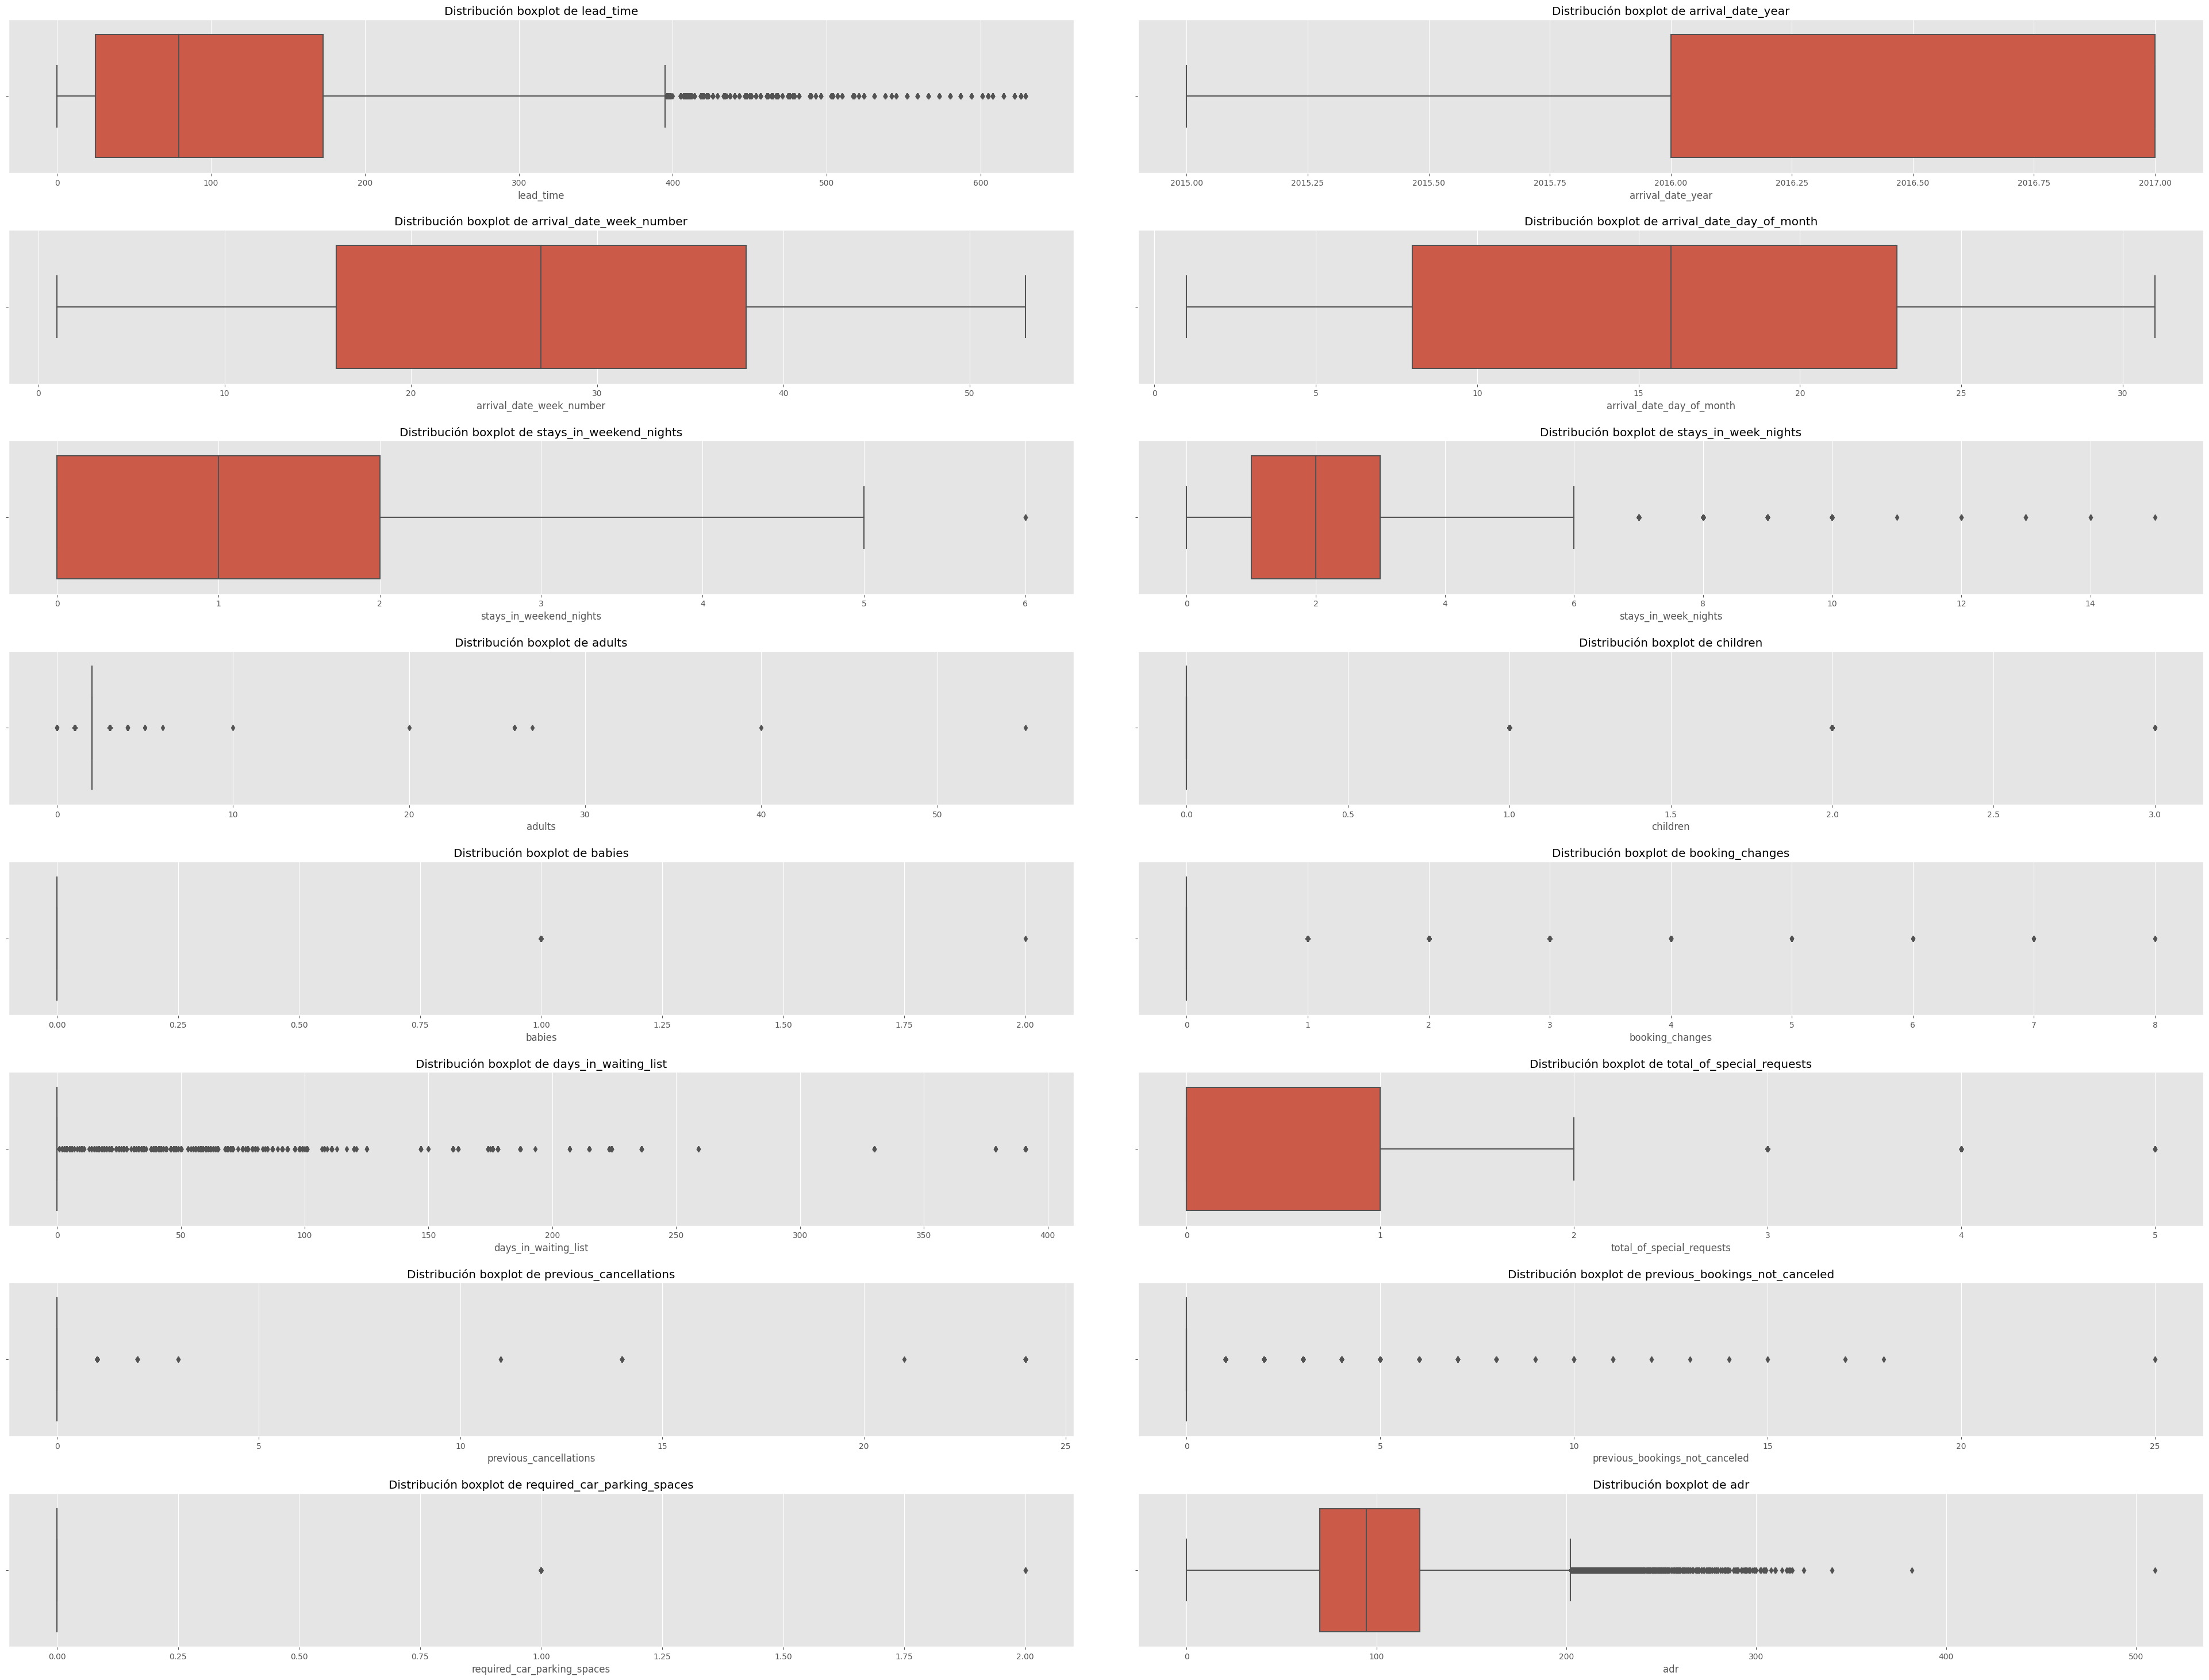

In [301]:
boxplots_var_cuantitativas(df_train_clean_multi, columnas_cuantitativas)

In [302]:
for columna in columnas_cuantitativas:
  analisis_de_outliers_severos(df_train_clean_multi, columna)

Outliers de adults
-------------------------
Filas comprometidas: 12631
Proporción respecto del total: 20.428 %
________________________
Outliers de children
-------------------------
Filas comprometidas: 2387
Proporción respecto del total: 3.86 %
________________________
Outliers de booking_changes
-------------------------
Filas comprometidas: 5833
Proporción respecto del total: 9.433 %
________________________
Outliers de days_in_waiting_list
-------------------------
Filas comprometidas: 1939
Proporción respecto del total: 3.136 %
________________________
Outliers de previous_cancellations
-------------------------
Filas comprometidas: 3575
Proporción respecto del total: 5.782 %
________________________
Outliers de previous_bookings_not_canceled
-------------------------
Filas comprometidas: 863
Proporción respecto del total: 1.396 %
________________________
Outliers de required_car_parking_spaces
-------------------------
Filas comprometidas: 1384
Proporción respecto del total: 2.

Procedemos a hacer una limpieza univariada a partir del criterio de **z-score modificado** de aquellas variables con muchos valores atípicos severos que puedan modificar la distribución de los mismos considerablemente 

In [303]:
columnas_univariadas = ['adults', 'booking_changes', 'previous_cancellations']

for columna in columnas_univariadas:   
  limpieza_z_score(df_train_clean_multi, columna, delete=True, mod=True, plots=False)

__________________________________________
adults
__________________________________________
Cantidad de outliers: 7866
Proporcion de outliers respecto del total: 4.68
__________________________________________
Eliminados por z-score-modificado
__________________________________________
Cantidad de outliers: 0
Proporcion de outliers respecto del total: 0.0
__________________________________________
booking_changes
__________________________________________
Cantidad de outliers: 16494
Proporcion de outliers respecto del total: 10.29
__________________________________________
Eliminados por z-score-modificado
__________________________________________
Cantidad de outliers: 0
Proporcion de outliers respecto del total: 0.0
__________________________________________
previous_cancellations
__________________________________________
Cantidad de outliers: 10623
Proporcion de outliers respecto del total: 7.39
__________________________________________
Eliminados por z-score-modificado
_________

In [304]:
print(f'Cantidad de valores eliminados: {len(i)}')
print(f'Cantidad de valores restantes: {len(df_train_clean_multi.index)}')
print(f'Porcentaje de valores eliminados: {round(len(i)*100/len(df_train_complete),2)} %')

Cantidad de valores eliminados: 5772
Cantidad de valores restantes: 44400
Porcentaje de valores eliminados: 9.33 %


In [305]:
df_train_clean = df_train_clean_multi.copy()

# Transformación de datos


In [306]:
df_work = df_train_clean.copy()

## misassigned_room (Habitación mal asignada)

Consideramos que una varible importante que se debería tener en cuenta es si se asignó correctamente la habitación en relación a la reserva, es por esto que creamos la varibale "misassigned_room" que representa si se asignó mal la habitación.

In [307]:
reservas_mal_asignadas = df_work['assigned_room_type'] != df_work['reserved_room_type']
df_work['misassigned_room'] = reservas_mal_asignadas
df_work['misassigned_room'].value_counts()

False    40360
True      4040
Name: misassigned_room, dtype: int64

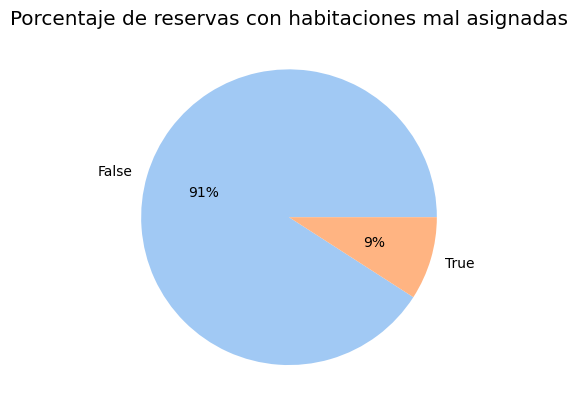

In [308]:
data = [df_work['misassigned_room'].value_counts()[0]/len(df_work.index), 
        df_work['misassigned_room'].value_counts()[1]/len(df_work.index)]

labels = ['False', 'True']


colors = sns.color_palette("pastel")[0:9]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Porcentaje de reservas con habitaciones mal asignadas")
plt.show()

La mayoría de las habitaciones están bien asignadas

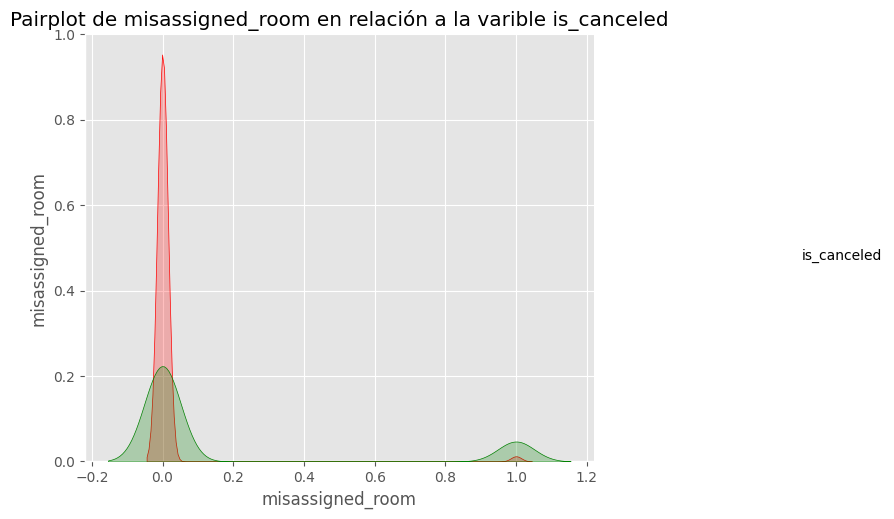

In [309]:
columns=['misassigned_room', 'is_canceled']
ds_pairplot=df_work[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pairplot, hue="is_canceled", palette=["g", "r"]).set(title="Pairplot de misassigned_room en relación a la varible is_canceled")
graf_pairplot.fig.set_size_inches(10,6)

Se nota una fuerte tendencia de cancelaciones cuando se asigna incorrectamente una habitación.

Se agrega ésta nueva variable al data set completo

In [310]:
reservas_mal_asignadas = df_work['assigned_room_type'] != df_work['reserved_room_type']
reservas_mal_asignadas.value_counts()

False    40360
True      4040
dtype: int64

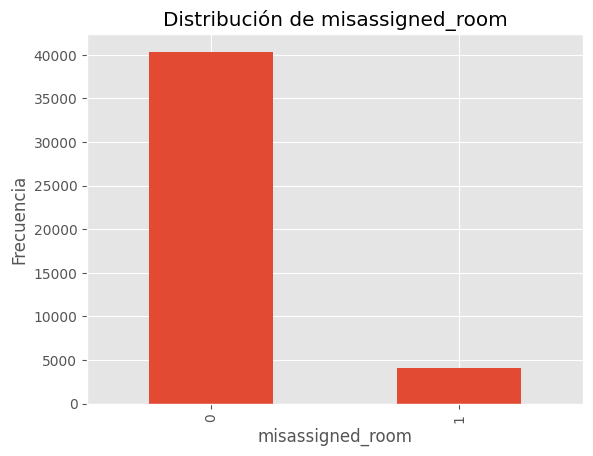

In [311]:
df_work["misassigned_room"] = reservas_mal_asignadas.replace(to_replace=[True, False], value=[1, 0])
df_work['misassigned_room'].value_counts()

barplot(df_work, 'misassigned_room')

Se agrega ésta nueva variable tambien para el conjunto de testing

In [312]:
reservas_test_mal_asignadas = df_test['assigned_room_type'] != df_test['reserved_room_type']
df_test['misassigned_room'] = reservas_test_mal_asignadas
df_test["misassigned_room"] = df_test["misassigned_room"].replace(to_replace=[True, False], value=[1, 0])

## Categorizacion de country

Como pudimos observar en el barplot segun la frecuencia de los valores de `country`, practicamente la mitad del dataset tiene valor PRT por lo que nos parecio adecuado englobar a toda la variable en valores PRT y NO-PRT para comprender mejor su relacion con el target.

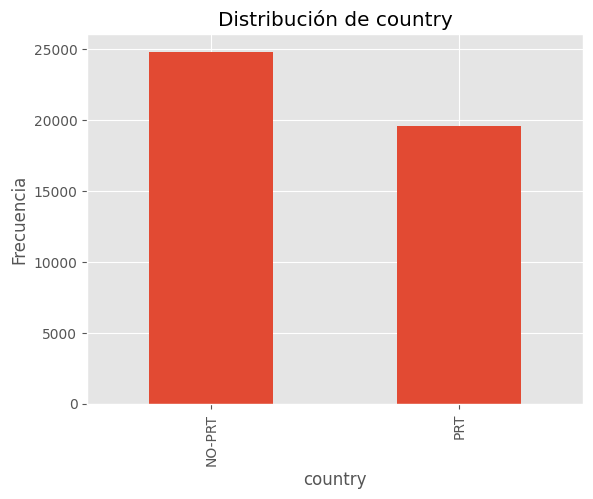

In [313]:
df_work.loc[df_work["country"] != "PRT", "country"] =  'NO-PRT'

barplot(df_work, 'country')

Analizamos su relación  con el target

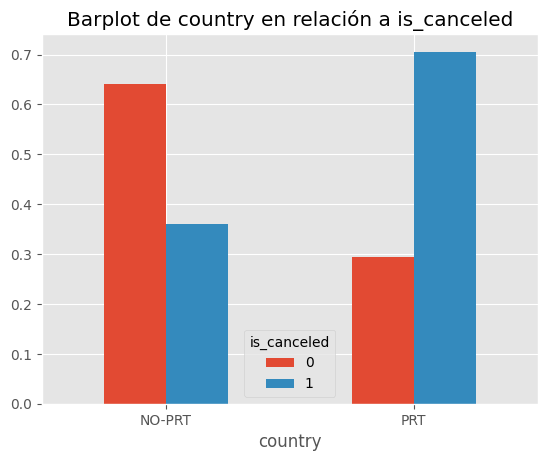

In [314]:
barplot_againts_target(df_work ,'country')

Para un mejor formateo de los datos, decidimos que lo mejor es tratarlo con valores 0 (NO-PRT) y 1 (PRT)

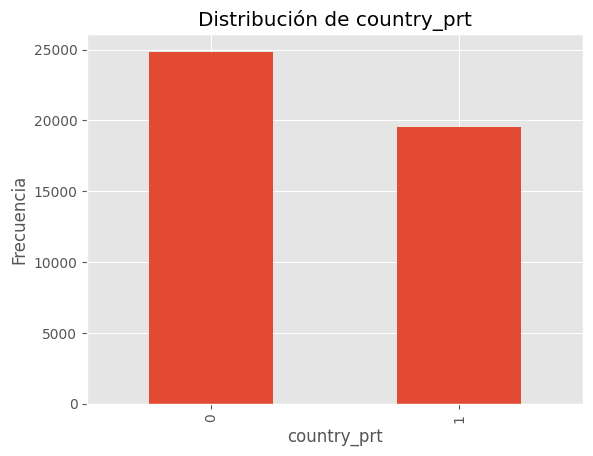

In [315]:
df_work['country'] = df_work['country'].replace(to_replace=['PRT', 'NO-PRT'], value=[1, 0])
df_work.rename(columns={"country": "country_prt"}, inplace=True)
barplot(df_work, 'country_prt')

Se realiza lo mismo para el set de test

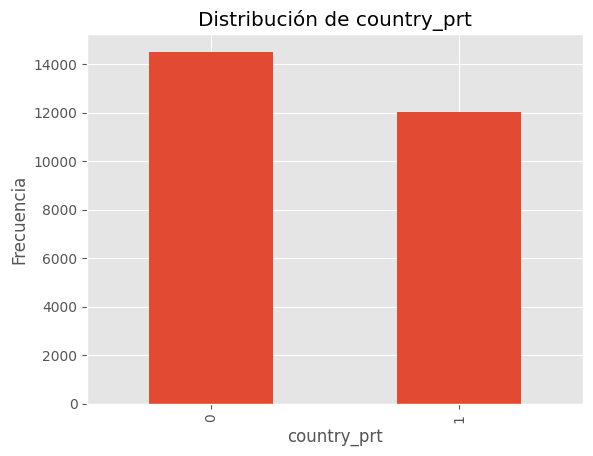

In [316]:
df_test.loc[df_test["country"] != "PRT", "country"] =  'NO-PRT'
df_test['country'] = df_test['country'].replace(to_replace=['PRT', 'NO-PRT'], value=[1, 0])
df_test.rename(columns={"country": "country_prt"}, inplace=True)

barplot(df_test, 'country_prt')

## Limpieza de columnas irrelevantes

Se eliminan columnas nulas o irrelevantes detectadas en el analisis exploratorio

In [317]:
# Id es irrelevante
# reservation_status_date delata el resultado del target y
# assigned_room_type y reserved_room_type, consideramos que tiene su información relevante condensada en misassigned_room
# stays_in_weekend_nights dada su correlación lineal consideramos que ya se encuentra representada dentro de stays_in_week_nights
cols_deleted = ['id', 'assigned_room_type', 'reserved_room_type', 'stays_in_weekend_nights']

df_work.drop(cols_deleted, axis='columns', inplace=True)
cols_deleted.remove('id')
df_test.drop(cols_deleted, axis='columns', inplace=True)

In [318]:
columnas_cuantitativas_discretas.remove('stays_in_weekend_nights')
columnas_cuantitativas.remove('stays_in_weekend_nights')

## Label encoding

Se encodean con Label encoding `arrival_date_month` ya que se puede establecer un orden entre los meses

In [319]:
columns_to_encode = ['arrival_date_month']

le = LabelEncoder()
for column in columns_to_encode:  
  df_work[column] = le.fit_transform(df_work[column].astype(str))
  df_test[column] = le.fit_transform(df_test[column].astype(str))


In [320]:
df_work[columns_to_encode]

arrival_date_month
0                      11
3                       2
4                       7
8                       6
9                       2
...                   ...
61906                   5
61908                   4
61909                  11
61910                   8
61911                  10

[44400 rows x 1 columns]

## Normalización

Para la normalización de las variables cuantitativas decidimos realizar la normalización standard por sobre la MinMax, ya que la primera conserva la distribución y por ende va a tener una mejor performance para los modelos.

### Variables Continuas

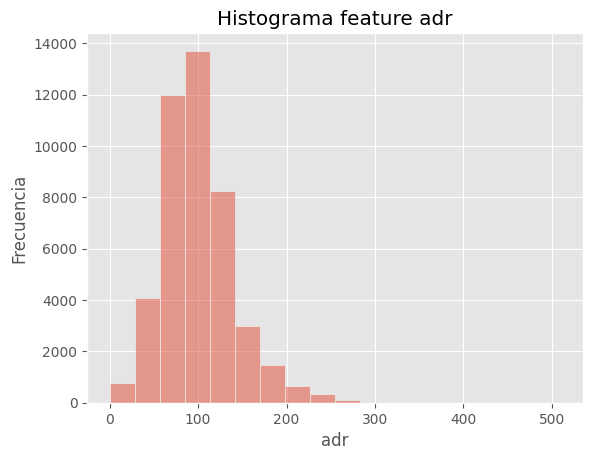

In [321]:
sns.histplot(data=df_work['adr'], alpha = 0.5, bins=18).set(title="Histograma feature adr",xlabel="adr",ylabel="Frecuencia")
plt.show()

Se normaliza la única variable cuantiativa continua `adr` 

In [322]:
standard_scaler = StandardScaler() 

adr_standard = standard_scaler.fit_transform(df_work['adr'].to_frame())
df_work['adr'] = adr_standard

Como la normalización no debería modificar la distribución, graficamos un histograma de `adr` para corroborarlo

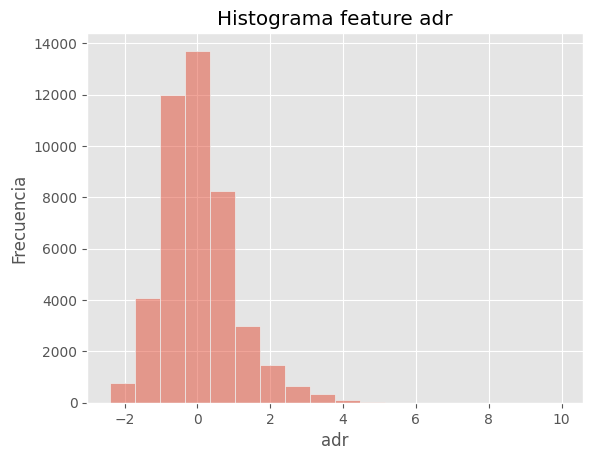

In [323]:
sns_hist=sns.histplot(data=df_work['adr'], alpha = 0.5, bins=18).set(title="Histograma feature adr",xlabel="adr",ylabel="Frecuencia")
plt.show()

### Variables Discretas

In [324]:
def standarizar_variable(data, columna):
  var_standard = standard_scaler.fit_transform(data[columna].to_frame())
  data[columna] = var_standard

for col in columnas_cuantitativas_discretas:
  standarizar_variable(df_work, col)

In [325]:
df_work[columnas_cuantitativas_discretas].head(5)

lead_time  arrival_date_year  arrival_date_week_number  \
0  -0.534488          -0.315072                  0.766932   
3  -0.744879          -0.315072                  1.803956   
4  -0.031377           1.164016                 -1.084896   
8   1.368184           1.164016                 -0.270092   
9  -0.946124          -0.315072                  1.729883   

   arrival_date_day_of_month  stays_in_week_nights    adults  children  \
0                  -1.229689             -0.242242 -2.161973 -0.204955   
3                  -0.430385              1.661507  0.461250 -0.204955   
4                   0.368919              1.661507  0.461250 -0.204955   
8                  -1.343875             -0.242242  0.461250 -0.204955   
9                  -0.658757             -0.876825  0.461250 -0.204955   

     babies  booking_changes  days_in_waiting_list  total_of_special_requests  \
0 -0.036805              0.0             -0.138137                   0.695438   
3 -0.036805              0.0             -0.138137                  -0.670518   
4 -0.036805              0.0             -0.138137                   0.695438   
8 -0.036805              0.0             -0.138137                   2.061394   
9 -0.036805              0.0             -0.138137                   2.061394   

   previous_cancellations  previous_bookings_not_canceled  \
0                     0.0                       -0.087316   
3                     0.0                       -0.087316   
4                     0.0                       -0.087316   
8                     0.0                       -0.087316   
9                     0.0                       -0.087316   

   required_car_parking_spaces  
0                    -0.172363  
3                    -0.172363  
4                    -0.172363  
8                    -0.172363  
9                    -0.172363

Misma normalización para el conjunto de test para variables cuantitativas

In [326]:
for col in columnas_cuantitativas:
  standarizar_variable(df_test, col)

## One Hot encoding

Para aquellas **variables cualitativas de texto** que presentan los mismos valores tanto en el train como en el test, utitilizamos *One Hot Encoding* para que puedan ser procesadas por los modelos

In [327]:
columnas_dummies = [   
    "hotel",
    "deposit_type",
    "distribution_channel",
    "market_segment",
    "customer_type",
    "country_prt",
    'meal'
]

df_work = pd.get_dummies(df_work, columns=columnas_dummies, drop_first=True)
df_test = pd.get_dummies(df_test, columns=columnas_dummies, drop_first=True)

Se eliminan aquellas variables dummies que contienen informacion redundante

# Guardado

In [328]:
set(df_work.columns) - set(df_test.columns)

{'is_canceled'}

In [332]:
df_work.to_csv('hotels_train.csv', encoding = 'utf-8-sig', index=False) 
files.download('hotels_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [333]:
df_test.to_csv('hotels_test.csv', encoding = 'utf-8-sig', index=False) 
files.download('hotels_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>